# Instruction/Guidelines

For the Hamoye Data Science Premier Project, the Bayes group was assigned the project code PP22/J610 which is the Stack Overflow Developer Survey 2020. The dataset is supposed to provide insights into the job satisfaction, education, opinion of software, and other experiences of developers from over 180 countries. The data was gotten from <a href="https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020">Kaggle</a> and contained two CSV files for the analysis; `the survey results` and `the survey schema` which was a description of the columns in the survey results.


# Introduction

According to Wikipedia:

*Stack Overflow is a question and answer website for professional and enthusiast programmers. It is the flagship site of the Stack Exchange Network, created in 2008 by Jeff Atwood and Joel Spolsky. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down similar to Reddit and edit questions and answers in a fashion similar to a wiki. Users of Stack Overflow can earn reputation points and "badges"; for example, a person is awarded 10 reputation points for receiving an "up" vote on a question or an answer to a question,and can receive badges for their valued contributions, which represents a gamification of the traditional Q&A website. Users unlock new privileges with an increase in reputation like the ability to vote, comment, and even edit other people's posts.*

*As of March 2021 Stack Overflow has over 14 million registered users,and has received over 21 million questions and 31 million answers. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: JavaScript, Java, C#, PHP, Android, Python, jQuery, and HTML.*

So either as a beginner, an expert, or a unicorn developer, StackOverflow can be referred to as the hub of Developers who are enthusiastic about all things code.

# Objectives

The aim of this project is to provide insights through data analysis in order to answer questions like:
* Who are the developers?
* Developer Experience
* Education - Level, Major
* Career - Employment, Job Satisfaction, Job Seeker
* Opinion on open-source software

# Data used for analysis

The dataset for this analysis was provided on <a href="https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020">Kaggle</a> by Aitzaz Mumtaz Khan.

# Contributors

The contributors to this analysis are:

* Angela Offor
* Ayodeji Morakinyo
* Faruna Benjamin
* Loye Magba
* Saola Olaoluwa
* Tope Adekanmbi 
* Vanessa Onyema 

# Exploratory Data Analysis


* The first step taken by everyone that worked on this stage was to import the libraries needed for the analysis, import the dataset, and viewed the data frame with the `.head()` function.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#I downloaded the dataset so I can read it directly from the folder
survey_data = pd.read_csv('survey_results_public.csv')

In [3]:
survey_data.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

* Moving on, I will apply the codes done by the conributors using my own format for the data. 

**Angela,  Saola, Loye and Tope checked the shape of the data.**

In [4]:
survey_data.shape

(64461, 61)

* The shape showed that the data has 64461 rows and 61 columns

**Loye and Tope checked the dataframe info.**

In [5]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

**Angela, Saola, Loye, Tope and Ayodeji checked the data description.**

In [6]:
survey_data.describe(include='all')

Respondent                      MainBranch Hobbyist           Age  \
count   64461.000000                           64162    64416  45446.000000   
unique           NaN                               5        2           NaN   
top              NaN  I am a developer by profession      Yes           NaN   
freq             NaN                           47193    50388           NaN   
mean    32554.079738                             NaN      NaN     30.834111   
std     18967.442360                             NaN      NaN      9.585392   
min         1.000000                             NaN      NaN      1.000000   
25%     16116.000000                             NaN      NaN     24.000000   
50%     32231.000000                             NaN      NaN     29.000000   
75%     49142.000000                             NaN      NaN     35.000000   
max     65639.000000                             NaN      NaN    279.000000   

       Age1stCode CompFreq      CompTotal  ConvertedComp        Country  \
count       57900    40069   3.482600e+04   3.475600e+04          64072   
unique         63        3            NaN            NaN            183   
top            15   Yearly            NaN            NaN  United States   
freq         5618    19818            NaN            NaN          12469   
mean          NaN      NaN  3.190464e+242   1.037561e+05            NaN   
std           NaN      NaN            inf   2.268853e+05            NaN   
min           NaN      NaN   0.000000e+00   0.000000e+00            NaN   
25%           NaN      NaN   2.000000e+04   2.464800e+04            NaN   
50%           NaN      NaN   6.300000e+04   5.404900e+04            NaN   
75%           NaN      NaN   1.250000e+05   9.500000e+04            NaN   
max           NaN      NaN  1.111111e+247   2.000000e+06            NaN   

                CurrencyDesc  ... SurveyEase           SurveyLength  Trans  \
count                  45472  ...      51802                  51701  49345   
unique                   142  ...          3                      3      2   
top     United States dollar  ...       Easy  Appropriate in length     No   
freq                   11050  ...      34626                  38769  48871   
mean                     NaN  ...        NaN                    NaN    NaN   
std                      NaN  ...        NaN                    NaN    NaN   
min                      NaN  ...        NaN                    NaN    NaN   
25%                      NaN  ...        NaN                    NaN    NaN   
50%                      NaN  ...        NaN                    NaN    NaN   
75%                      NaN  ...        NaN                    NaN    NaN   
max                      NaN  ...        NaN                    NaN    NaN   

                                           UndergradMajor  \
count                                               50995   
unique                                                 12   
top     Computer science, computer engineering, or sof...   
freq                                                31582   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       WebframeDesireNextYear WebframeWorkedWith  \
count                   40024              42279   
unique                   3986               3789   
top                  React.js             jQuery   
freq                     2480               2079   
mean                      NaN                NaN   
std                       NaN                NaN   
min                       NaN                NaN   
25%                       NaN                NaN   
50%                   

* The description of the data shows that there are null values in the dataset.

**Angela, Saola and Ayodeji checked the total null values in the data frame using the isnull function.**

In [7]:
survey_data.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

**Loye checked for the null values by visualizing it.**

<AxesSubplot:>

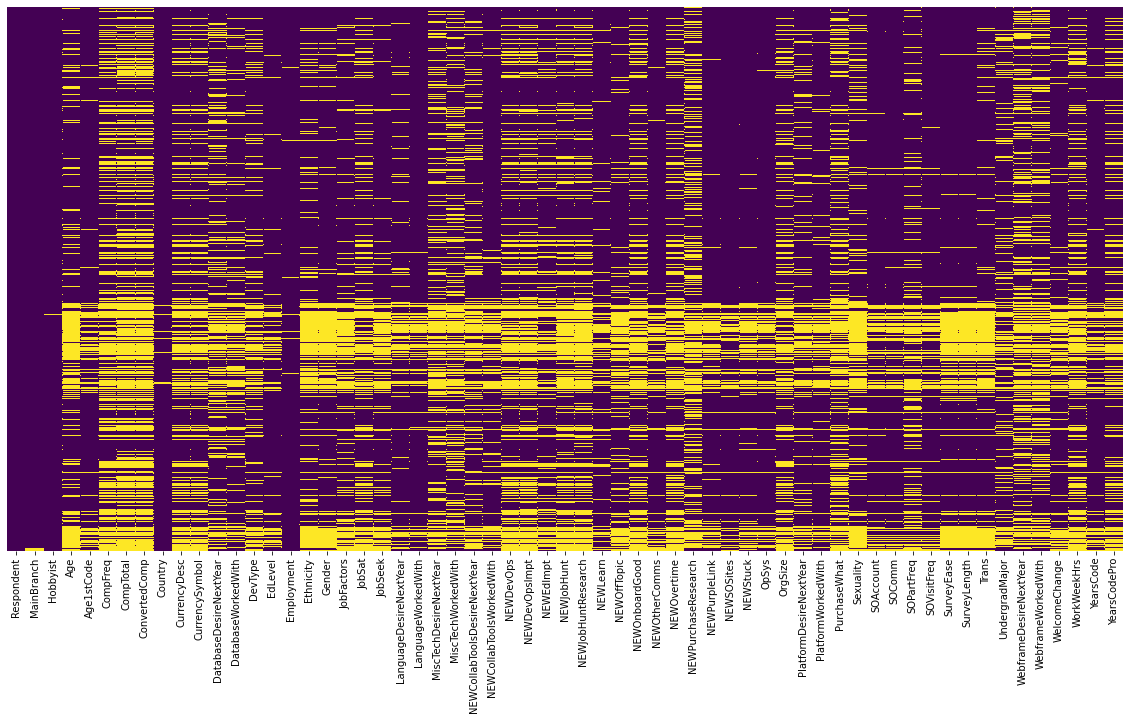

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(survey_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

* Considering that we need the actual count for the country column which has few null values, dropping the null values for the dataset could result in fewer values left in the data. So the `drop_na` function is not applied now.

## Schema file
**Tope and Ayodeji imported this as a question text in order to retrieve it as a series.**

In [9]:
#import the schema file
schema = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText

# Data Preprocessing and Cleaning

## Selected columns by contributors


* **Angela**: MainBranch, Hobbyist, Age, Age1stCode, CompFreq, CompTotal, Country, DatabaseWorkedWith, DevType, EdLevel, Employment, JobFactors, JobSat, JobSeek, DevType, LanguageWorkedWith, WorkWeekHrs, YearsCode, YearsCodePro, NEWLearn


* **Saola**: Respondent, Age, CompTotal, ConvertedComp, WorkWeekHrs


* **Loye**: MainBranch, Country, Age, Gender, Employment, EdLevel, Age1stCode, Hobbyist, LanguageWorkedWith, YearsCode, YearsCodePro, DevType, CompFreq, CompTotal, JobFactors, JobSat, NEWLearn, WorkWeekHrs


* **Tope**: Age, Country, DevType, EdLevel, Gender, Age1stCode, Employment, JobSeek, JobSat, JobFactors, WorkWeekHrs, ConvertedComp, DatabaseDesireNextYear, DatabaseWorkedWith, LanguageDesireNextYear, LanguageWorkedWith, WebframeDesireNextYear, WebframeWorkedWith, YearsCode, YearsCodePro


* **Ayodeji**: Respondent, MainBranch, Gender, Ethnicity, EdLevel, Age, UndergradMajor, Hobbyist, Age1stCode, ConvertedComp, WebframeWorkedWith, WorkWeekHrs, DatabaseWorkedWith, DevType, Employment, JobFactors, LanguageWorkedWith, YearsCode, YearsCodePro, Country


* **Vanessa**: Respondent, MainBranch, Hobbyist, Age, Age1stCode, Country, DatabaseDesireNextYear, DatabaseWorkedWith, DevType, EdLevel, Employment, Ethnicity, Gender, JobFactors, JobSat, JobSeek, LanguageDesireNextYear, LanguageWorkedWith, MiscTechDesireNextYear, MiscTechWorkedWith, NEWCollabToolsDesireNextYear, NEWCollabToolsWorkedWith, PlatformDesireNextYear, PlatformWorkedWith, UndergradMajor, WebframeWorkedWith, WebframeDesireNextYear, WorkWeekHrs, YearsCode, YearsCodePro


In [10]:
#selected column for data analysis by merging suggestions from contributors
update_survey_data = survey_data[['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp',  'Country','DatabaseDesireNextYear',
                                 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat','JobSeek',
                                 'LanguageDesireNextYear','LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith','NEWCollabToolsDesireNextYear','NEWCollabToolsWorkedWith', 'NEWLearn',
                                  'PlatformDesireNextYear','PlatformWorkedWith', 'UndergradMajor', 'WebframeWorkedWith','WebframeDesireNextYear', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
update_survey_data

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

                                  DatabaseDesireNextYear  ...  \
0                                   Microsoft SQL Server  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3                                                    NaN  ...   
4                                       MySQL;PostgreSQL  ...   
...                                                  ...  ...   
64456                                                NaN  ...   
64457  Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...  ...   
64458                                                NaN  ...   
64459    DynamoDB;Elasticsearch;MongoDB;MySQL;PostgreSQL  ...   
64460                       MariaDB;Microsoft SQL Server  ...   

                                NEWCollabToolsWorkedWith       NEWLearn  \
0           Confluence;Jira;Slack;Microsoft Azure;Trello    Once a year   
1                    Confluence;Jira;Github;Gitlab;Slack    Once a year   
2                                                    NaN  Once a decade   
3                                                    NaN    Once a year   
4      Confluence;Jira;Github;Slack;Google Suite (Doc...    Once a year   
...                                                  ...            ...   
64456                                                NaN  Once a decade   
64457                                                NaN            NaN   
64458                                                NaN            NaN   
64459              Confluence;Jira;Slack;Microsoft Teams    Once a year   
64460                                             Github    Once a year   

                                  PlatformDesireNextYear  \
0         Android;iOS;Kubernetes;Microsoft Azure;Windows   
1                             iOS;Kubernetes;Linux;MacOS   
2                                                    NaN   
3                                                    NaN   
4      Docker;Google Cloud Platform;Heroku;Linux;Windows   
...                

**Tope updated the schema file with the columns selected for analysis.**

In [11]:
columns_for_analysis = ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp',  'Country','DatabaseDesireNextYear',
                                 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat','JobSeek',
                                 'LanguageDesireNextYear','LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith','NEWCollabToolsDesireNextYear','NEWCollabToolsWorkedWith', 'NEWLearn',
                                  'PlatformDesireNextYear','PlatformWorkedWith', 'UndergradMajor', 'WebframeWorkedWith','WebframeDesireNextYear', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']


In [12]:
updated_schema = schema[columns_for_analysis]
updated_schema.to_frame()

QuestionText
Column                                                                         
Respondent                    Randomized respondent ID number (not in order ...
MainBranch                    Which of the following options best describes ...
Hobbyist                                                Do you code as a hobby?
Age                           What is your age (in years)? If you prefer not...
Age1stCode                    At what age did you write your first line of c...
CompFreq                       Is that compensation weekly, monthly, or yearly?
CompTotal                     What is your current total compensation (salar...
ConvertedComp                 Salary converted to annual USD salaries using ...
Country                                                      Where do you live?
DatabaseDesireNextYear        Which database environments have you done exte...
DatabaseWorkedWith            Which database environments have you done exte...
DevType                       Which of the following describe you? Please se...
EdLevel                       Which of the following best describes the high...
Employment                    Which of the following best describes your cur...
Ethnicity                     Which of the following describe you, if any? P...
Gender                        Which of the following describe you, if any? P...
JobFactors                    Imagine that you are deciding between two job ...
JobSat                        How satisfied are you with your current job? (...
JobSeek                       Which of the following best describes your cur...
LanguageDesireNextYear        Which programming, scripting, and markup langu...
LanguageWorkedWith            Which programming, scripting, and markup langu...
MiscTechDesireNextYear        Which other frameworks, libraries, and tools h...
MiscTechWorkedWith            Which other frameworks, libraries, and tools h...
NEWCollabToolsDesireNextYear  Which collaboration tools have you done extens...
NEWCollabToolsWorkedWith      Which collaboration tools have you done extens...
NEWLearn                      How frequently do you learn a new language or ...
PlatformDesireNextYear        Which platforms have you done extensive develo...
PlatformWorkedWith            Which platforms have you done extensive develo...
UndergradMajor                            What was your primary field of study?
WebframeWorkedWith            Which web frameworks have you done extensive d...
WebframeDesireNextYear        Which web frameworks have you done extensive d...
WorkWeekHrs                   On average, how many hours per week do you wor...
YearsCode                     Including any education, how many years have y...
YearsCodePro                  NOT including education, how many years have y...

**Loye and Tope converted the object data to numeric data**

In [13]:
#converting some non_numeric values
update_survey_data['Age1stCode'] = pd.to_numeric(update_survey_data.Age1stCode, errors='coerce')
update_survey_data['YearsCode'] = pd.to_numeric(update_survey_data.YearsCode, errors='coerce')
update_survey_data['YearsCodePro'] = pd.to_numeric(update_survey_data.YearsCodePro, errors='coerce')

<ipython-input-13-8f1772f68d56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_survey_data['Age1stCode'] = pd.to_numeric(update_survey_data.Age1stCode, errors='coerce')
<ipython-input-13-8f1772f68d56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_survey_data['YearsCode'] = pd.to_numeric(update_survey_data.YearsCode, errors='coerce')
<ipython-input-13-8f1772f68d56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

**Ayodeji checked for duplicates in the dataframe**

In [14]:
print(update_survey_data.duplicated().sum())

0


In [15]:
update_survey_data.describe()

Respondent           Age    Age1stCode      CompTotal  ConvertedComp  \
count  64461.000000  45446.000000  57473.000000   3.482600e+04   3.475600e+04   
mean   32554.079738     30.834111     15.476572  3.190464e+242   1.037561e+05   
std    18967.442360      9.585392      5.114081            inf   2.268853e+05   
min        1.000000      1.000000      5.000000   0.000000e+00   0.000000e+00   
25%    16116.000000     24.000000     12.000000   2.000000e+04   2.464800e+04   
50%    32231.000000     29.000000     15.000000   6.300000e+04   5.404900e+04   
75%    49142.000000     35.000000     18.000000   1.250000e+05   9.500000e+04   
max    65639.000000    279.000000     85.000000  1.111111e+247   2.000000e+06   

        WorkWeekHrs     YearsCode  YearsCodePro  
count  41151.000000  56784.000000  44133.000000  
mean      40.782174     12.782051      8.869667  
std       17.816383      9.490657      7.759961  
min        1.000000      1.000000      1.000000  
25%       40.000000      6.000000      3.000000  
50%       40.000000     10.000000      6.000000  
75%       44.000000     17.000000     12.000000  
max      475.000000     50.000000     50.000000

**Loye checked for outliers using boxplot in the numeric columns**

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

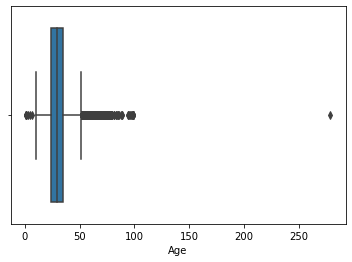

In [16]:
#Age
sns.boxplot(update_survey_data['Age'])

* The age shows a minimum value of 1 and maximum of 279

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age1stCode'>

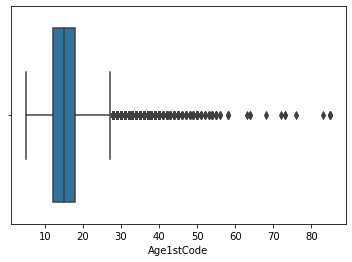

In [17]:
#Age 1st Code
sns.boxplot(update_survey_data['Age1stCode'])

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorkWeekHrs'>

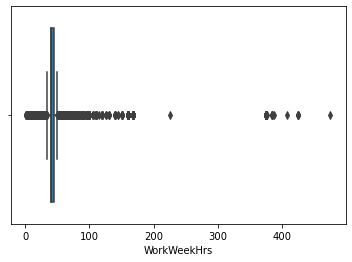

In [18]:
#Workweek hrs
sns.boxplot(update_survey_data['WorkWeekHrs'])

In [19]:
#adjusting the outliers
update_survey_data.drop(update_survey_data[update_survey_data.Age < 5].index, inplace=True)
update_survey_data.drop(update_survey_data[update_survey_data.Age > 100].index, inplace=True)
update_survey_data.drop(update_survey_data[update_survey_data.WorkWeekHrs>40].index, inplace=True)

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Loye, Tope and Ayodeji created a function that will split the multi columns.**

In [20]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    #Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        #Break each value into a list of options
        for option in value.split(';'):
            #Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            #Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

**Loye fixed the gender column**

In [21]:
update_survey_data.where(~(update_survey_data.Gender.str.contains(';', na=False)), np.nan, inplace=True)

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


In [22]:
update_survey_data.shape

(52609, 34)

* **After the preprocessing and cleaning, we have 52609 rows and 34 columns which is about 81.6% of the data retained.**

# Data Visualization

## Who are the developers?

### Country
**Vanessa created a map using folium that explored the number of respondents in each country, she also visualized the top 20 countries in the data. Loye visualized the Top 15 so the benchmark for the visualization is 20.**

In [23]:
#creating the map
#importing the geo json file
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
#creating the dataframe
country_counts = update_survey_data.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
#set the index
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Russia'
#make the map
import folium
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 1_000, 3_000, 6_000, 9_000, 13_000],
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

* The areas colored black in the map represent the countries that wasn't in the survey. The color range of values is clearly shown on the map.

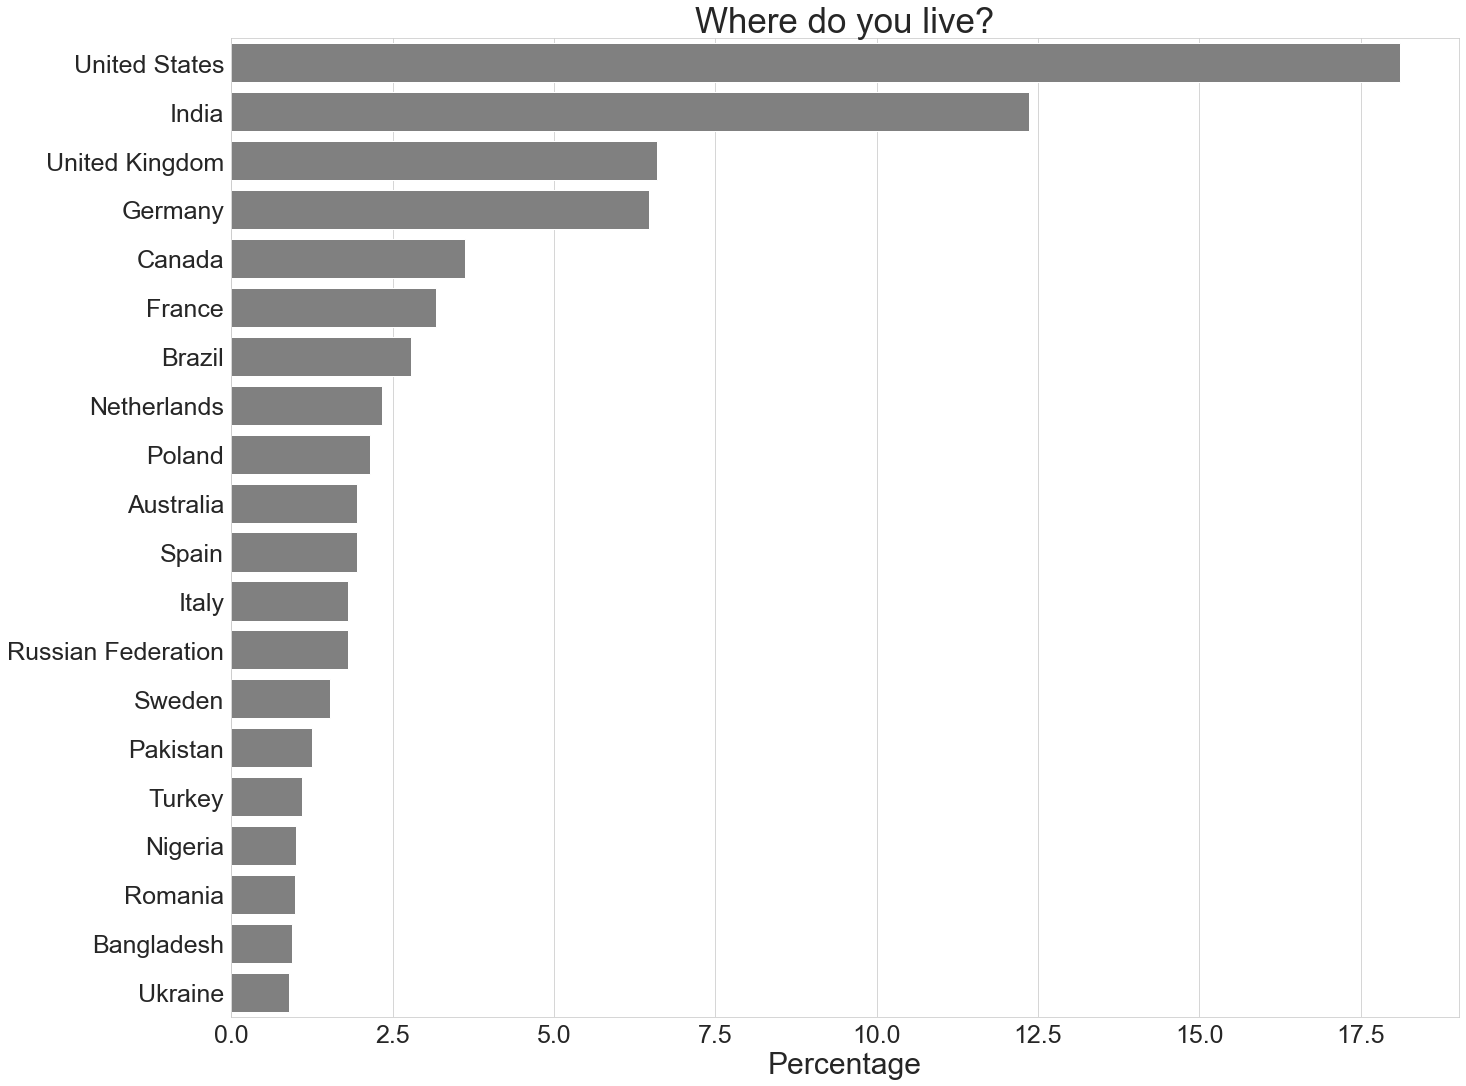

In [24]:
#top 20countries
countries=update_survey_data['Country'].value_counts(normalize=True)*100
countries = countries.to_frame(name='percentage').reset_index()
top_countries = countries.head(20)
#barchart
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=top_countries, ci=None, color='grey',orient='h')
ax.set_title(schema['Country'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


### Age

* Vanessa and Loye created a histogram showing the range of values.
* Loye categorized the age into group to create a better visualization of the demographic.
* Benjamin created a function that assigned the age range to the demographic and this was chosen instead.
* Vanessa created a new dataset from the current dataset so that the function doesn't assign range to NAs.

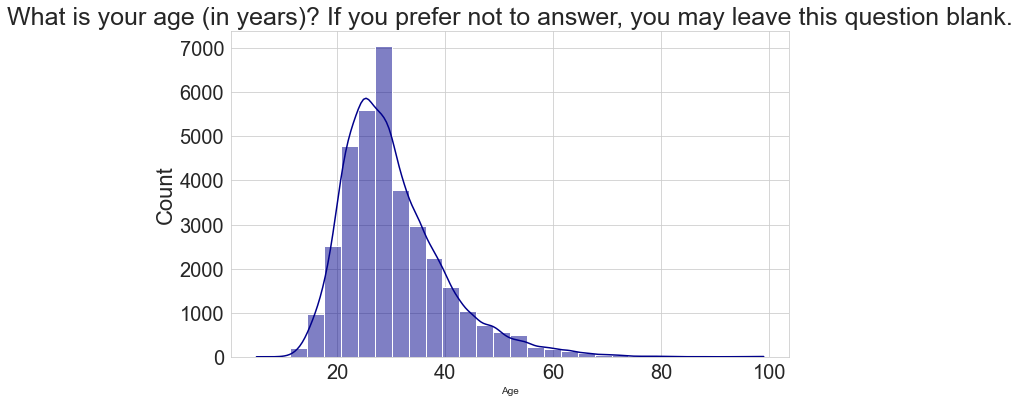

In [25]:
#histogram
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=update_survey_data, x="Age", kde=True, bins=30, color='darkblue')
ax.set_title(schema.Age, fontsize=25)
ax.set_ylabel ('Count', fontsize=22)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [26]:
#creating the function
def age_label(row):
    age = row.Age
    if age <= 14:
        return "5 - 14"
    elif age <= 19:
        return "15 - 19"
    elif age <= 30:
        return "20 - 30"
    elif age <= 45:
        return "31 - 45"
    elif age <= 60:
        return "46 - 60"
    else:
        return "Above 60"

In [27]:
#drop nas to assign age range
survey_updated = update_survey_data.dropna()
survey_updated

Respondent                      MainBranch Hobbyist   Age  Age1stCode  \
9            10.0  I am a developer by profession      Yes  22.0        14.0   
10           11.0  I am a developer by profession      Yes  23.0        13.0   
13           14.0  I am a developer by profession      Yes  27.0        13.0   
18           19.0  I am a developer by profession       No  24.0        15.0   
32           33.0  I am a developer by profession      Yes  39.0        14.0   
...           ...                             ...      ...   ...         ...   
61662     62912.0  I am a developer by profession      Yes  24.0        21.0   
61993     63288.0  I am a developer by profession       No  31.0        16.0   
62212     63516.0  I am a developer by profession      Yes  30.0        21.0   
63402     64810.0  I am a developer by profession      Yes  32.0        12.0   
63517     64938.0  I am a developer by profession       No  33.0        13.0   

      CompFreq  CompTotal  ConvertedComp         Country  \
9       Yearly    25000.0        32315.0  United Kingdom   
10      Yearly    31000.0        40070.0  United Kingdom   
13      Yearly    66000.0        66000.0   United States   
18      Yearly    83400.0        83400.0   United States   
32     Monthly     4900.0        63564.0         Belgium   
...        ...        ...            ...             ...   
61662  Monthly     1700.0        22056.0         Finland   
61993   Yearly    65000.0        84019.0  United Kingdom   
62212  Monthly     4500.0        38724.0       Singapore   
63402   Yearly    74500.0        74500.0   United States   
63517   Yearly    55000.0        59454.0          France   

                       DatabaseDesireNextYear  ...  \
9                        Microsoft SQL Server  ...   
10                Firebase;MongoDB;PostgreSQL  ...   
13              Firebase;Microsoft SQL Server  ...   
18                            MariaDB;MongoDB  ...   
32                                    MongoDB  ...   
...                                       ...  ...   
61662                      MongoDB;PostgreSQL  ...   
61993                                 MongoDB  ...   
62212      Microsoft SQL Server;MongoDB;MySQL  ...   
63402                      MariaDB;PostgreSQL  ...   
63517  Elasticsearch;MongoDB;PostgreSQL;Redis  ...   

                                NEWCollabToolsWorkedWith  \
9                                 Github;Microsoft Teams   
10     Confluence;Jira;Github;Slack;Microsoft Teams;M...   
13                Confluence;Jira;Github;Microsoft Teams   
18                          Confluence;Jira;Github;Slack   
32     Confluence;Jira;Github;Gitlab;Slack;Google Sui...   
...                                                  ...   
61662                 Jira;Github;Gitlab;Microsoft Teams   
61993                                       Github;Slack   
62212                   Confluence;Slack;Microsoft Teams   
63402  Confluence;Github;Slack;Microsoft Teams;Micros...   
63517         Confluence;Jira;Github;Gitlab;Slack;Trello   

                   NEWLearn  \
9          Every few months   
10         Every few months   
13         Every few months   
18              Once a year   
32              Once a year   
...                     ...   
61662           Once a year   
61993      Every few months   
62212  Once every few years   
63402           Once a year   
63517           Once a year   

                                  PlatformDesireNextYear  \
9                     Android;Linux;Raspberry Pi;Windows   
10                                  AWS;Docker;iOS;MacOS   
13            Google Cloud Platform;Raspberry Pi;Windows   
18                       iOS;Slack Apps and Integrations   
32     Docker;Google Cloud Platform;iOS;Kubernetes;MacOS   
...                                                  ...   
61662  Android;Docker;Heroku;IBM Cloud or Watson;Linu...   
61993                                         Kubernetes   
62212  AWS;Google Cloud Platform;Microsoft

In [28]:
#add the age label to the data
survey_updated["Age_label"] = survey_updated.apply(age_label, axis=1)

<ipython-input-28-42120ccc8c38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_updated["Age_label"] = survey_updated.apply(age_label, axis=1)


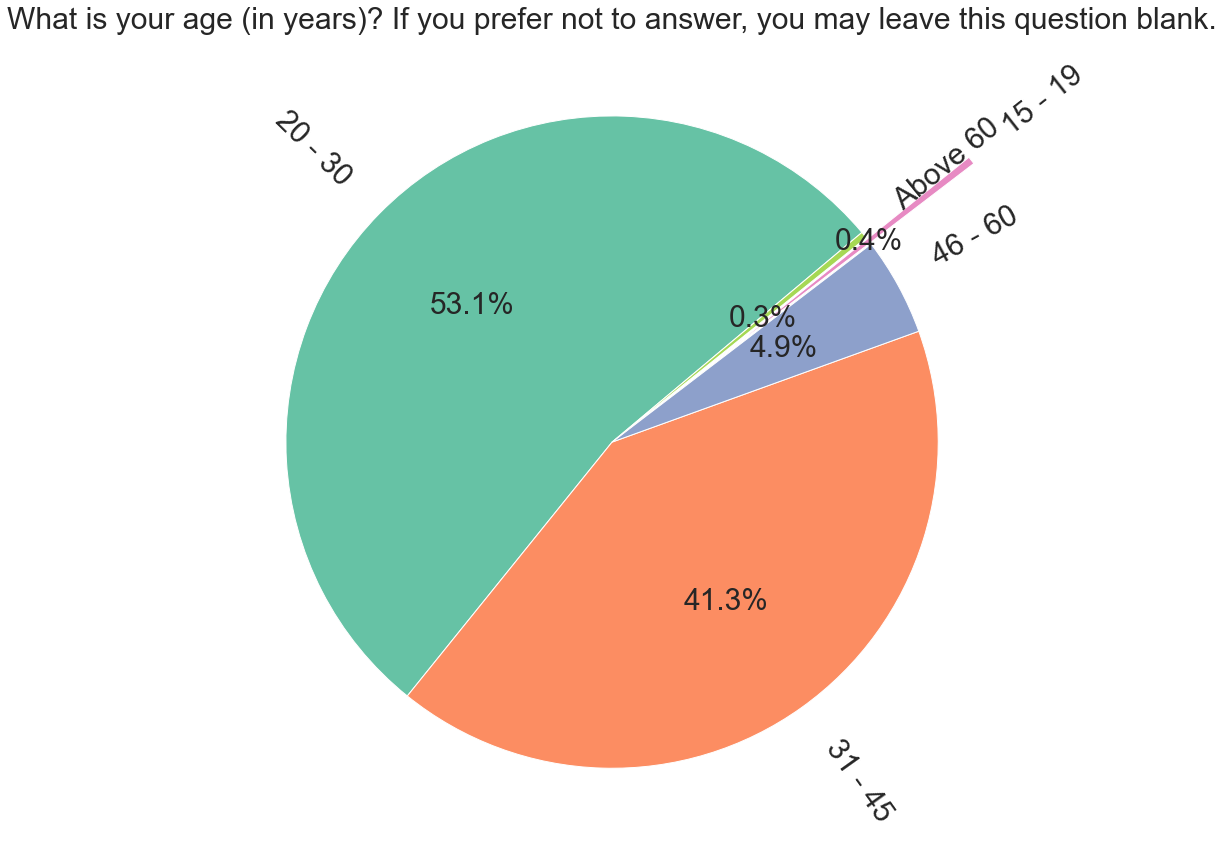

In [29]:
#create the plot
plt.subplots(figsize=(15,15))
data=survey_updated["Age_label"]
explode = [0, 0, 0, 0.4, 0]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=30,colors=sns.color_palette('Set2',10),startangle=40, explode=explode, rotatelabels='true')
plt.title(schema['Age'], fontsize=30)
plt.ylabel('')
plt.show()

* Loye created plot with Age 1st Code which was modified by Vanessa.
* Vanessa used the function made by Benjamine for the range of YearsCode and YearsCodePro.

### Age First Code

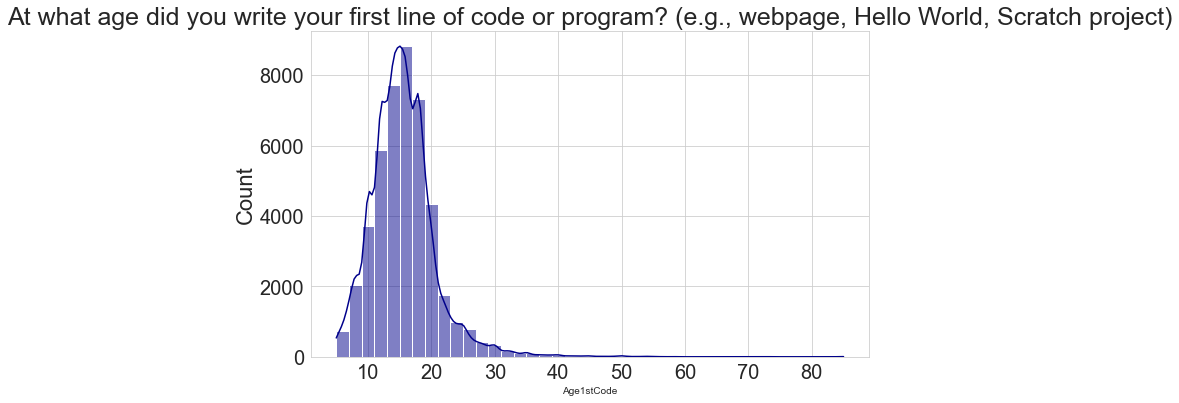

In [30]:
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=update_survey_data, x="Age1stCode", kde=True, bins=40, color='darkblue')
ax.set_title(schema.Age1stCode, fontsize=25)
ax.set_ylabel ('Count', fontsize=22)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

### Years Code

In [31]:
#creating the function
def yearscode_label(row):
    age = row.YearsCode
    if age <= 10:
        return "0 - 10"
    elif age <= 19:
        return "11 - 19"
    elif age <= 30:
        return "20 - 30"
    elif age <= 40:
        return "31 - 40"
    elif age <= 50:
        return "41 - 50"


In [32]:
#add the age label to the data
update_survey_data["YearsCode_label"] = update_survey_data.apply(yearscode_label, axis=1)

<ipython-input-32-98a2e96e9654>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_survey_data["YearsCode_label"] = update_survey_data.apply(yearscode_label, axis=1)


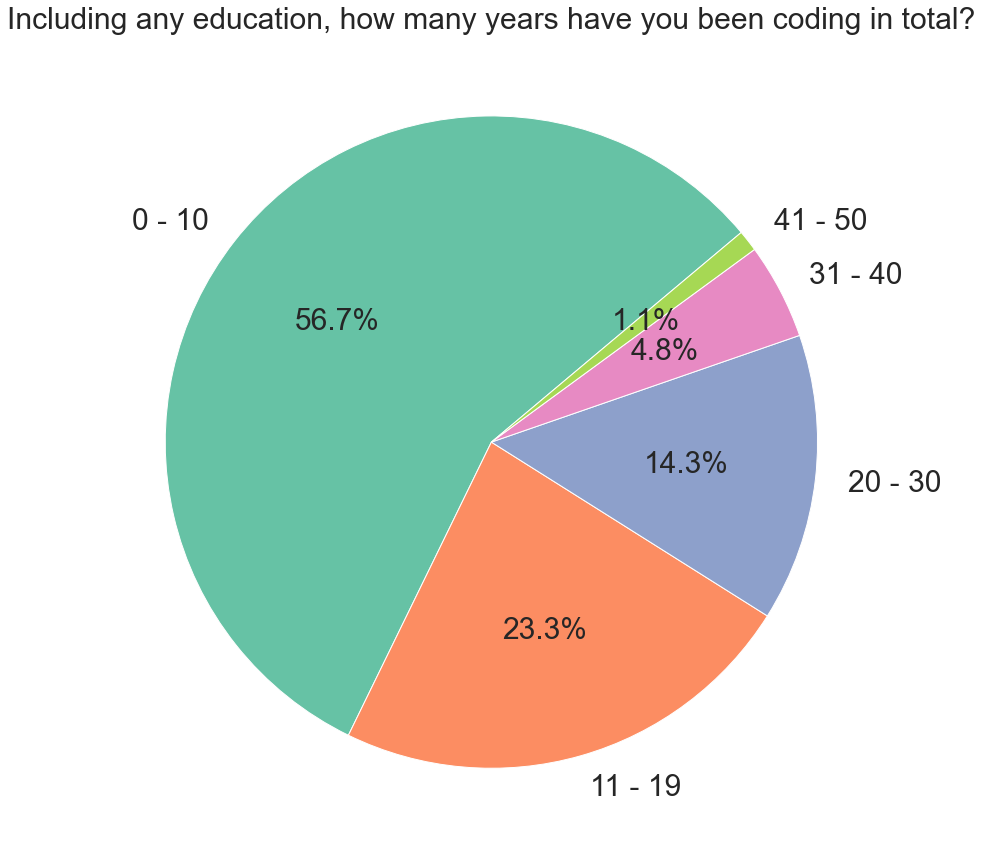

In [33]:
#create the plot
plt.subplots(figsize=(15,15))
data=update_survey_data["YearsCode_label"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=30,colors=sns.color_palette('Set2',10),startangle=40)
plt.title(schema['YearsCode'], fontsize=30)
plt.ylabel('')
plt.show()

### Years Code Pro

In [34]:
#creating the function
def yearscodepro_label(row):
    age = row.YearsCodePro
    if age <= 10:
        return "0 - 10"
    elif age <= 19:
        return "11 - 19"
    elif age <= 30:
        return "20 - 30"
    elif age <= 40:
        return "31 - 40"
    elif age <= 50:
        return "41 - 50"

In [35]:
#add the age label to the data
update_survey_data["YearsCodePro_label"] = update_survey_data.apply(yearscodepro_label, axis=1)

<ipython-input-35-fc94e98c4679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_survey_data["YearsCodePro_label"] = update_survey_data.apply(yearscodepro_label, axis=1)


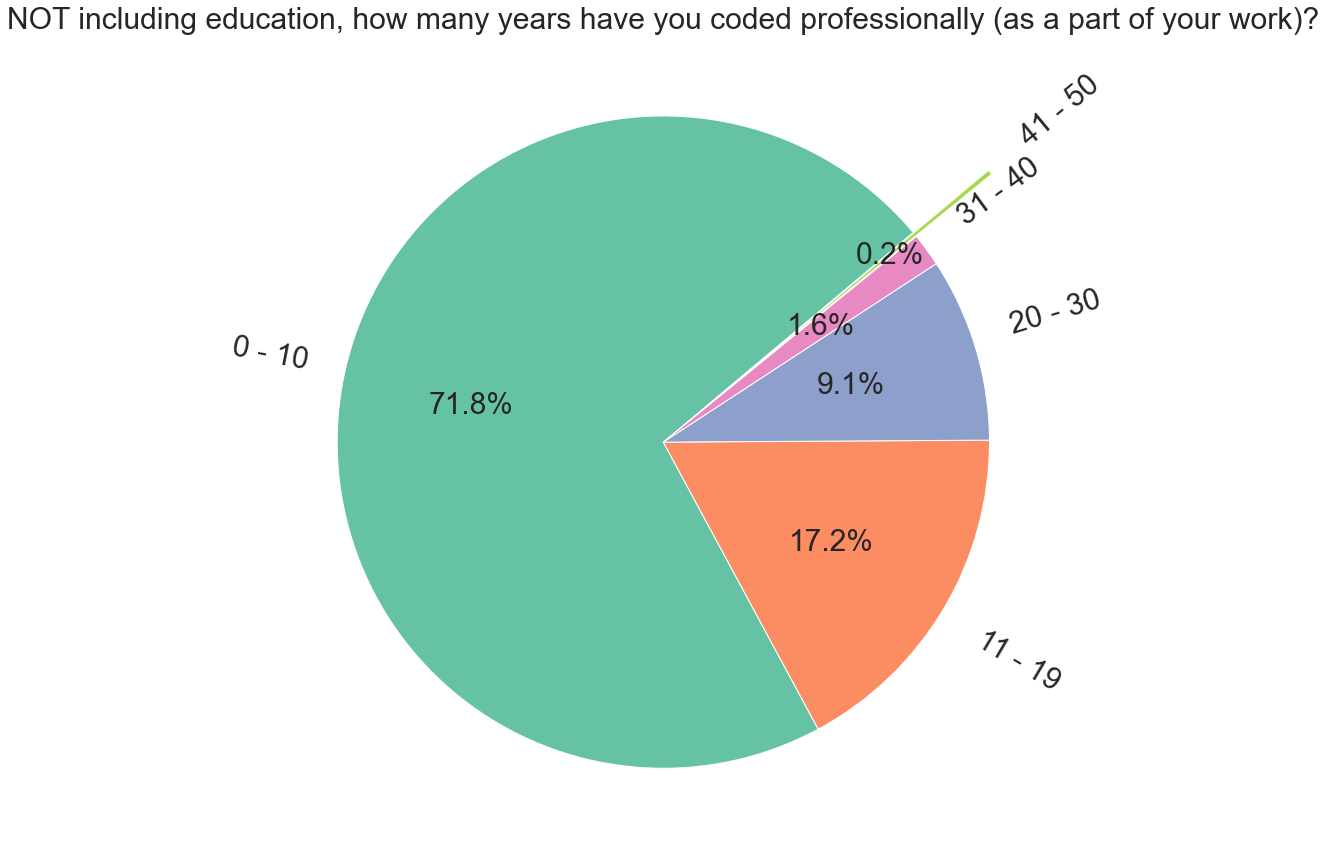

In [36]:
#create the plot
plt.subplots(figsize=(15,15))
explode = [0, 0, 0, 0, 0.3]
data=update_survey_data["YearsCodePro_label"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=30,colors=sns.color_palette('Set2',10),startangle=40, explode=explode, rotatelabels='true')
plt.title(schema['YearsCodePro'], fontsize=30)
plt.ylabel('')
plt.show()

### Ethnicity
The dataframe was created using the split column function and the chart was made by Vanessa

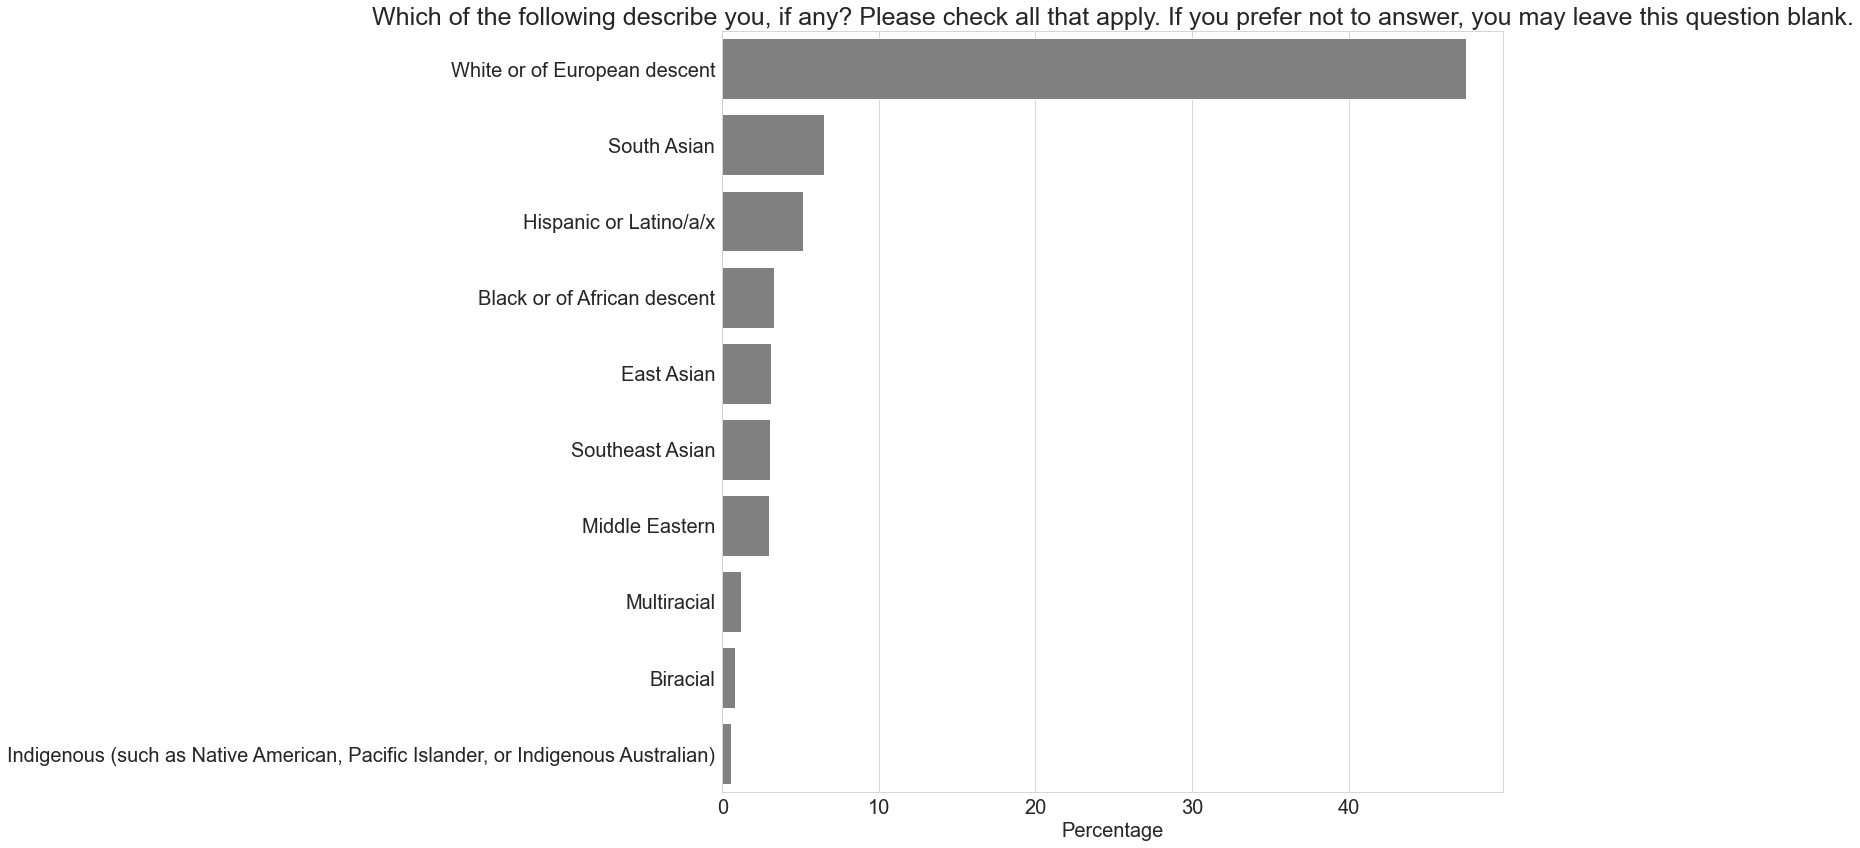

In [37]:
#split
ethnicity_df = split_multicolumn(update_survey_data.Ethnicity)
#create the dataframe
ethnicity_type_percentages = ethnicity_df.mean().sort_values(ascending=False) * 100
ethnicity_type_percentages= ethnicity_type_percentages.to_frame(name='percentage').reset_index()
#create the bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=ethnicity_type_percentages, ci=None, color='grey',orient='h')
ax.set_title(schema['Ethnicity'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

### Gender
**Loye created the plot using a count plot but the gender values can better be represented as a piechart considering that there are three values. This was modified by Vanessa.**

In [39]:
gender=update_survey_data['Gender'].value_counts()
gender=gender.to_frame()
gender

Gender
Man                                                 35972
Woman                                                3222
Non-binary, genderqueer, or gender non-conforming     331

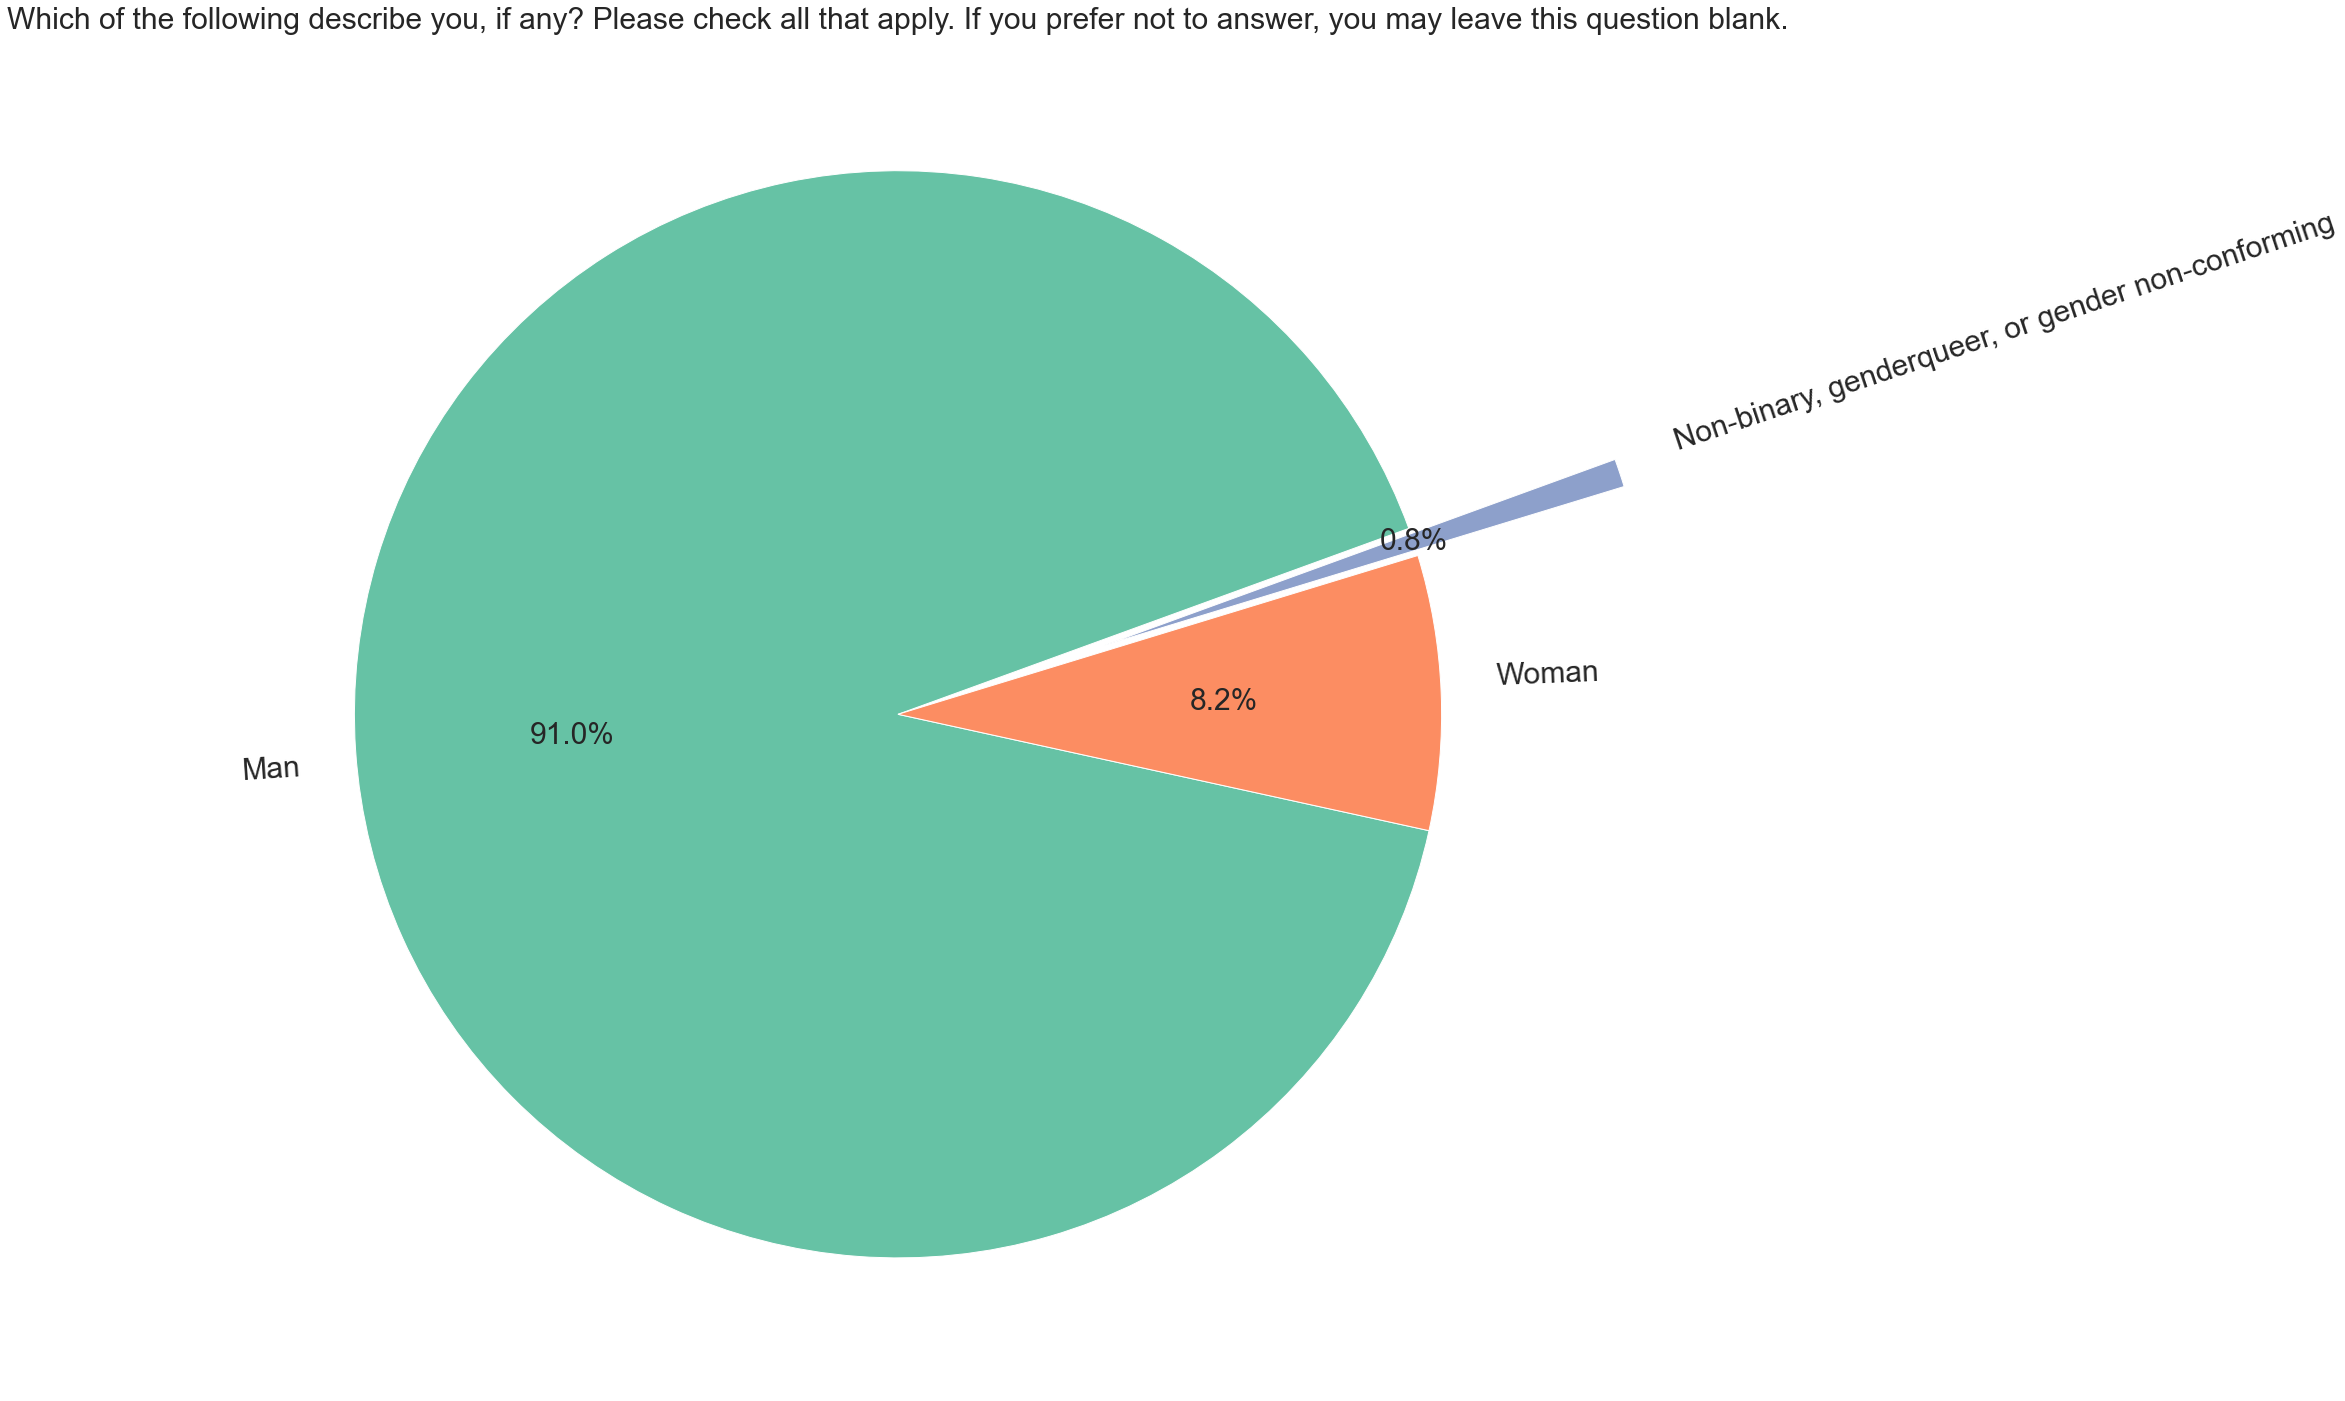

In [40]:
#create piechart
plt.subplots(figsize=(25,25))
data=update_survey_data["Gender"]
explode = [0, 0, 0.4]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=30,colors=sns.color_palette('Set2',10),startangle=20, explode=explode, rotatelabels='true')
plt.title(schema['Gender'], fontsize=30)
plt.ylabel('')
plt.show()

### MainBranch

* **Loye created a count plot with the MainBranch column, Vanessa modified this to show the percentages and the bar chart arranged in descending order.**

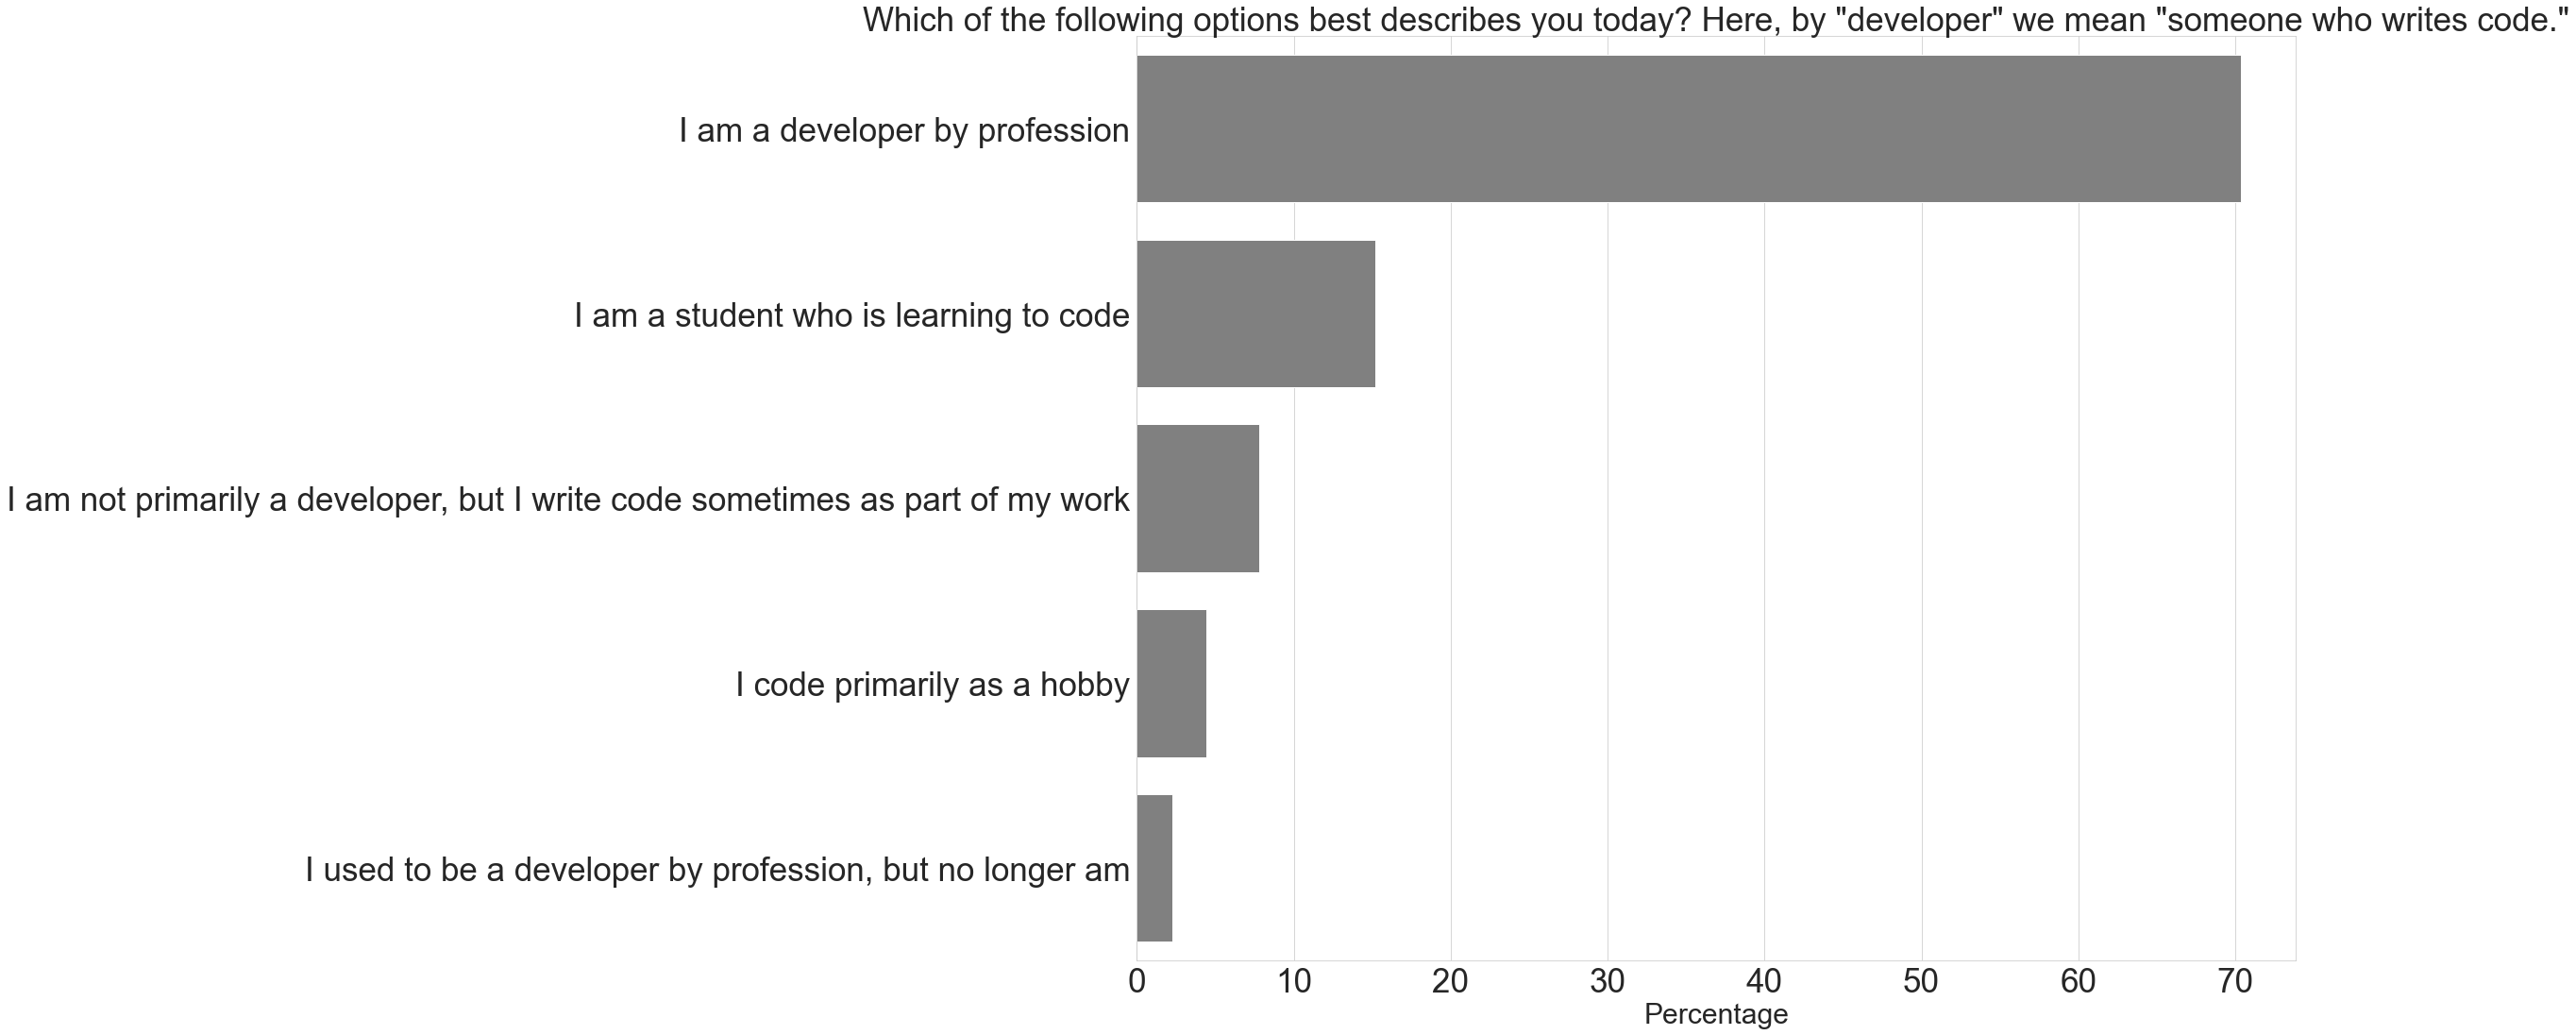

In [41]:
#dataframe
mainbranch = update_survey_data['MainBranch'].value_counts(normalize=True)*100
mainbranch = mainbranch.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=mainbranch, ci=None, color='grey',orient='h')
ax.set_title(schema['MainBranch'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)

* **From this point of the data visualization, the plots were created by Loye and modified by Vanessa.**

## Developer Experience

### Hobbyist

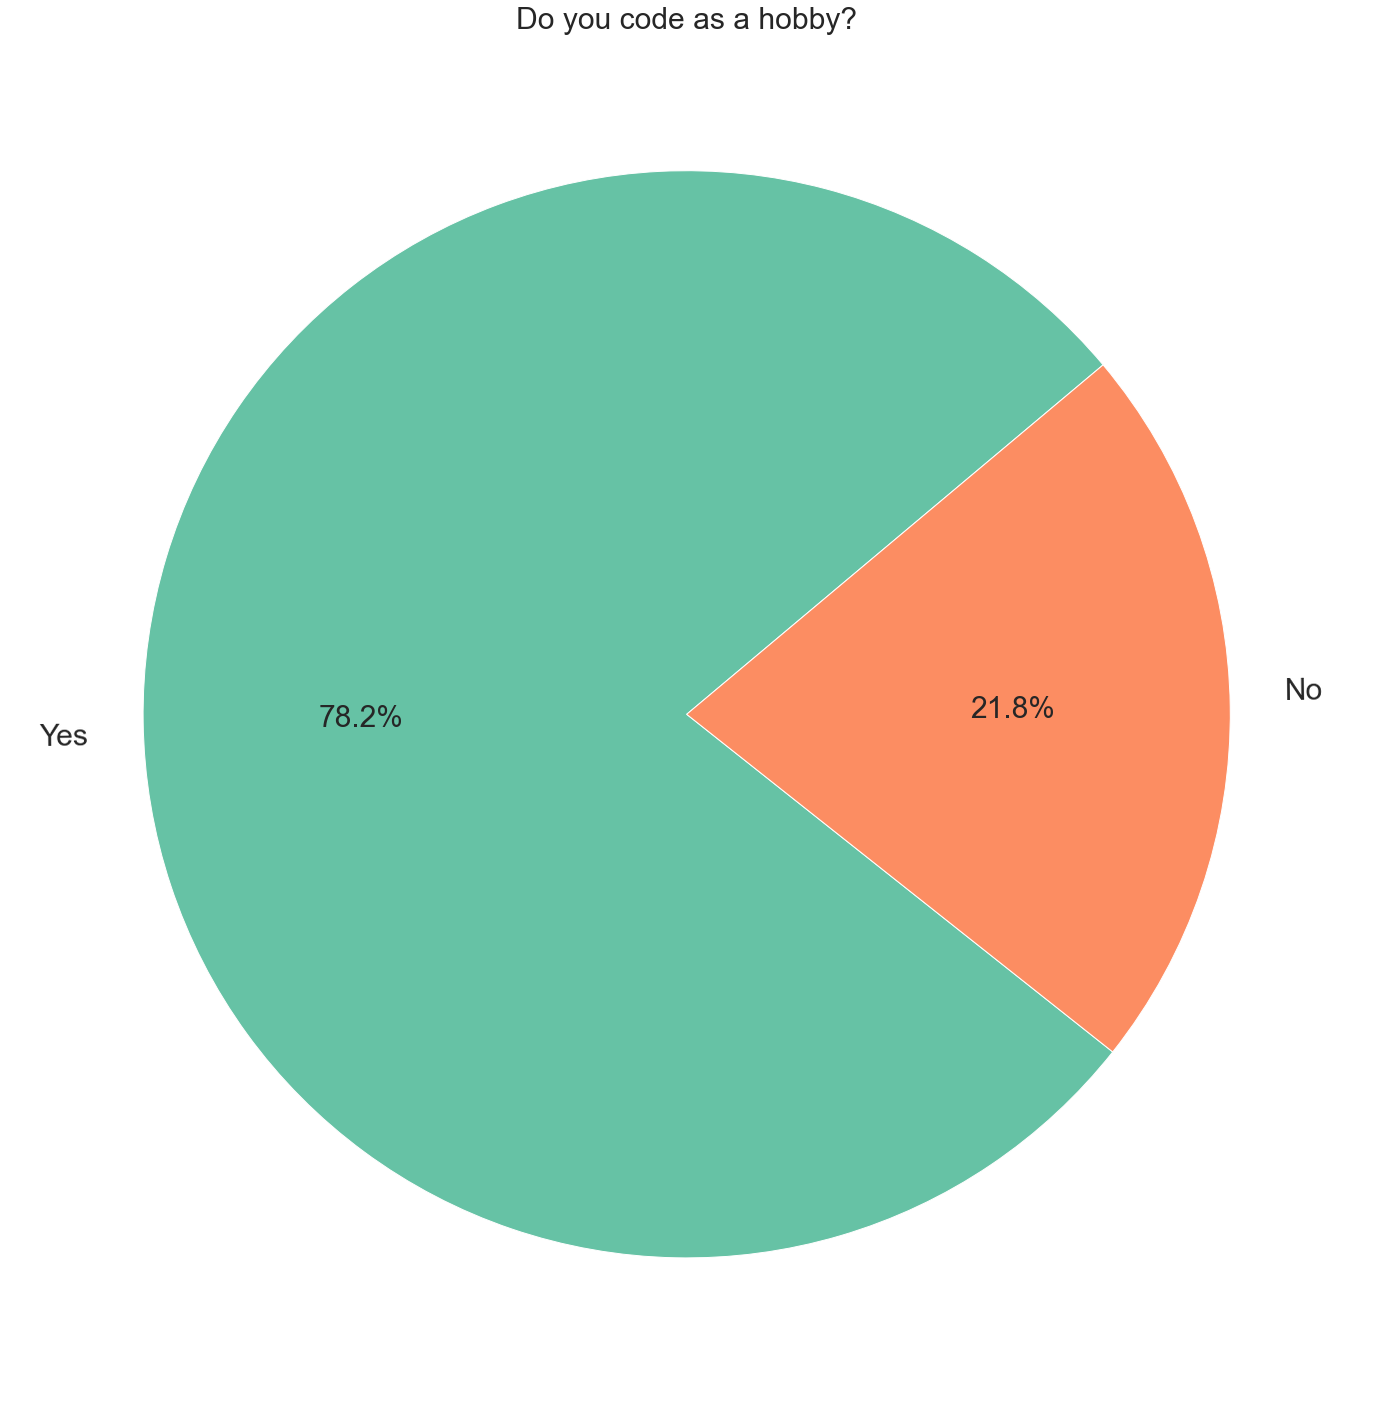

In [42]:
plt.subplots(figsize=(25,25))
data=update_survey_data["Hobbyist"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=30,colors=sns.color_palette('Set2',10),startangle=40, rotatelabels='true')
plt.title(schema['Hobbyist'], fontsize=30)
plt.ylabel('')
plt.show()

### Type of Developer

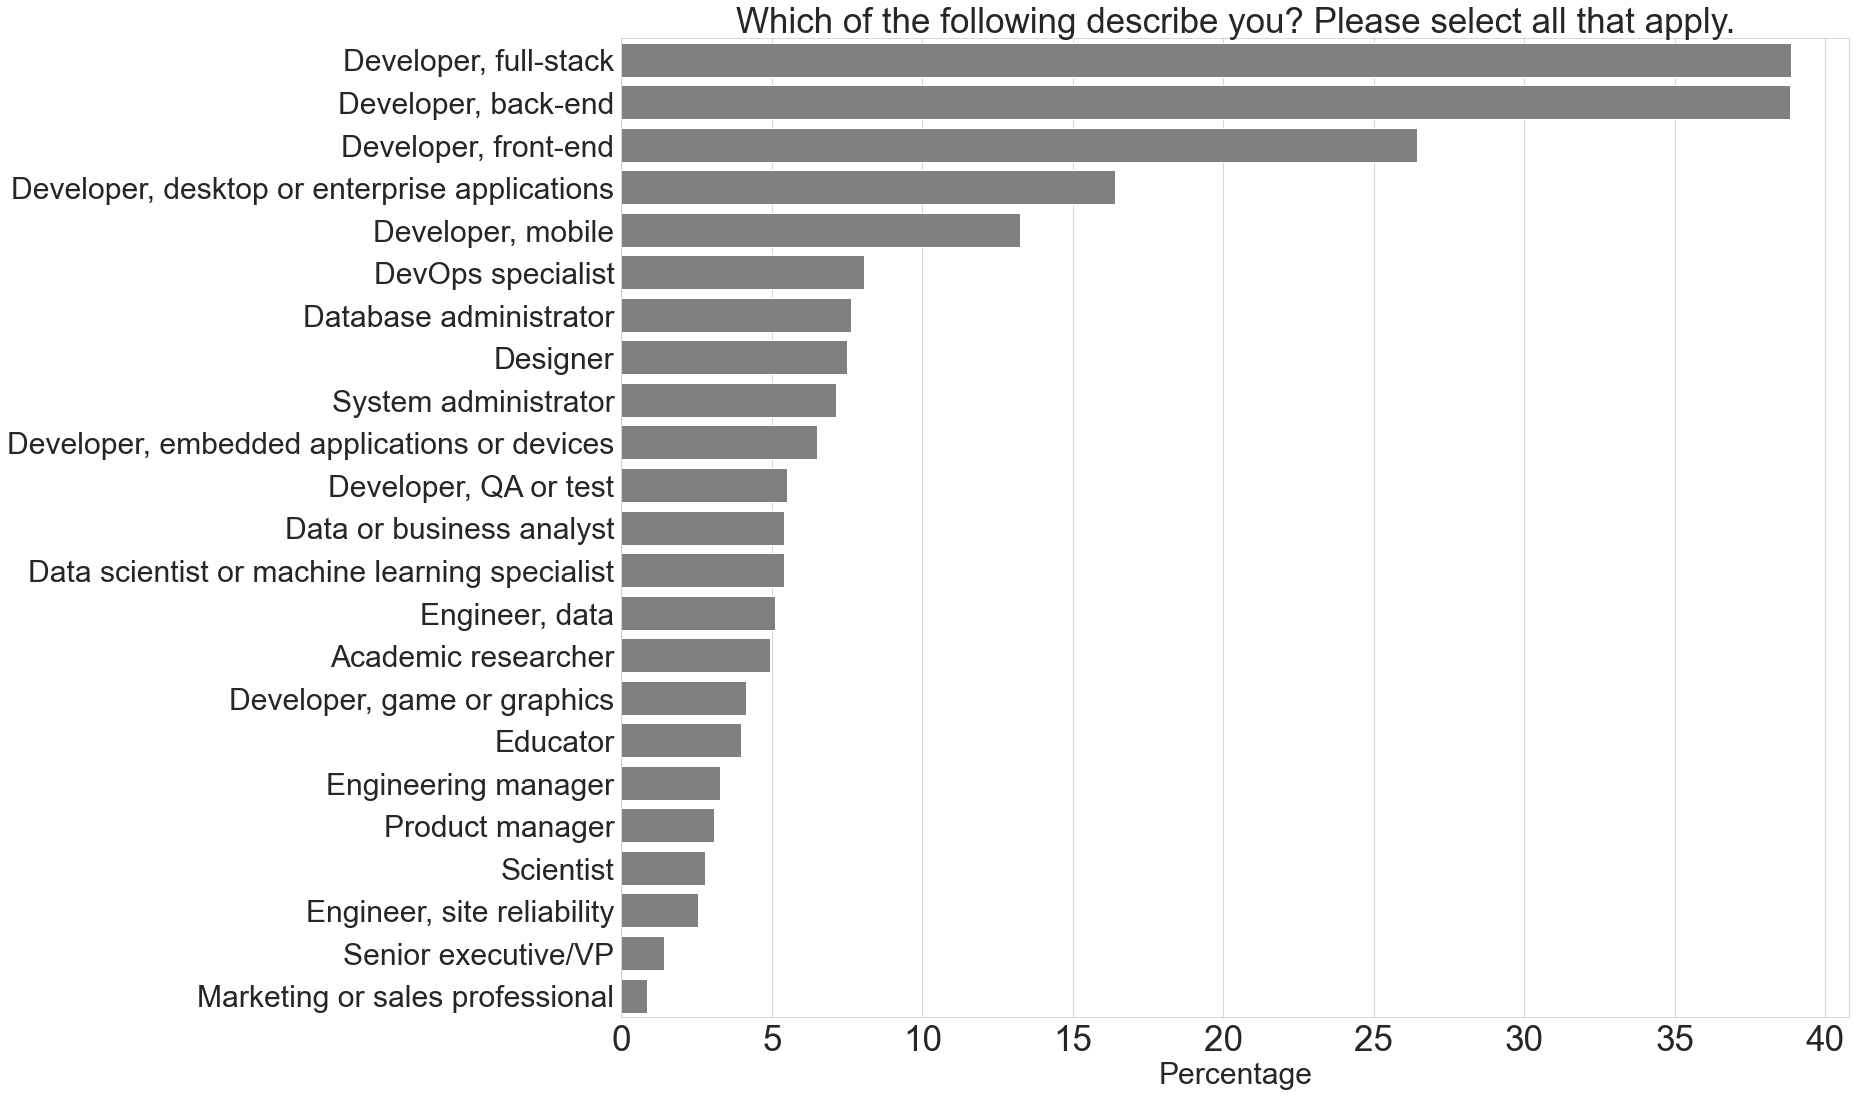

In [43]:
#split columns
devtype = split_multicolumn(update_survey_data.DevType)
#create dataframe
devtype_percentage = devtype.mean().sort_values(ascending=False) * 100
devtype_percentage= devtype_percentage.to_frame(name='percentage').reset_index()
#create barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=devtype_percentage, ci=None, color='grey',orient='h')
ax.set_title(schema['DevType'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

## Education

### Degree

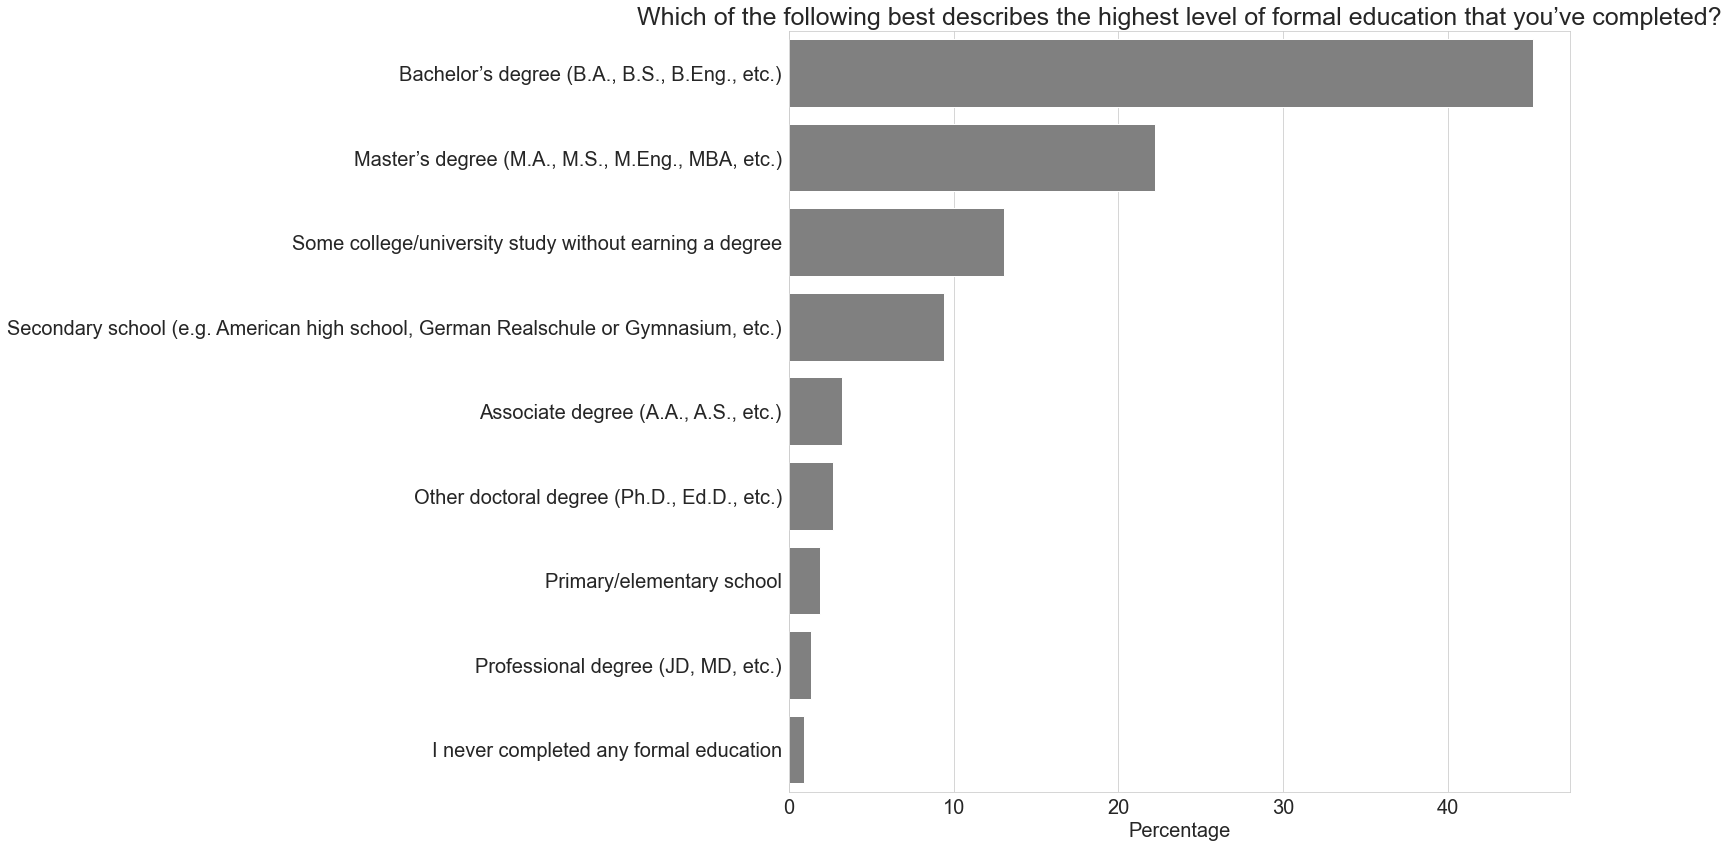

In [44]:
education=update_survey_data['EdLevel'].value_counts(normalize=True)*100
education=education.to_frame(name='percentage').reset_index()
#create barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=education, ci=None, color='grey',orient='h')
ax.set_title(schema['EdLevel'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

### Major

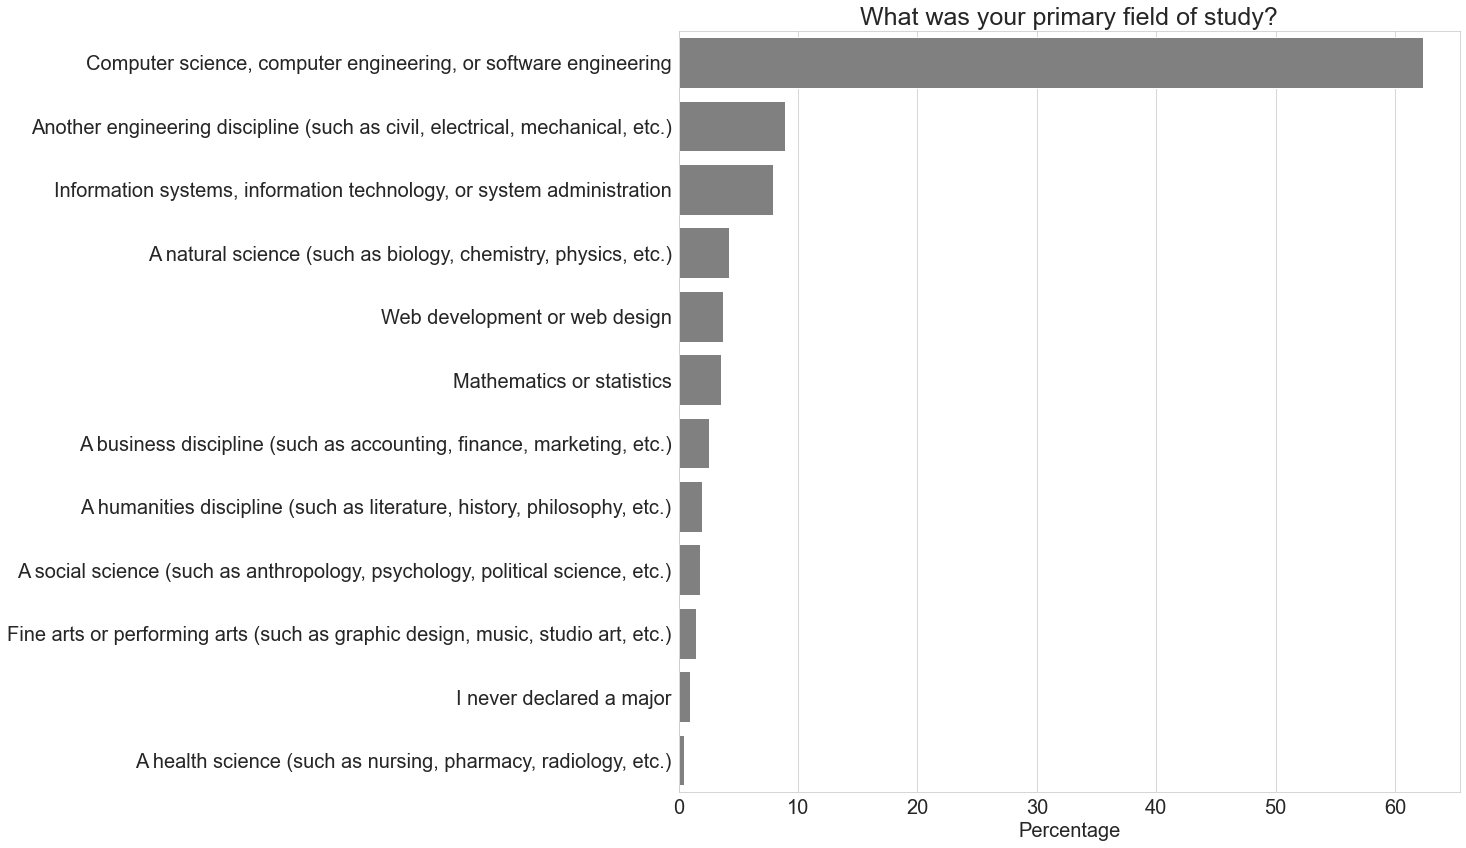

In [45]:
study=update_survey_data['UndergradMajor'].value_counts(normalize=True)*100
study=study.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=study, ci=None, color='grey',orient='h')
ax.set_title(schema['UndergradMajor'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

## Career

### Employment

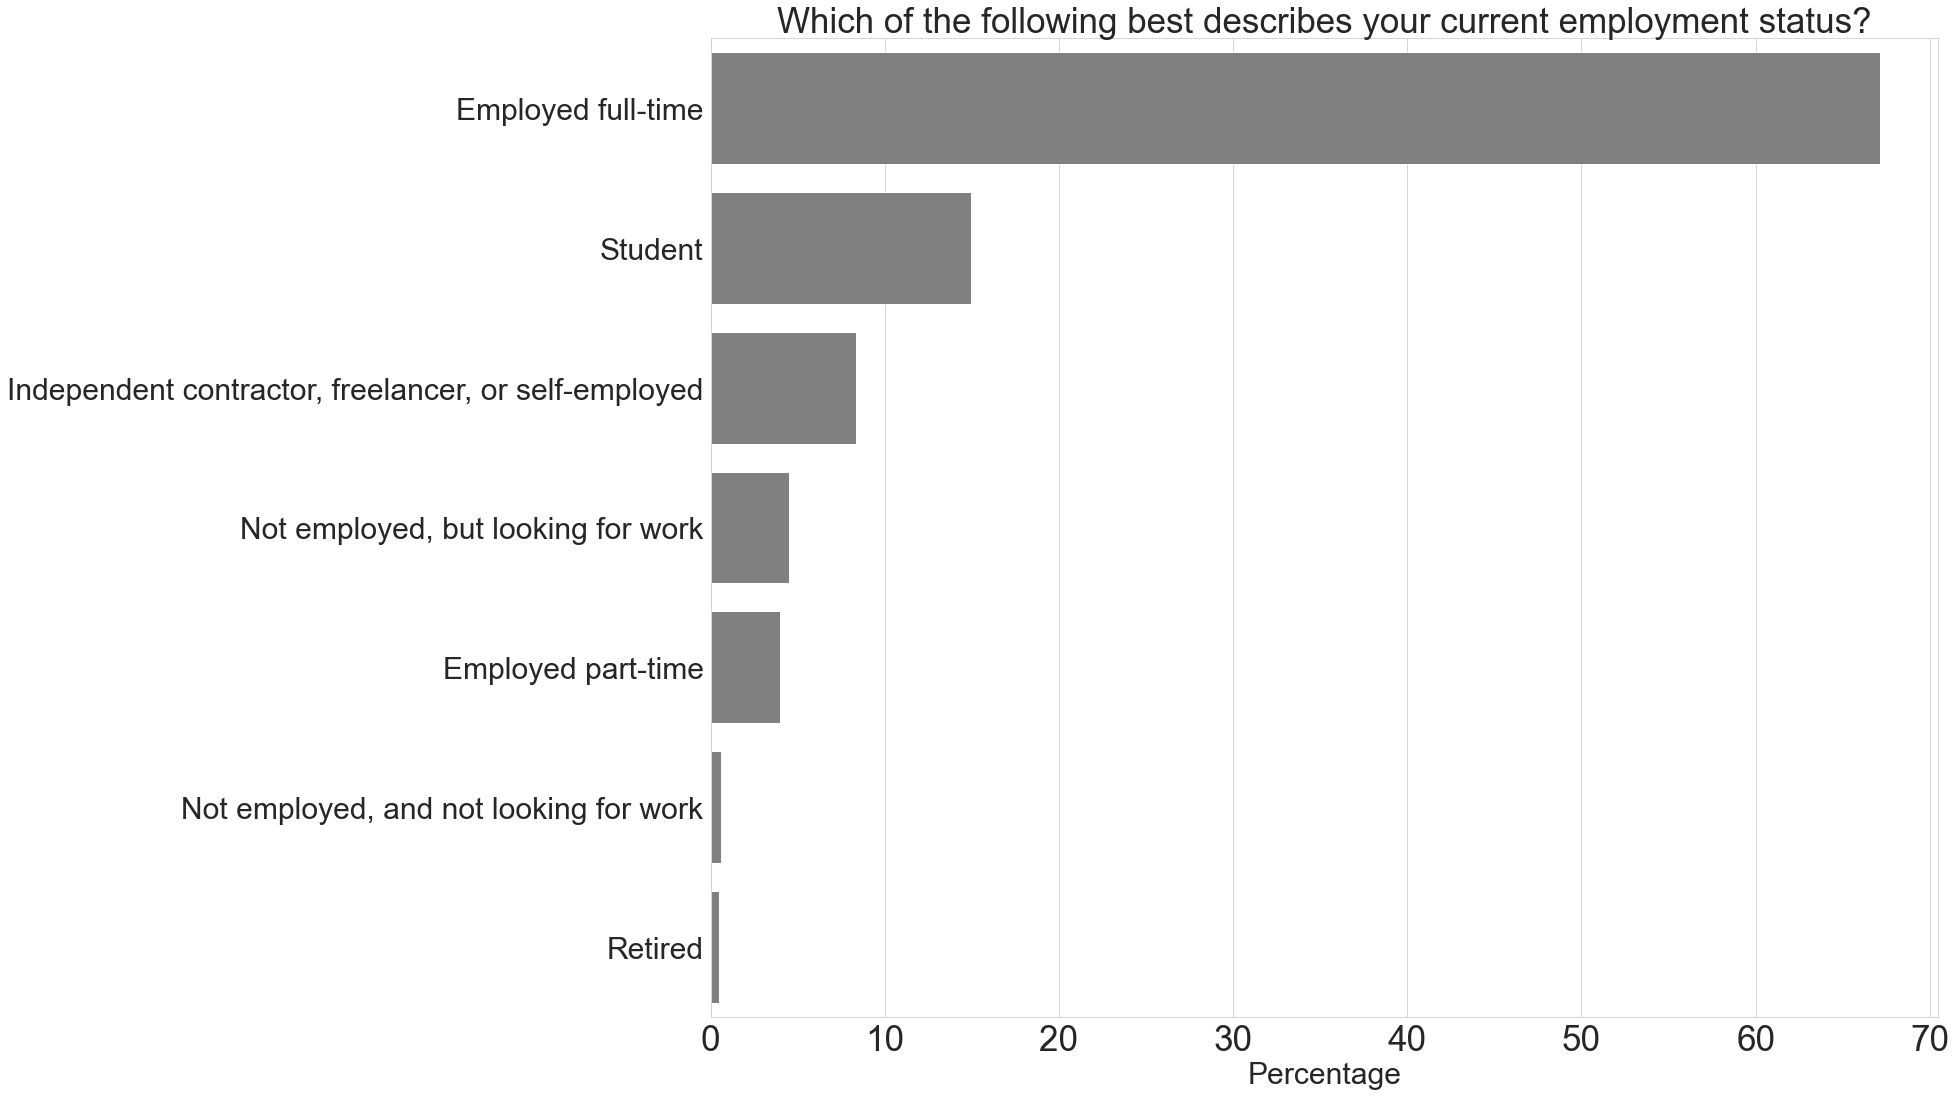

In [46]:
employed = update_survey_data['Employment'].value_counts(normalize=True)*100
employed = employed.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=employed, ci=None, color='grey',orient='h')
ax.set_title(schema['Employment'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

### Career Satistfaction

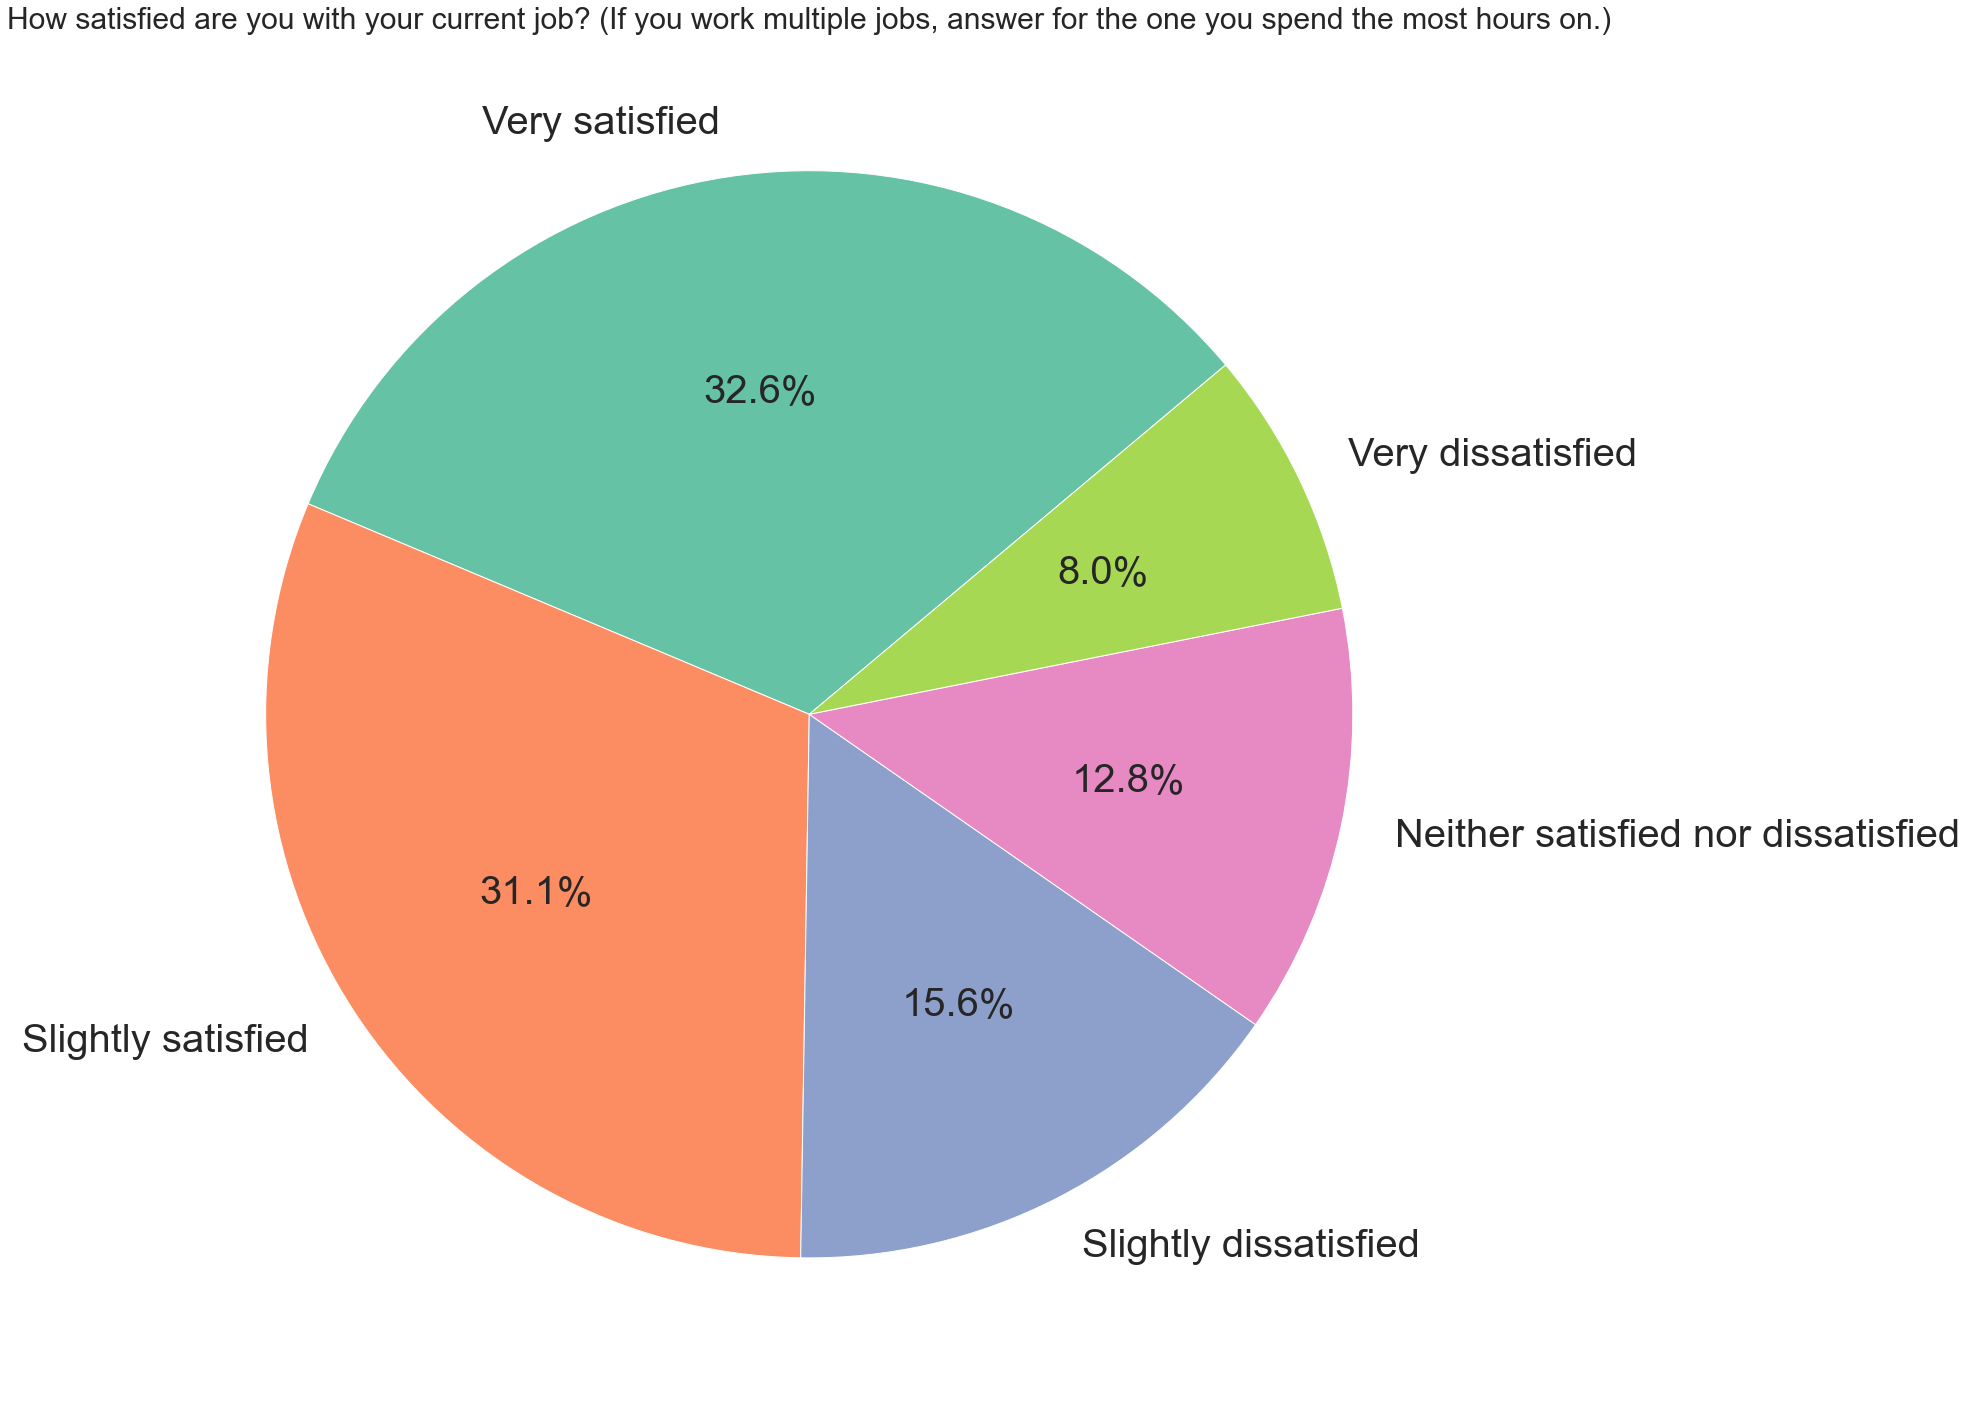

In [47]:
plt.subplots(figsize=(25,25))
data=update_survey_data["JobSat"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=40,colors=sns.color_palette('Set2',10),startangle=40)
plt.title(schema['JobSat'], fontsize=30)
plt.ylabel('')
plt.show()

### Jobseekers

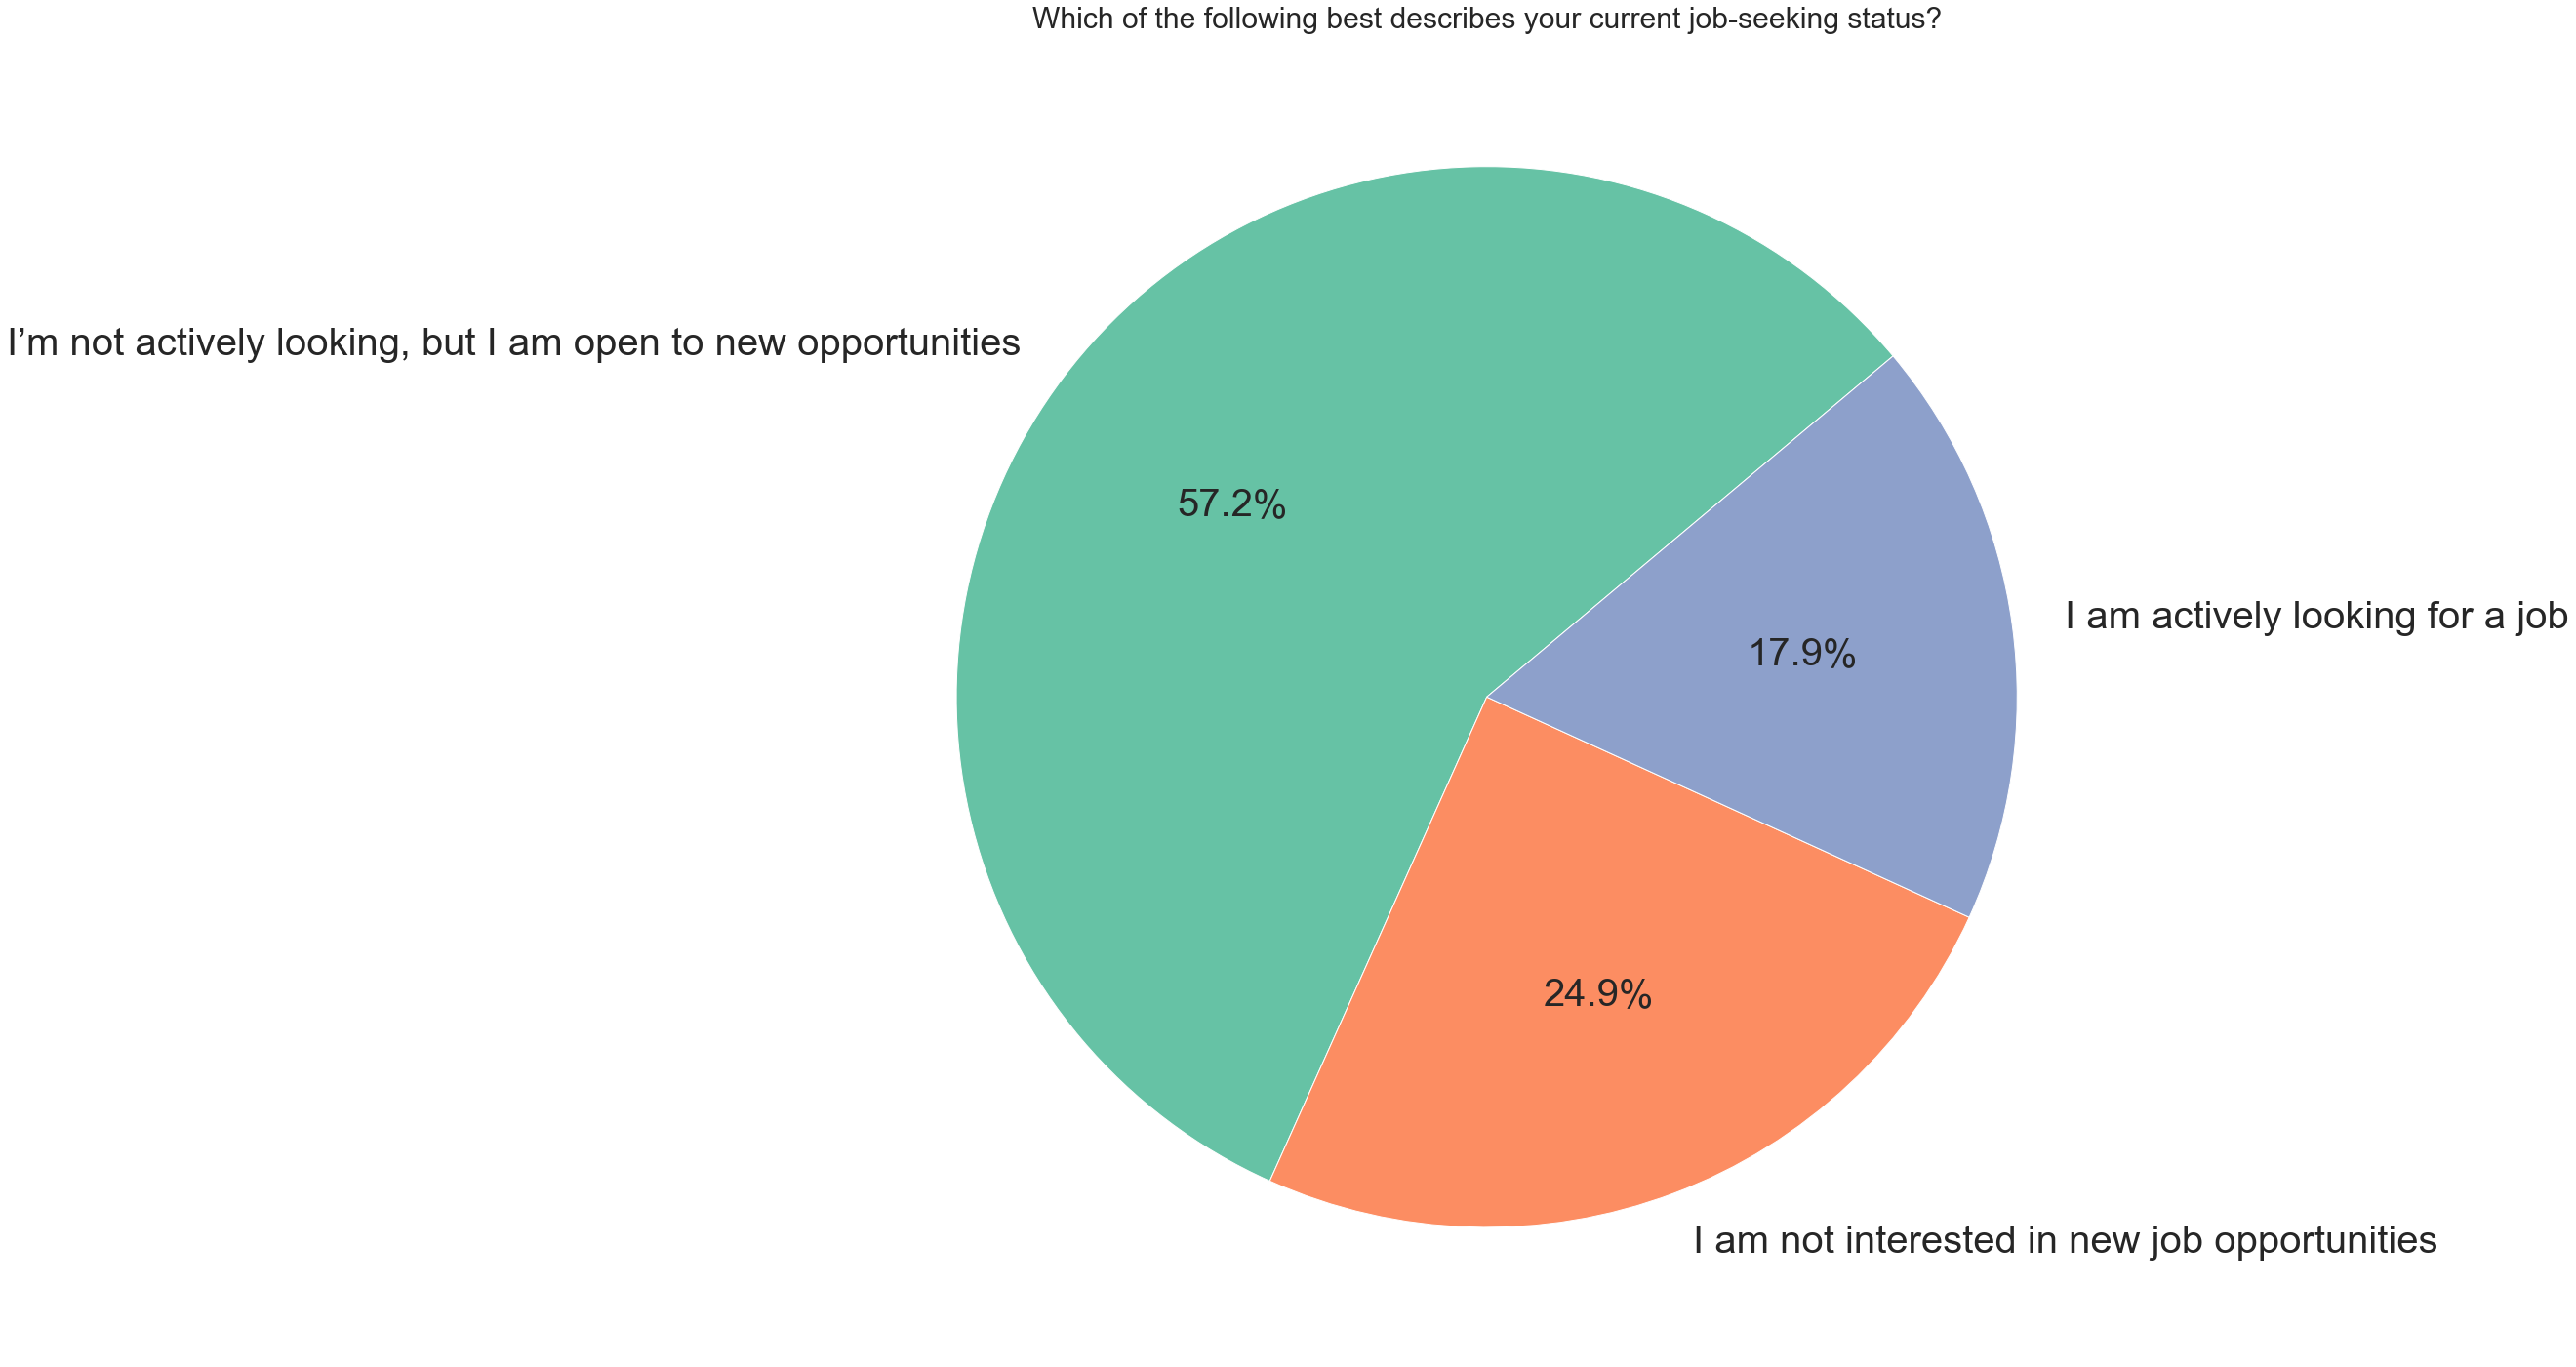

In [48]:
plt.subplots(figsize=(25,25))
data=update_survey_data["JobSeek"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=40,colors=sns.color_palette('Set2',10),startangle=40)
plt.title(schema['JobSeek'], fontsize=30)
plt.ylabel('')
plt.show()

### Job factors

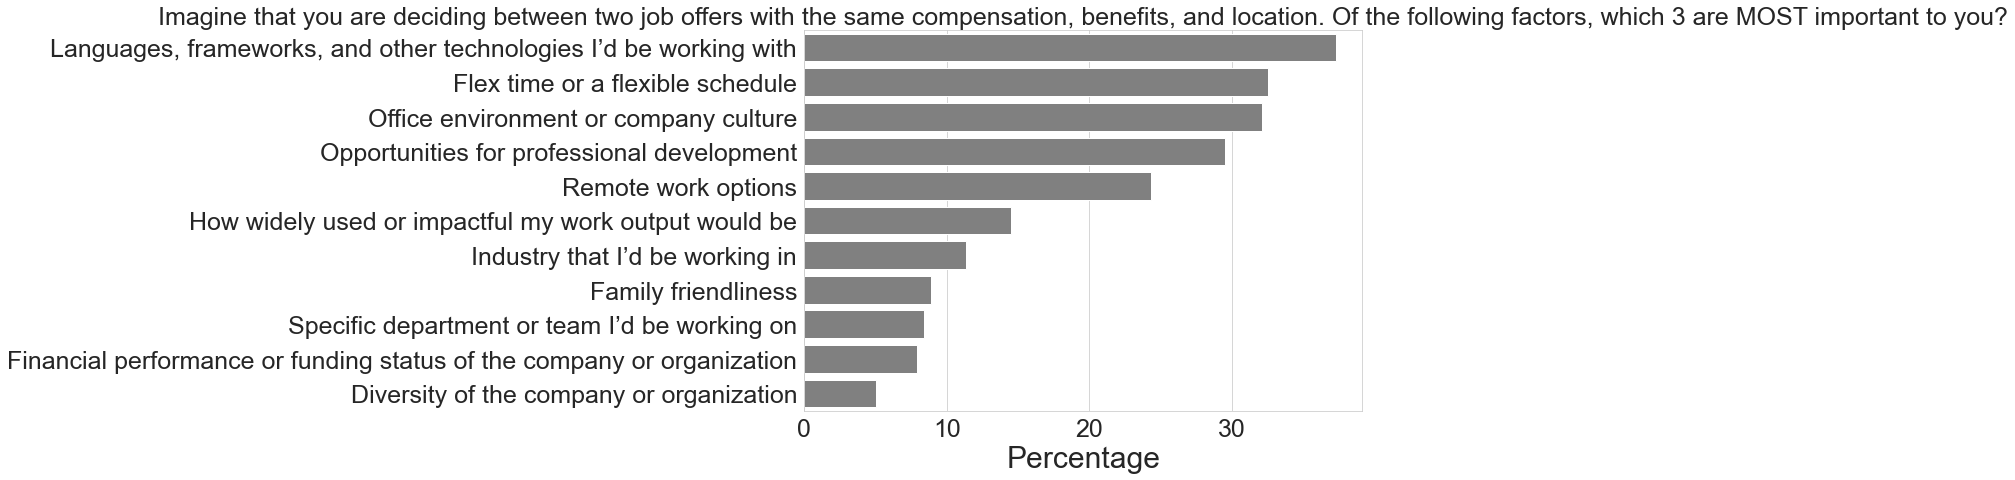

In [49]:
jobfactors = split_multicolumn(update_survey_data.JobFactors)
jobfactors_perc = jobfactors.mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10,7))
plt.title(schema['JobFactors'], fontsize=25)
ax=sns.barplot(x=jobfactors_perc, y=jobfactors_perc.index, color='grey')
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

## Open Source Software

### NewLearn

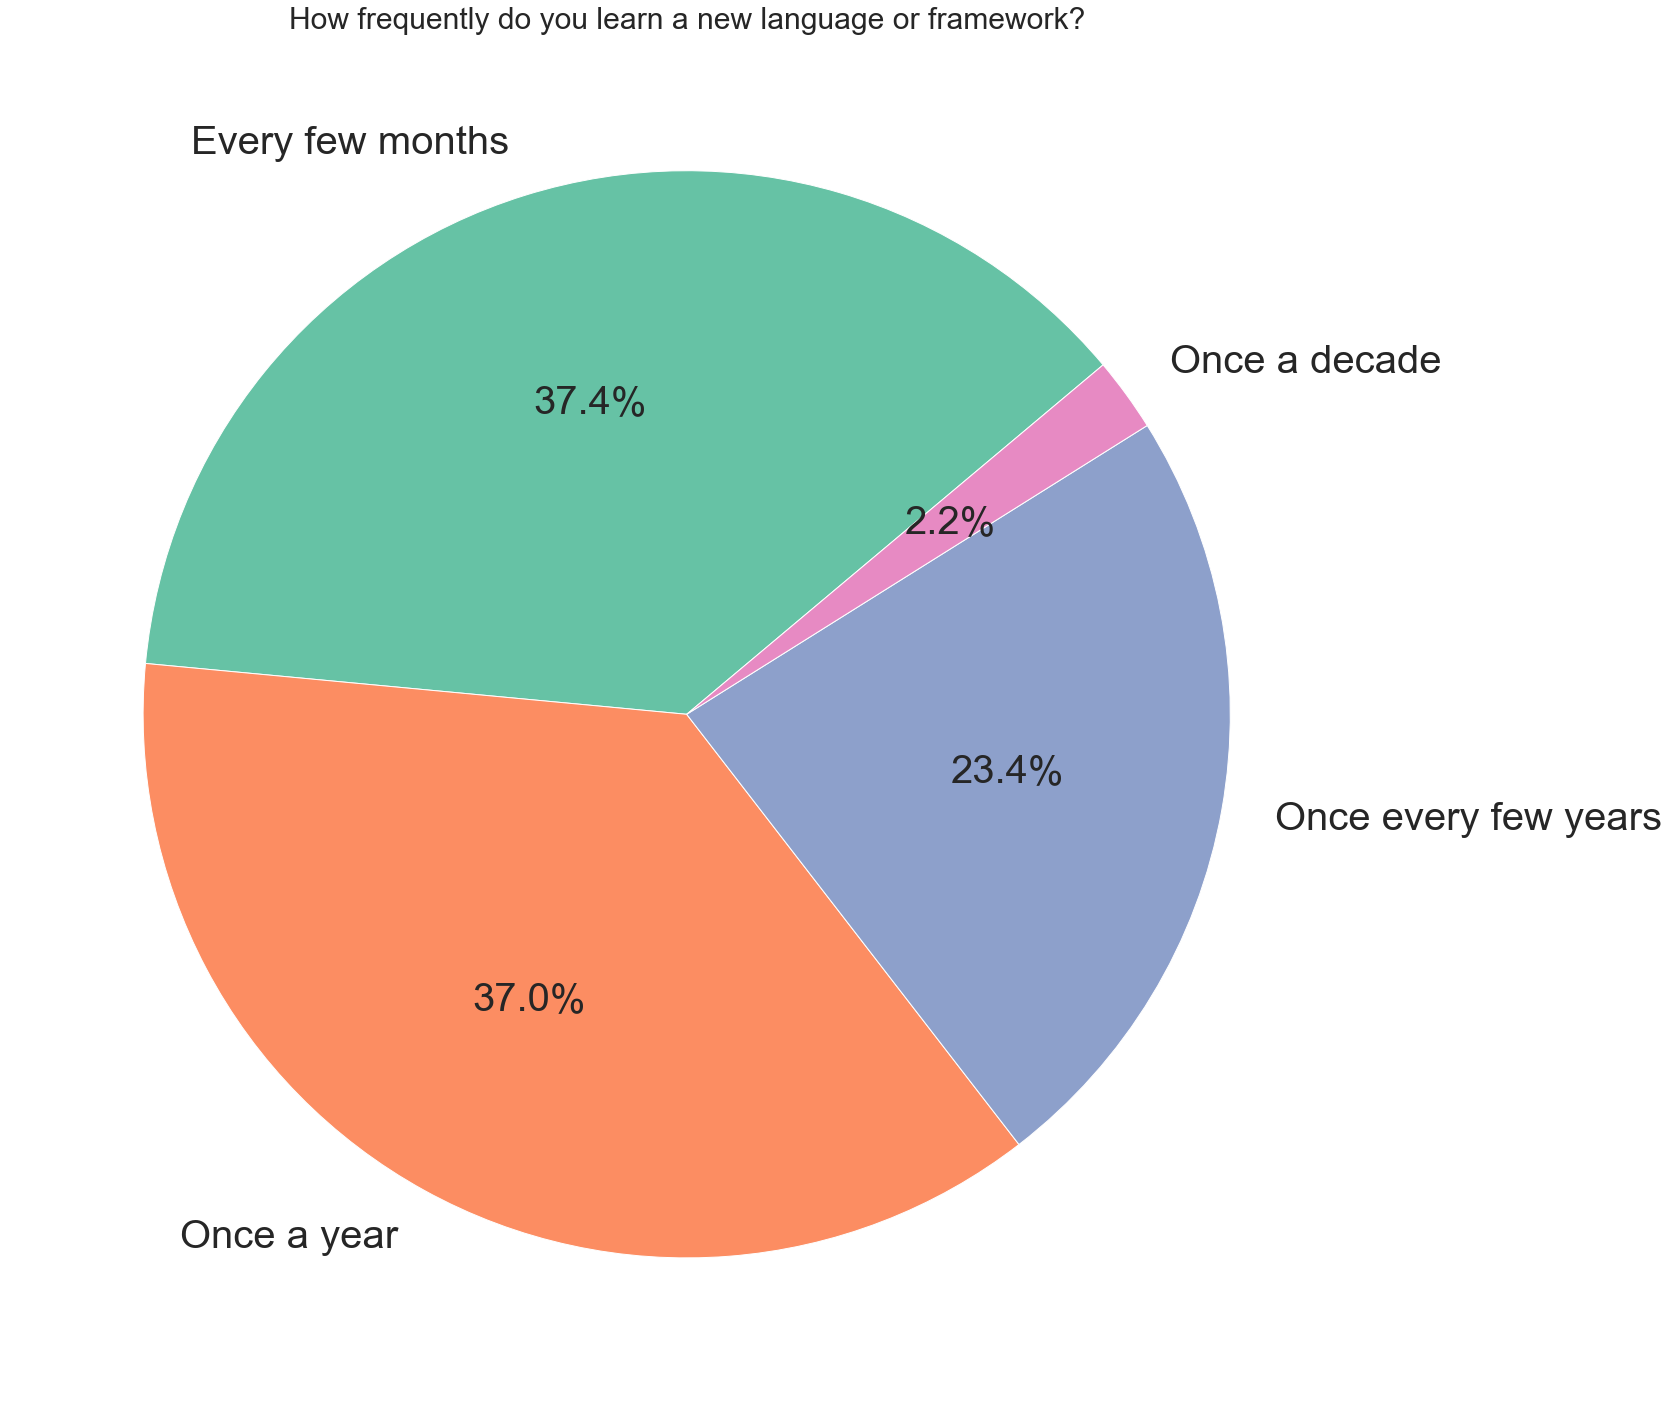

In [50]:
plt.subplots(figsize=(25,25))
data=update_survey_data["NEWLearn"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=40,colors=sns.color_palette('Set2',10),startangle=40)
plt.title(schema['NEWLearn'], fontsize=30)
plt.ylabel('')
plt.show()

* **Loye used word cloud to visualize Language worked with while Vanessa visualized it using barchart**

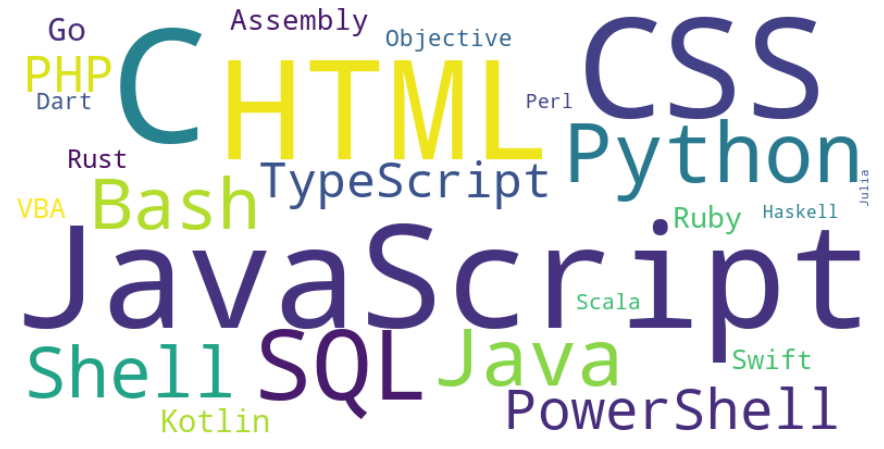

In [51]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in update_survey_data.LanguageWorkedWith.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

### Language Worked with

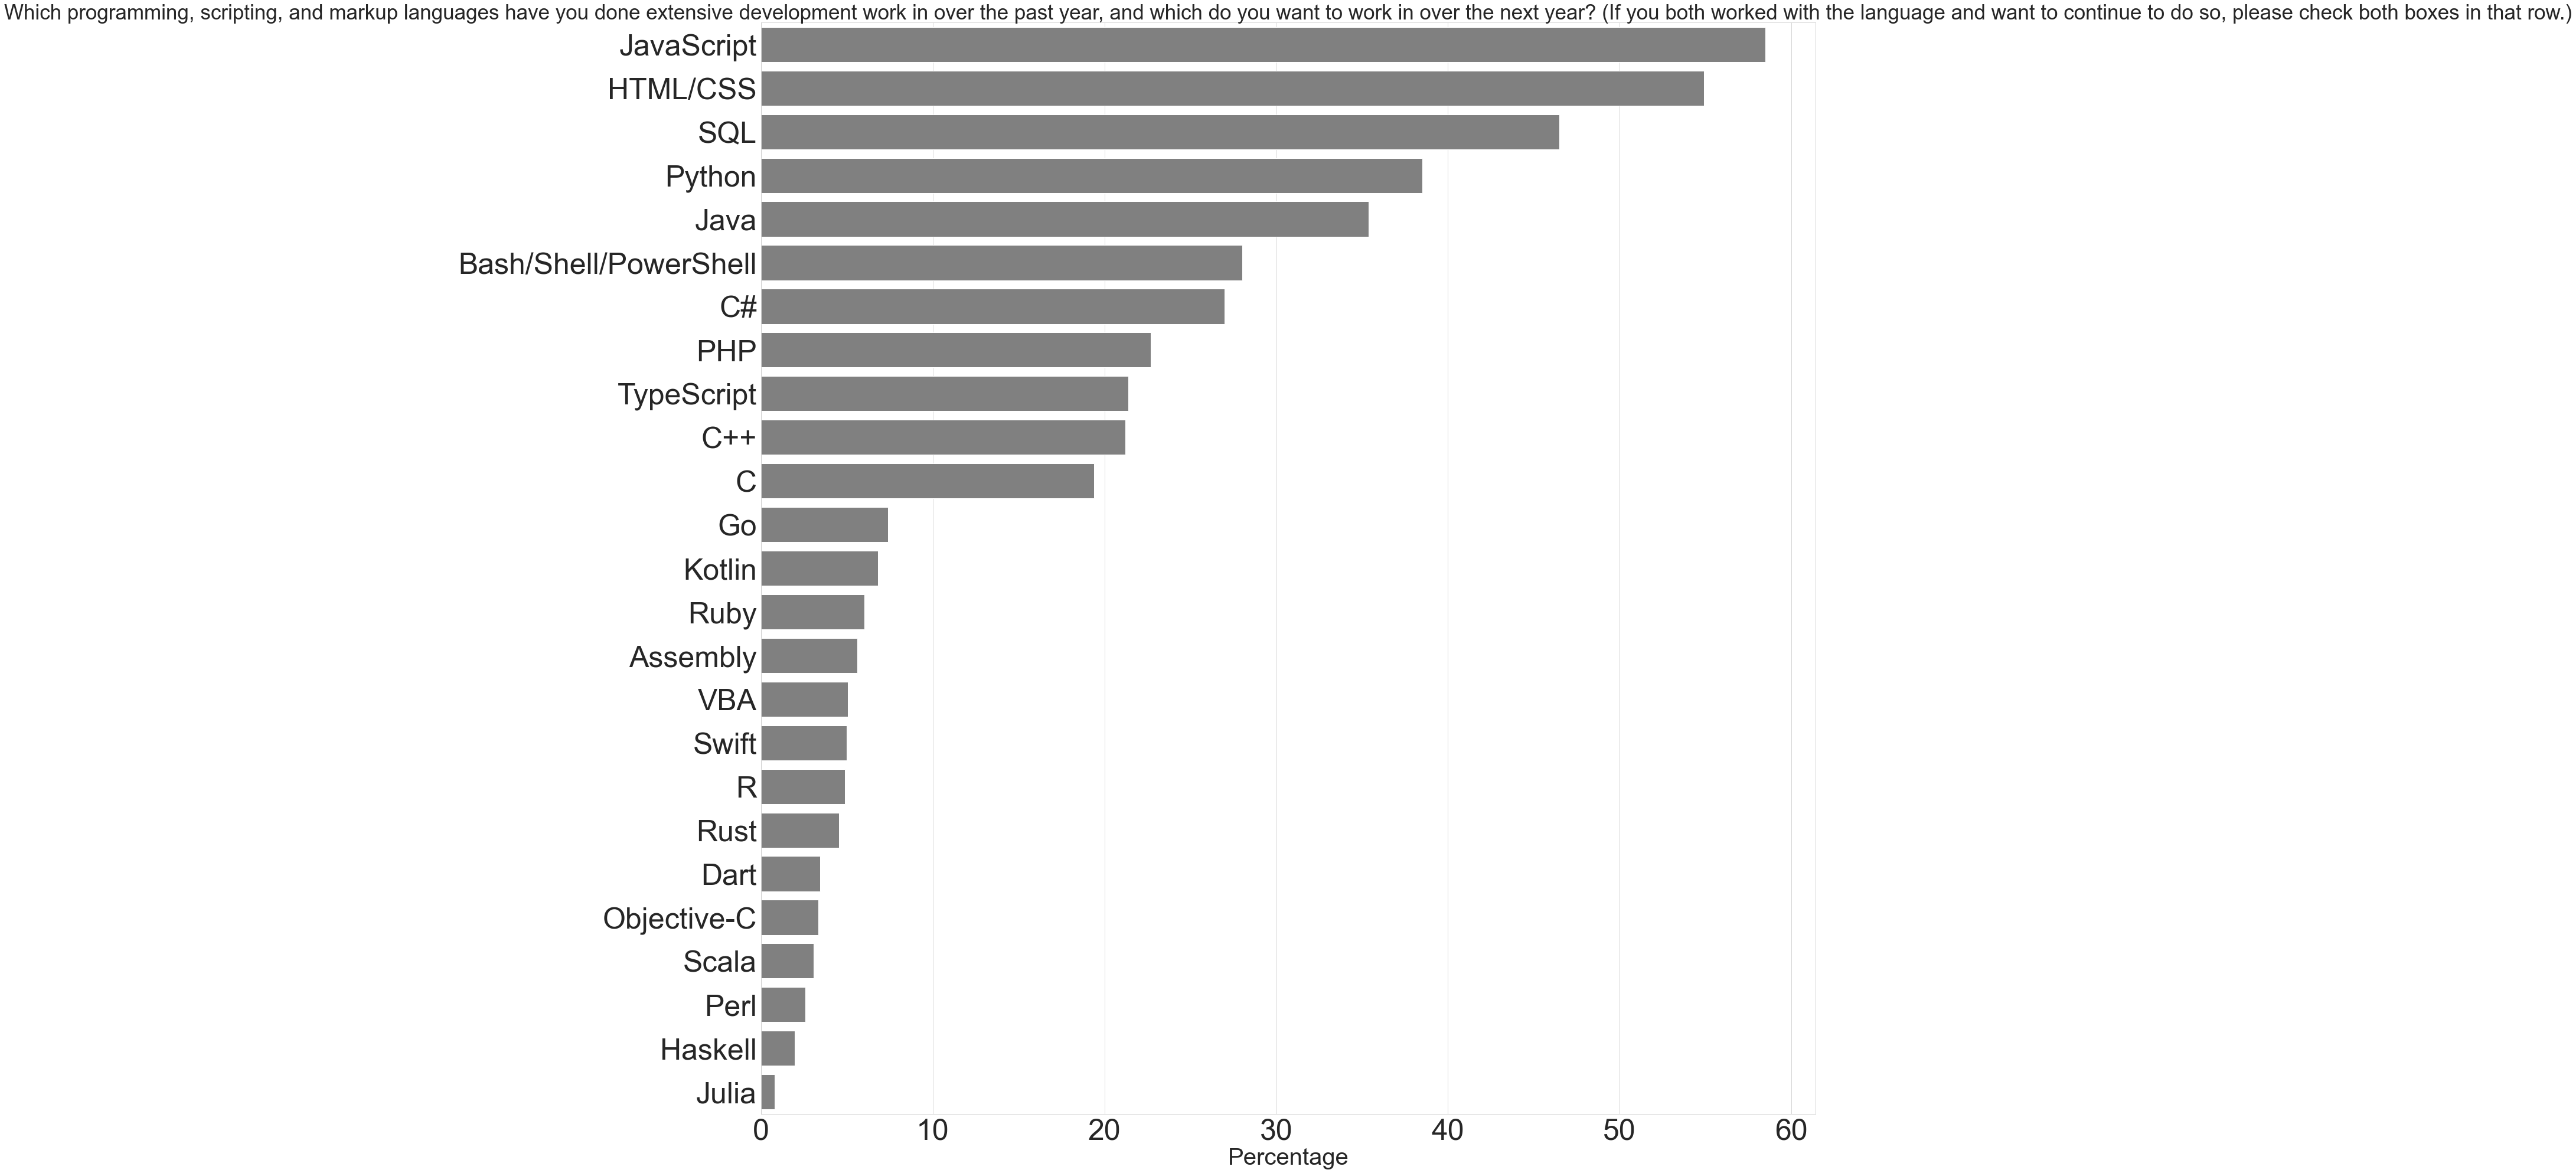

In [52]:
#define function to split multi columns
languages_worked = split_multicolumn(update_survey_data.LanguageWorkedWith)
#create dataframe
languages_worked_percent = languages_worked.mean().sort_values(ascending=False) * 100
languages_worked_percent= languages_worked_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=languages_worked_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['LanguageWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Language Desire

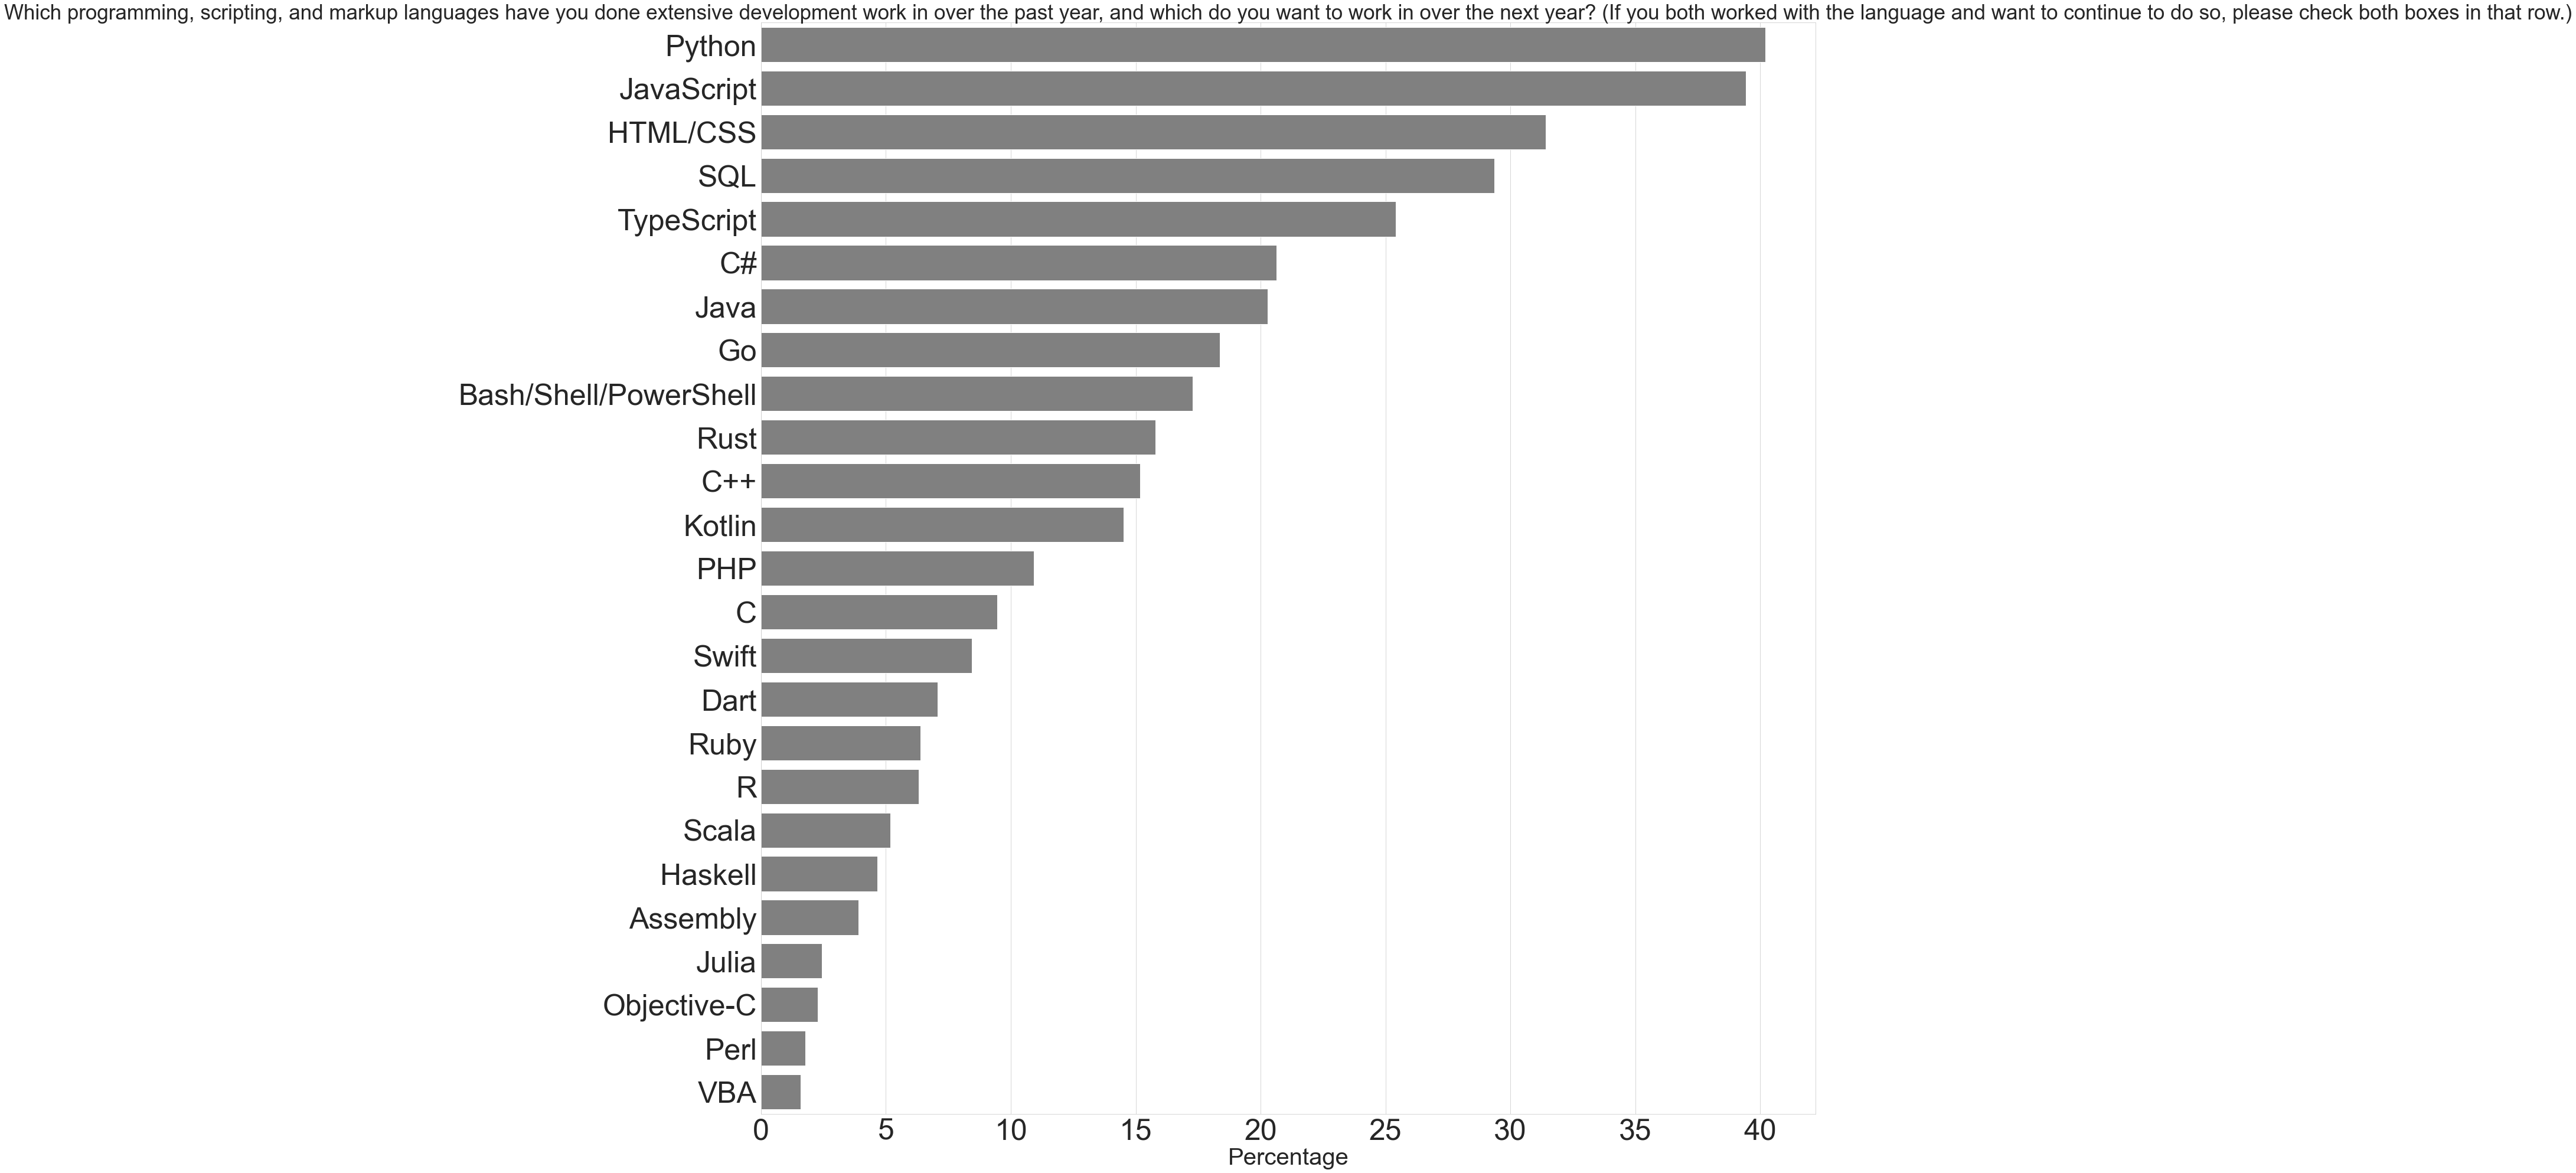

In [53]:
#define function to split multi columns
languages_learn = split_multicolumn(update_survey_data.LanguageDesireNextYear)
#create dataframe
languages_learn_percent = languages_learn.mean().sort_values(ascending=False) * 100
languages_learn_percent= languages_learn_percent.to_frame(name='percentage').reset_index()
languages_learn_percent
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=languages_learn_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['LanguageDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

* **Using the word cloud script by Loye, Vanessa modified the rest of the visualizer.**

### Frameworks, Libraries, Tools worked  with

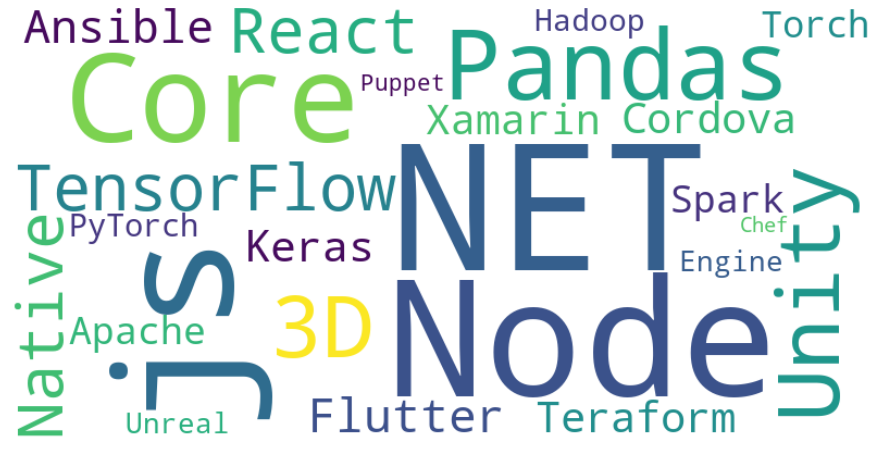

In [54]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in update_survey_data.MiscTechWorkedWith.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

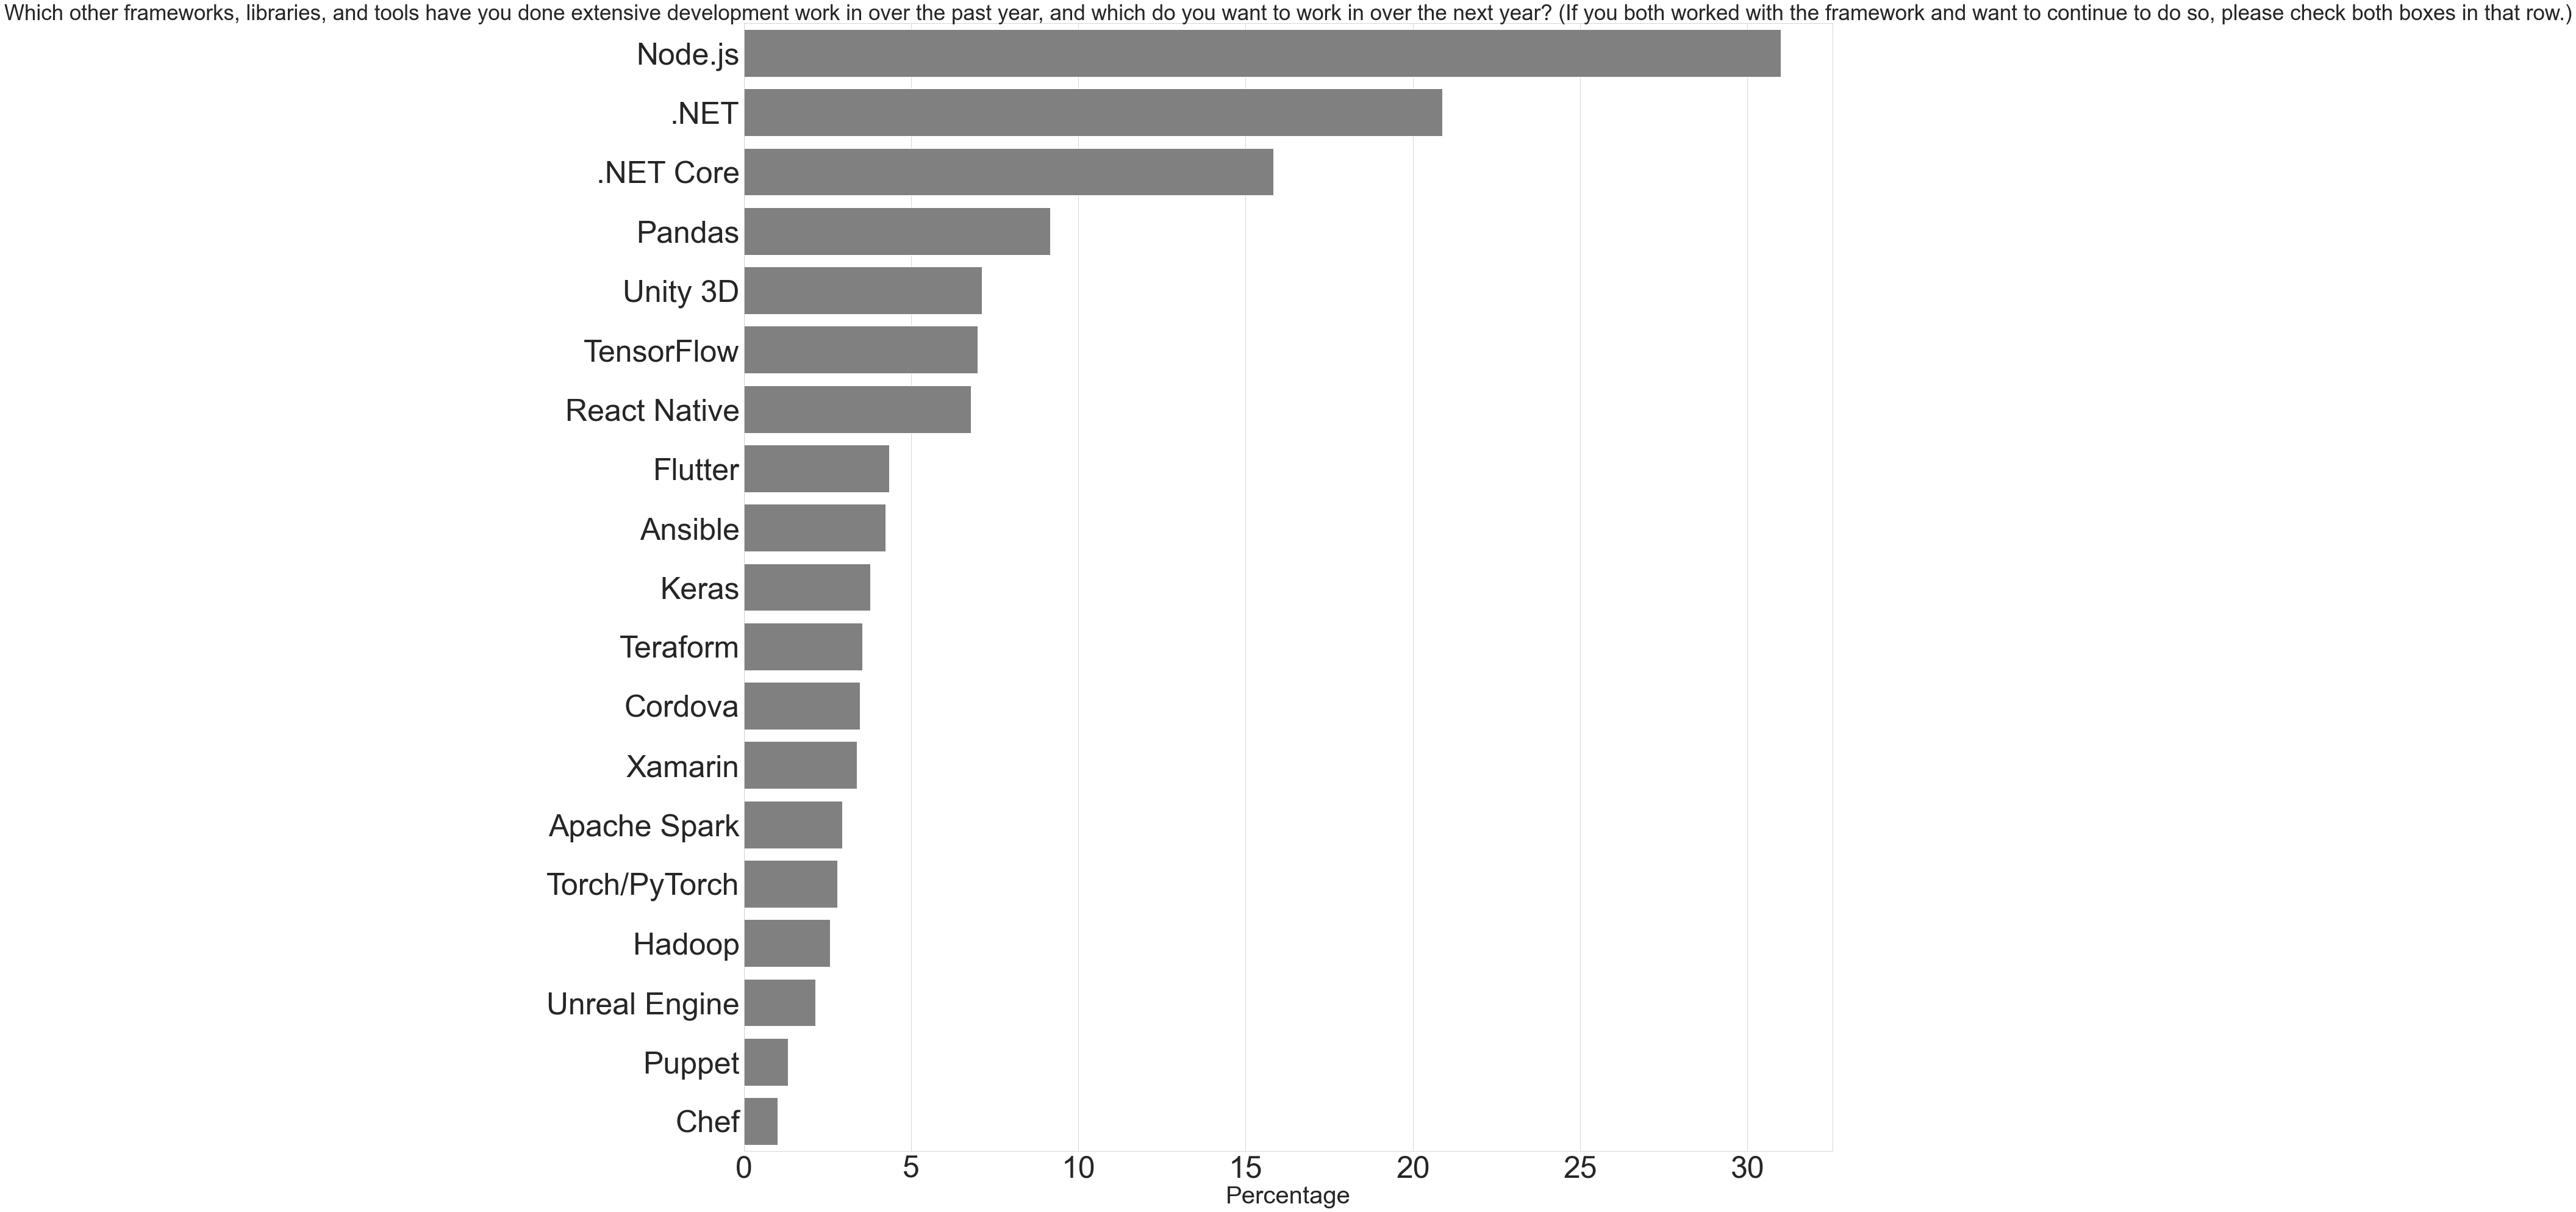

In [55]:
#define function to split multi columns
frame_worked = split_multicolumn(update_survey_data.MiscTechWorkedWith)
#create the dataframe
frame_worked_percent = frame_worked.mean().sort_values(ascending=False) * 100
frame_worked_percent= frame_worked_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=frame_worked_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['MiscTechWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Frameworks, Libraries, Tools desire

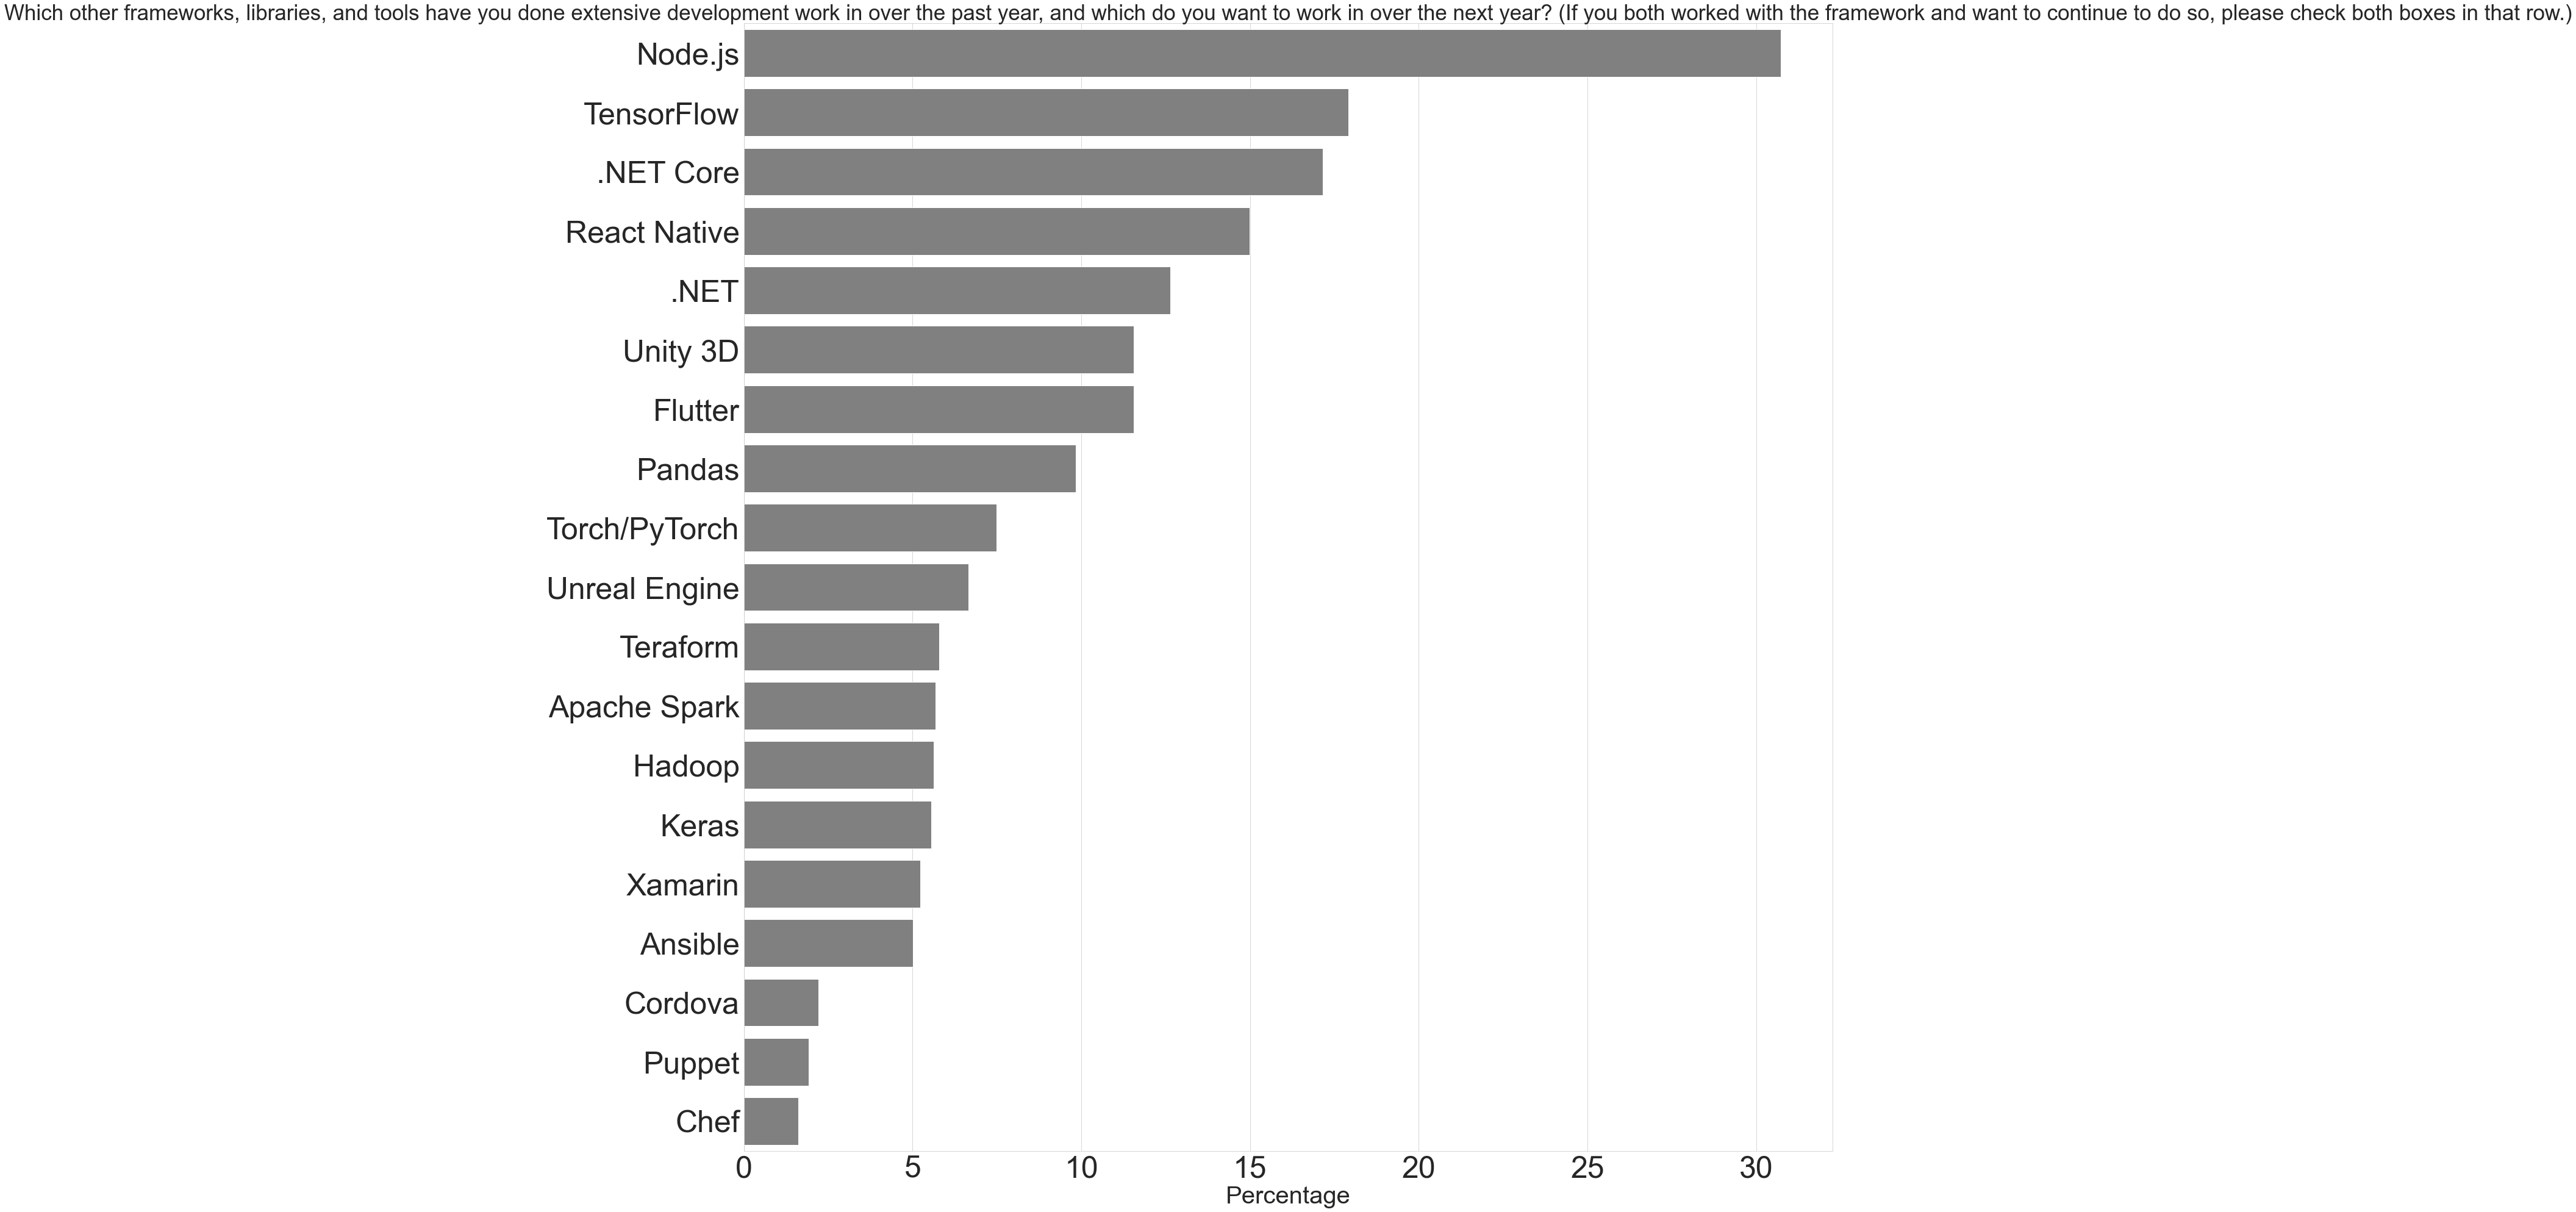

In [56]:
#define function to split multi columns
frame_desire = split_multicolumn(update_survey_data.MiscTechDesireNextYear)
#create dataframe
frame_desire_percent = frame_desire.mean().sort_values(ascending=False) * 100
frame_desire_percent= frame_desire_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=frame_desire_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['MiscTechDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### New Collab tools worked with

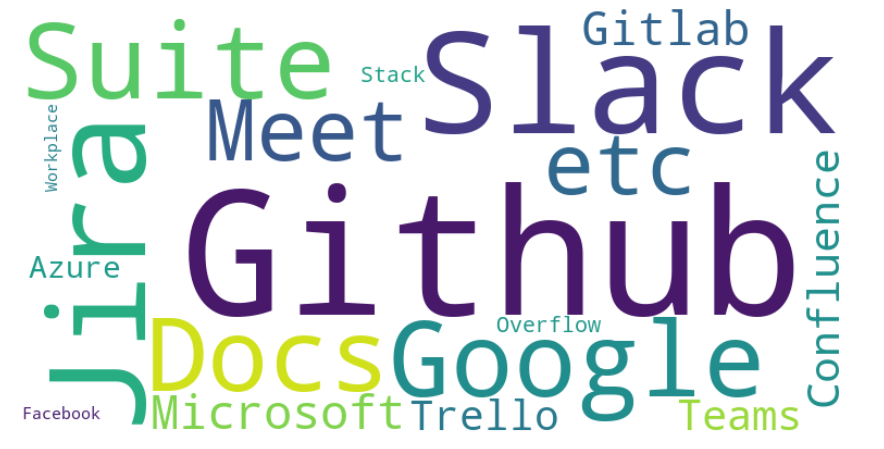

In [57]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in update_survey_data.NEWCollabToolsWorkedWith.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

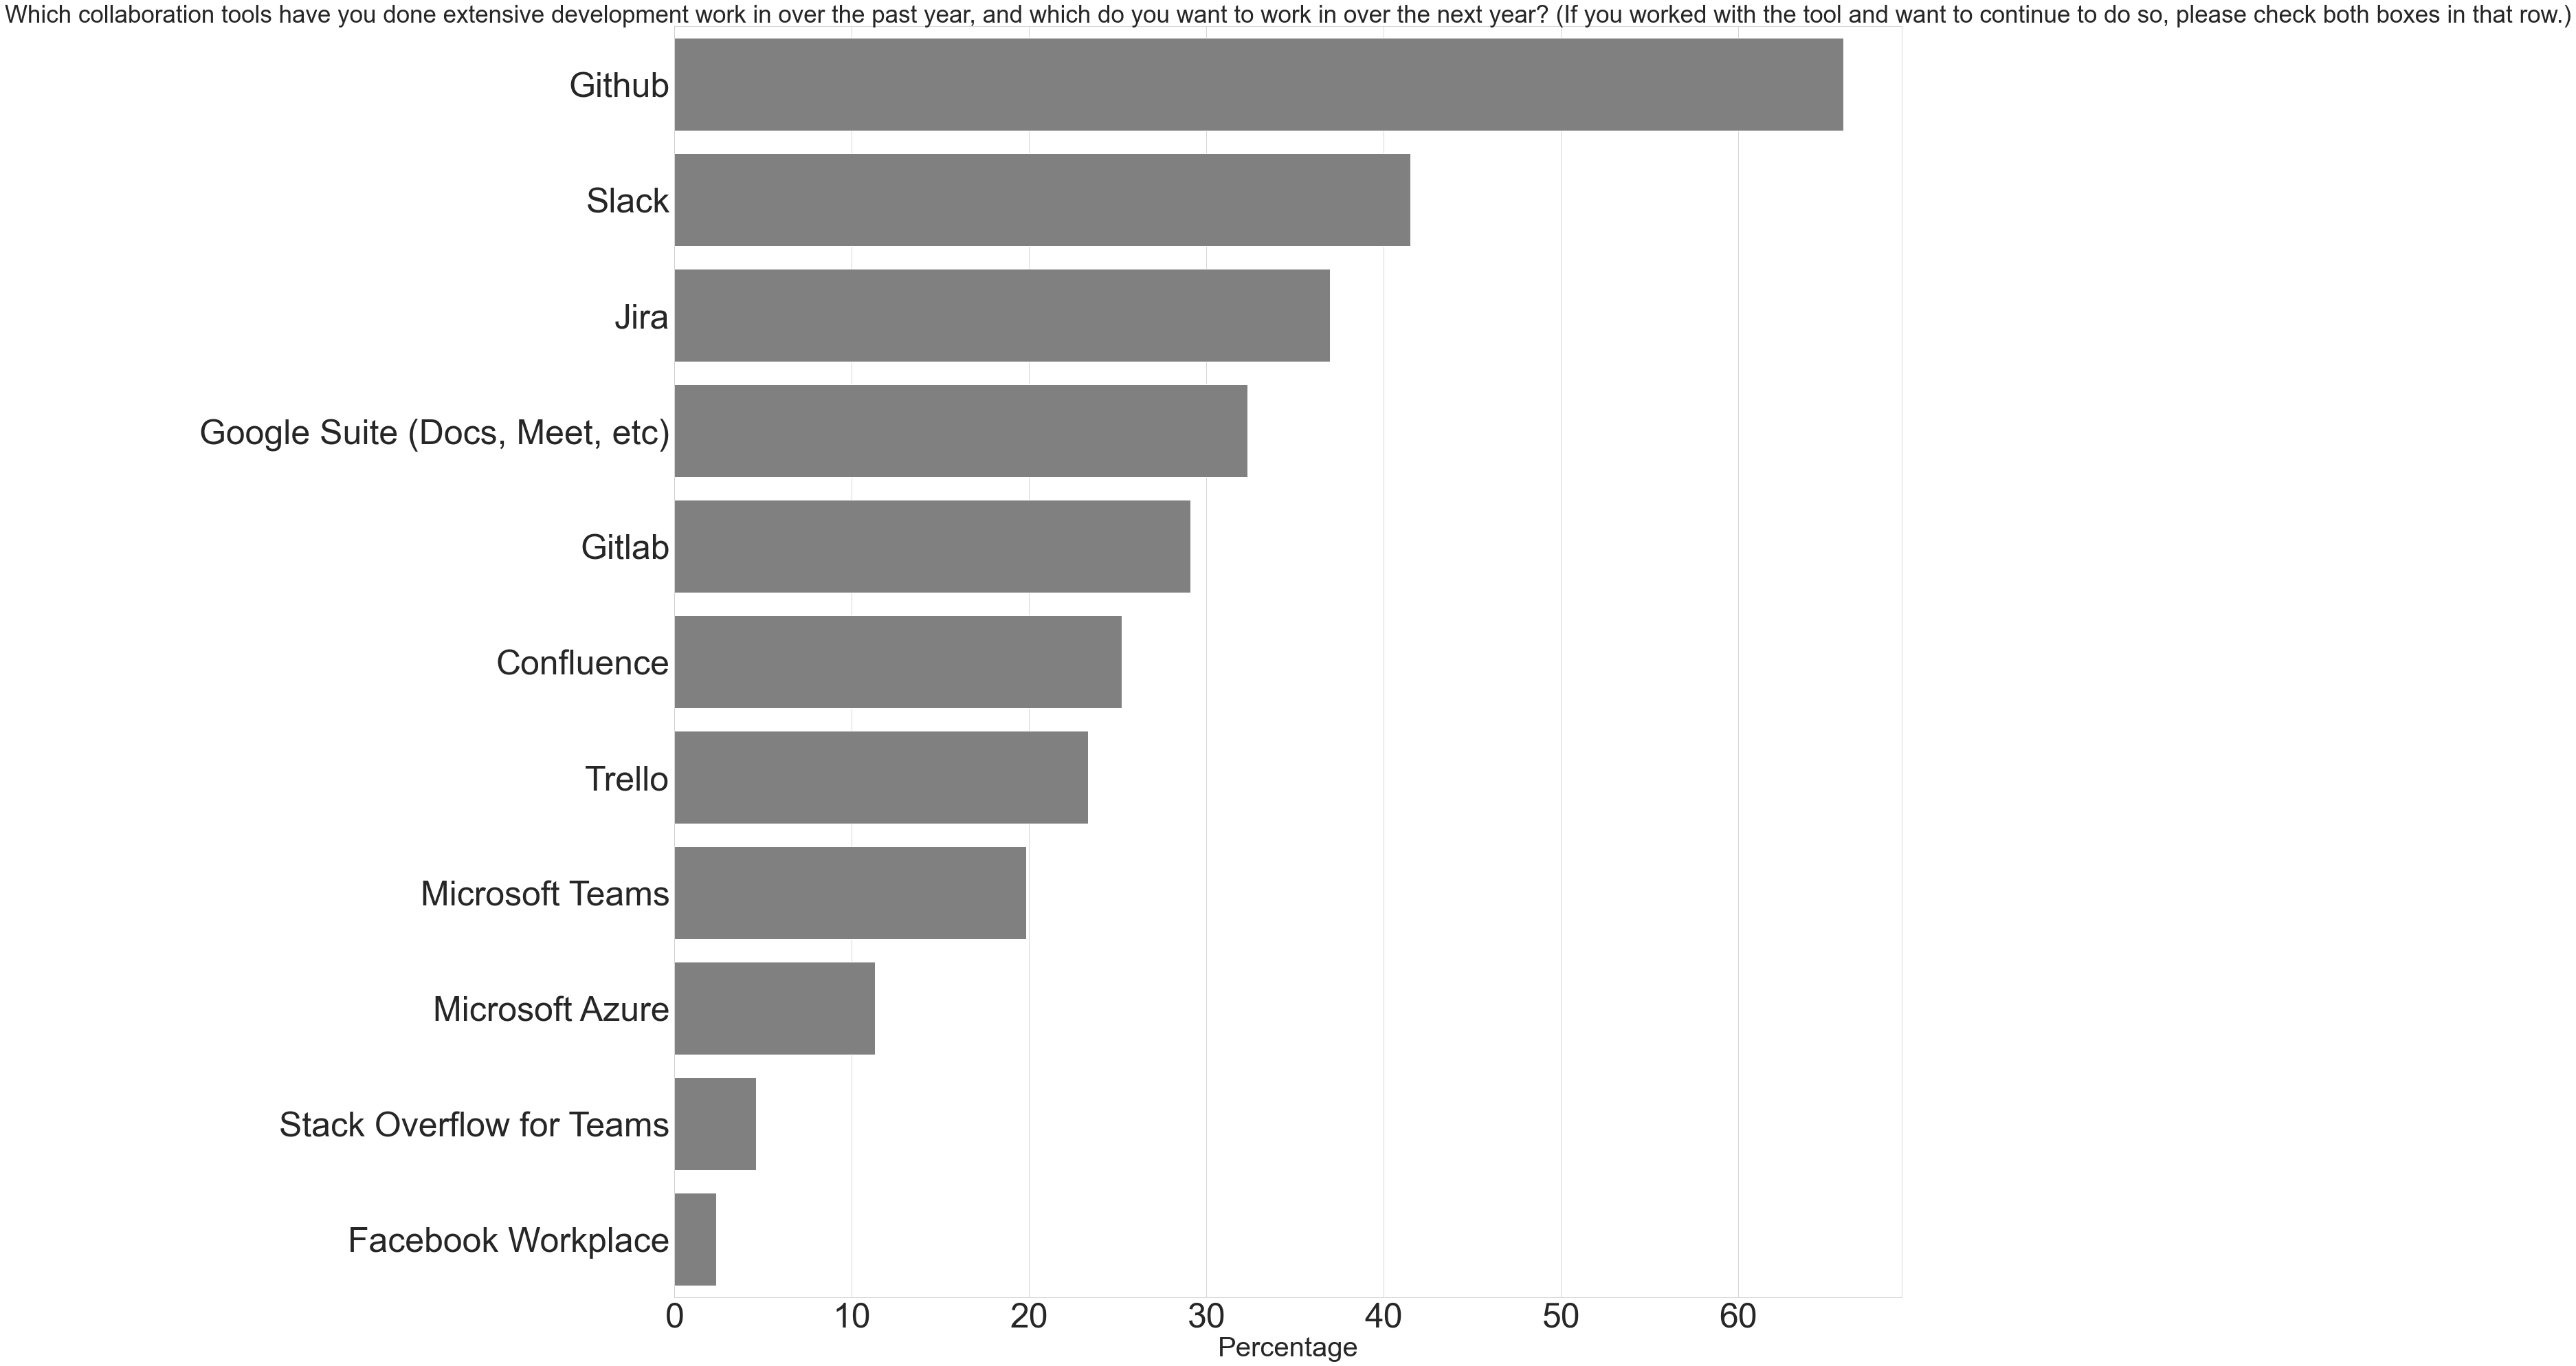

In [58]:
#define function to split multi columns
collab_worked = split_multicolumn(update_survey_data.NEWCollabToolsWorkedWith)
#create dataframe
collab_worked_percent = collab_worked.mean().sort_values(ascending=False) * 100
collab_worked_percent= collab_worked_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=collab_worked_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['NEWCollabToolsWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Collab Tools desire

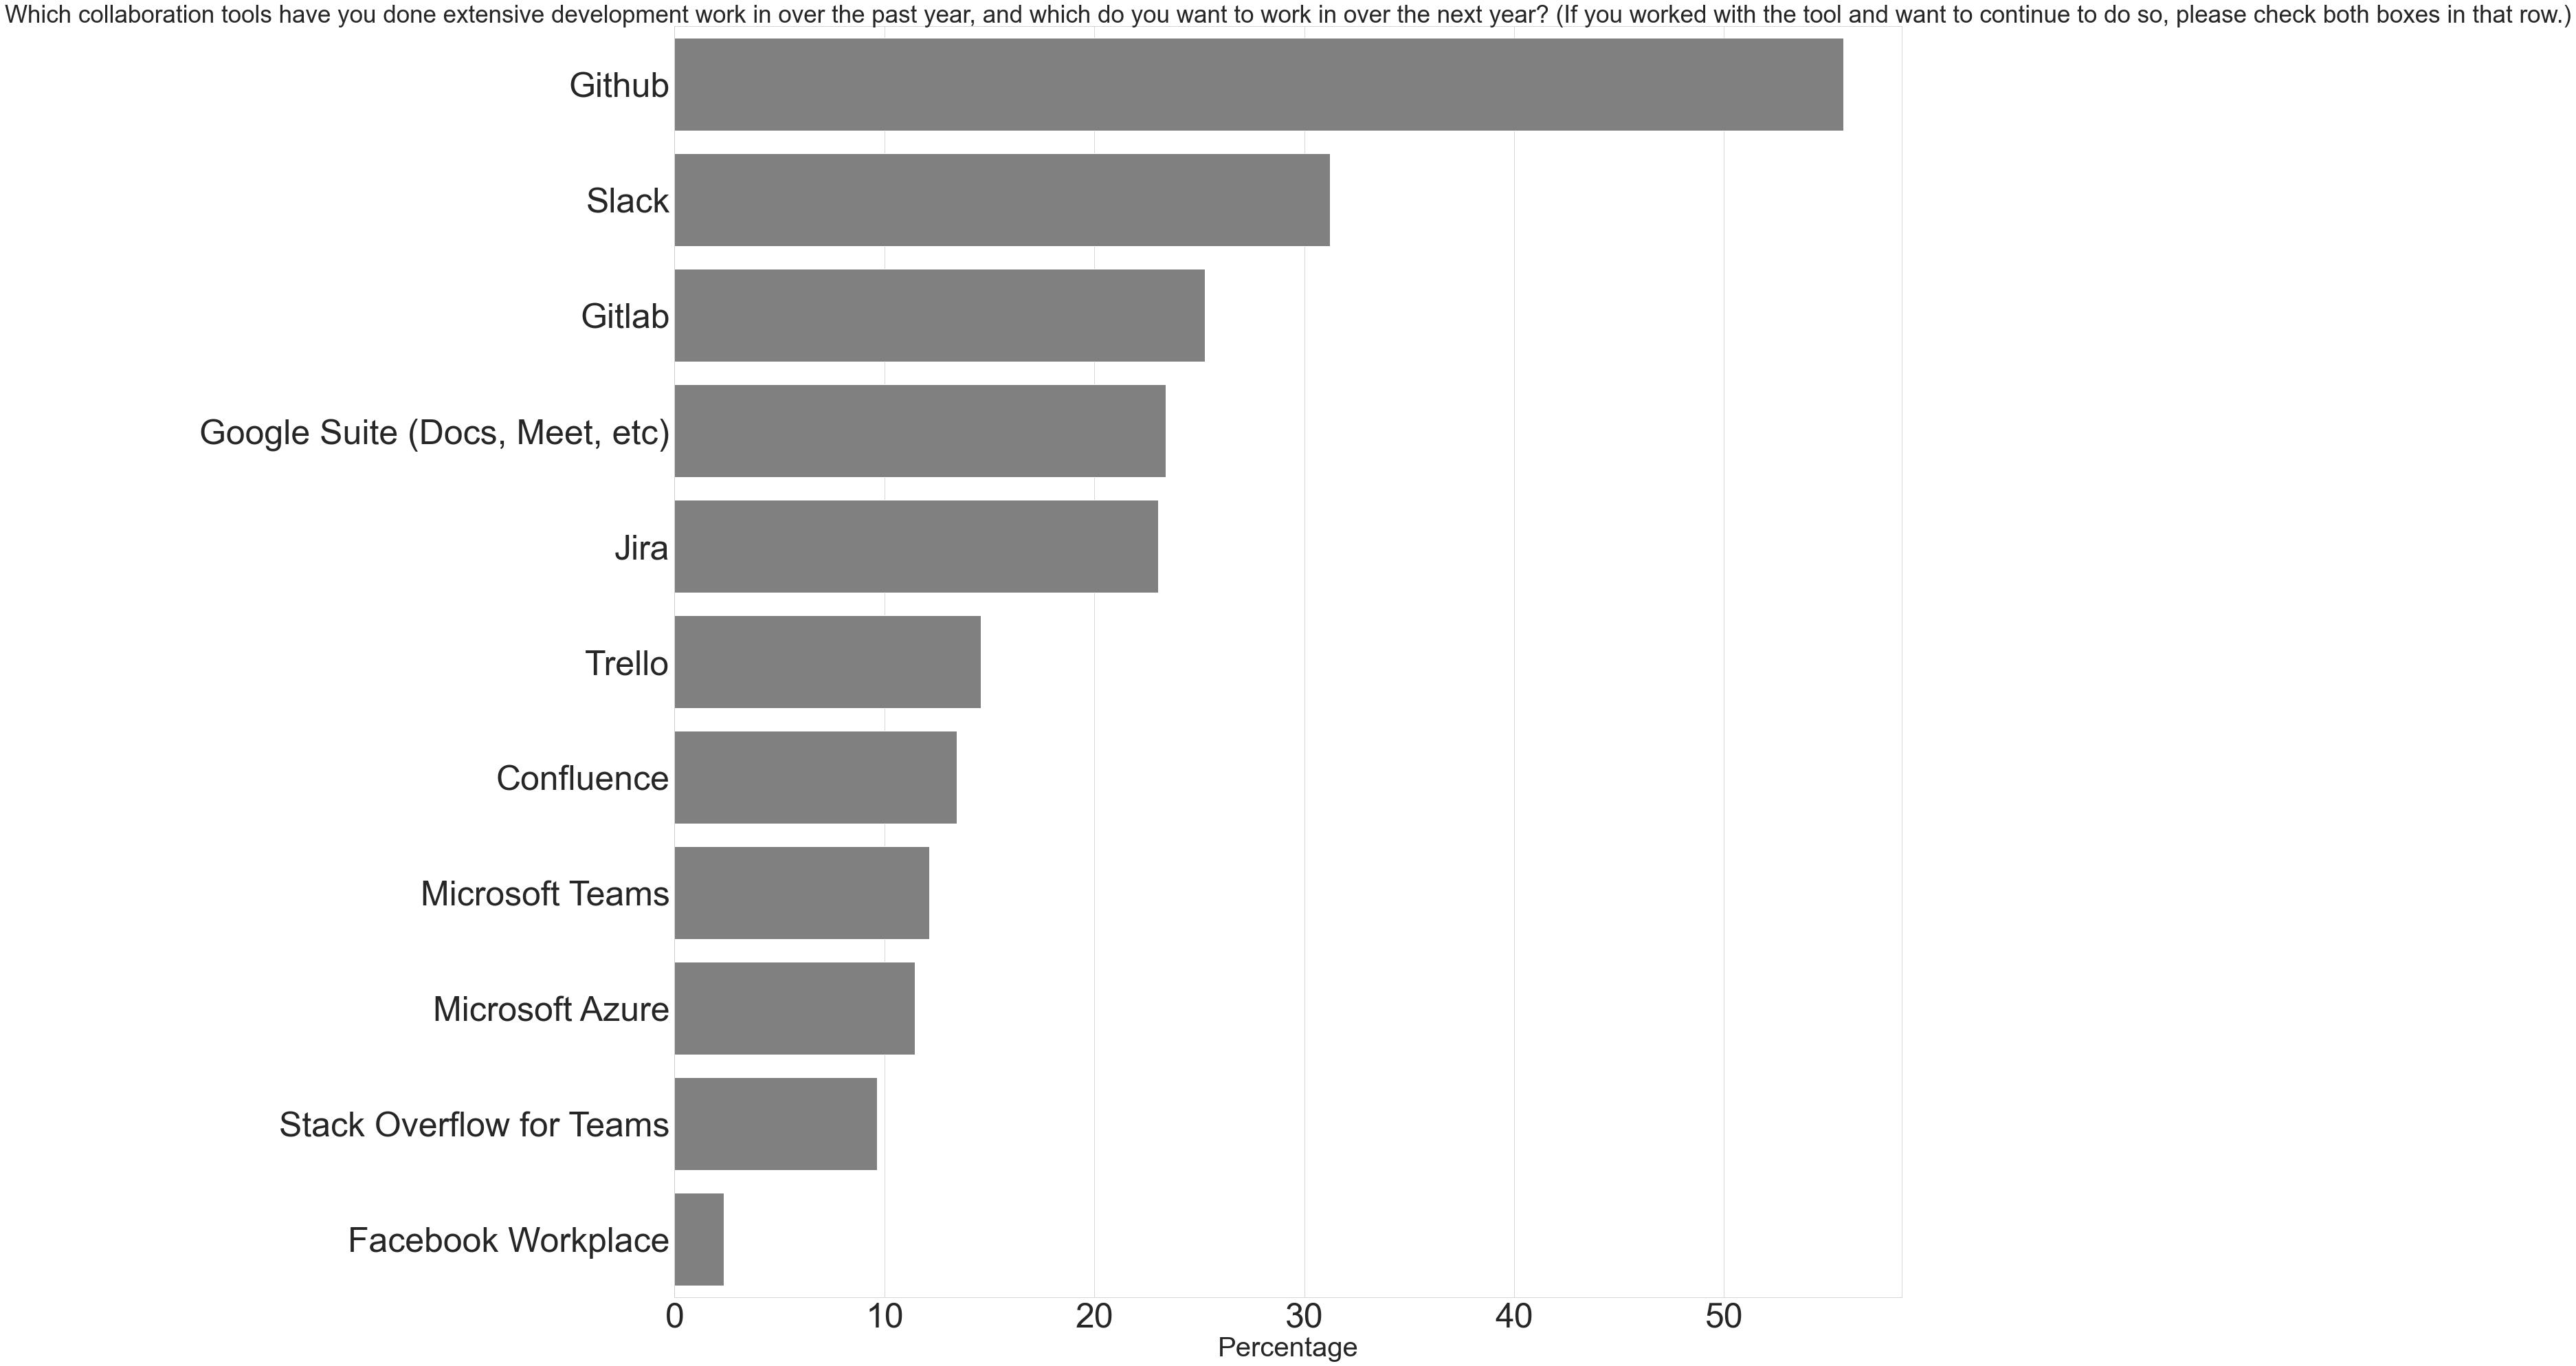

In [59]:
#define function to split multi columns
collab_desire = split_multicolumn(update_survey_data.NEWCollabToolsDesireNextYear)
#createdataframe
collab_desire_percent = collab_desire.mean().sort_values(ascending=False) * 100
collab_desire_percent= collab_desire_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=collab_desire_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['NEWCollabToolsDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Platfrom worked with

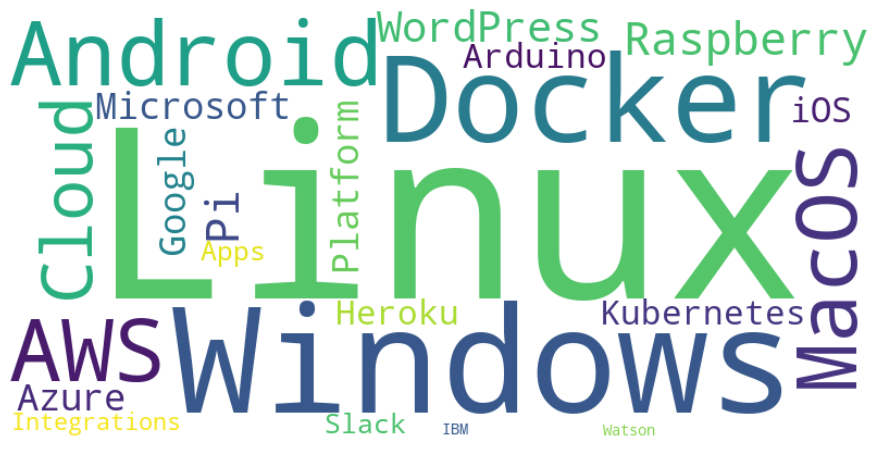

In [60]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in update_survey_data.PlatformWorkedWith.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

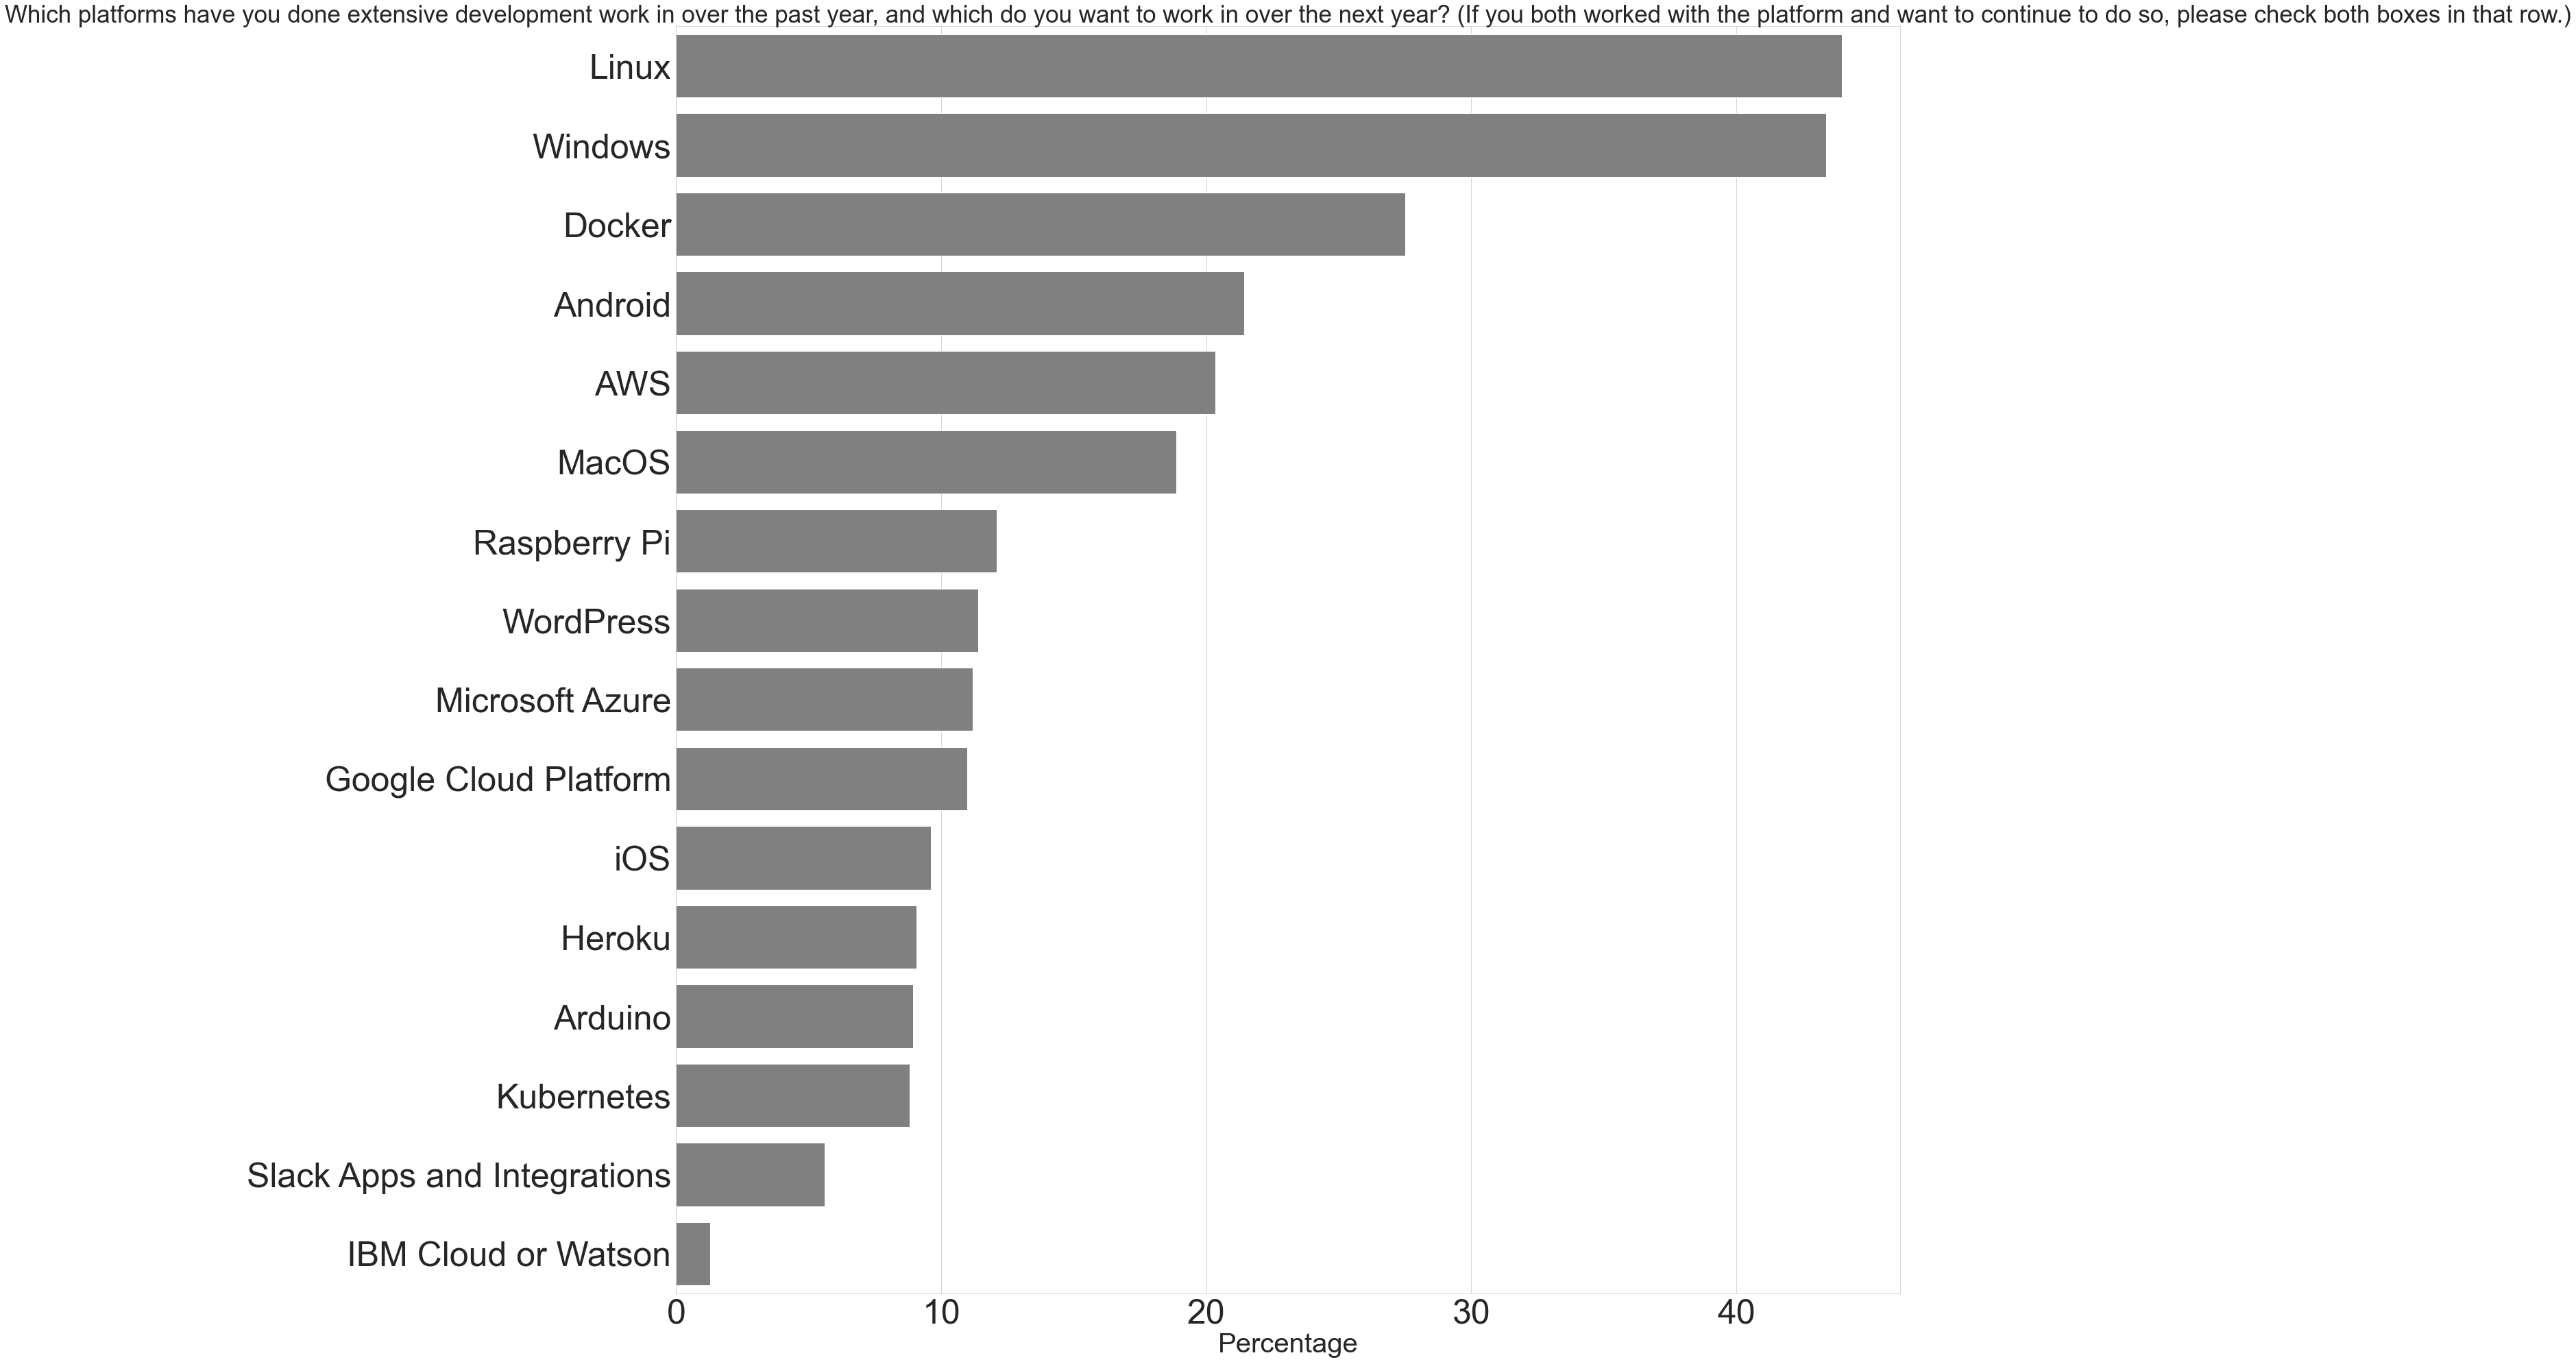

In [61]:
#define function to split multi columns
platform_worked = split_multicolumn(update_survey_data.PlatformWorkedWith)
#createdataframe
platform_worked_percent = platform_worked.mean().sort_values(ascending=False) * 100
platform_worked_percent= platform_worked_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=platform_worked_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['PlatformWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Platfrom desire

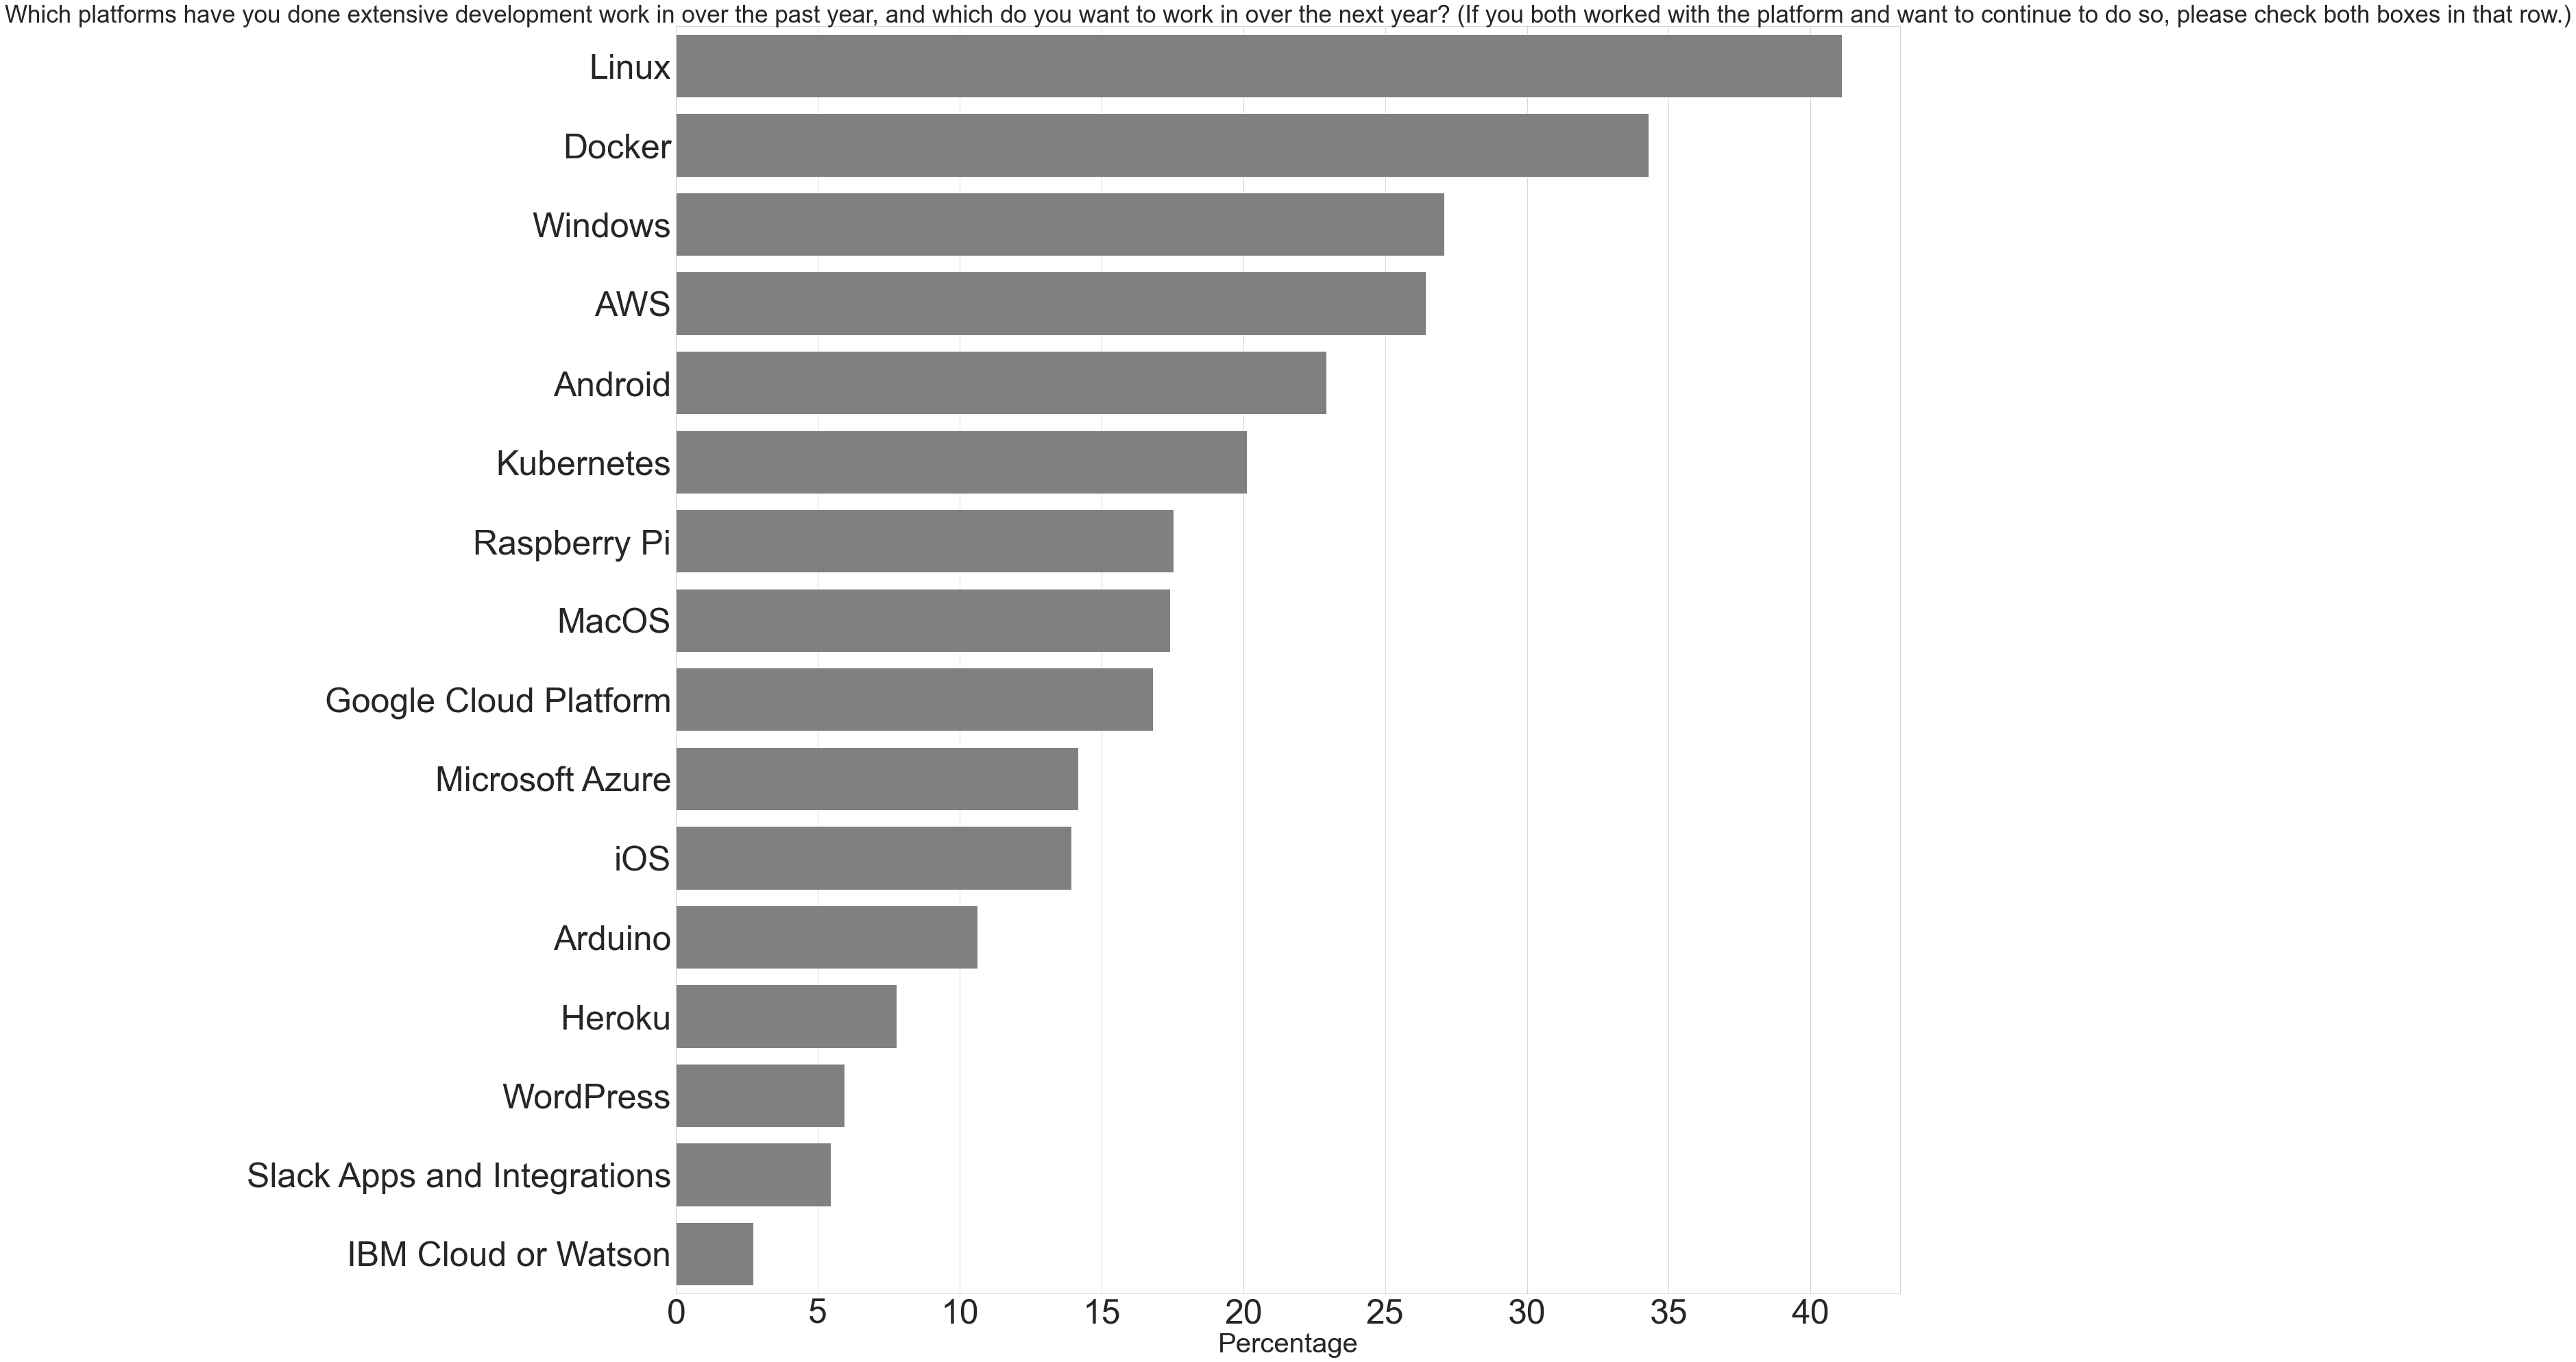

In [62]:
#define function to split multi columns
platform_desire = split_multicolumn(update_survey_data.PlatformDesireNextYear)
#create dataframe
platform_desire_percent = platform_desire.mean().sort_values(ascending=False) * 100
platform_desire_percent= platform_desire_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=platform_desire_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['PlatformDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Webframe Worked With

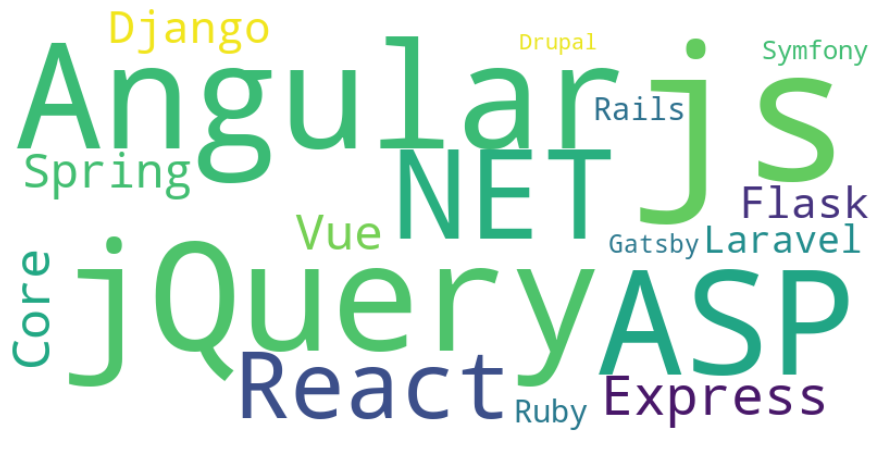

In [63]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in update_survey_data.WebframeWorkedWith.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

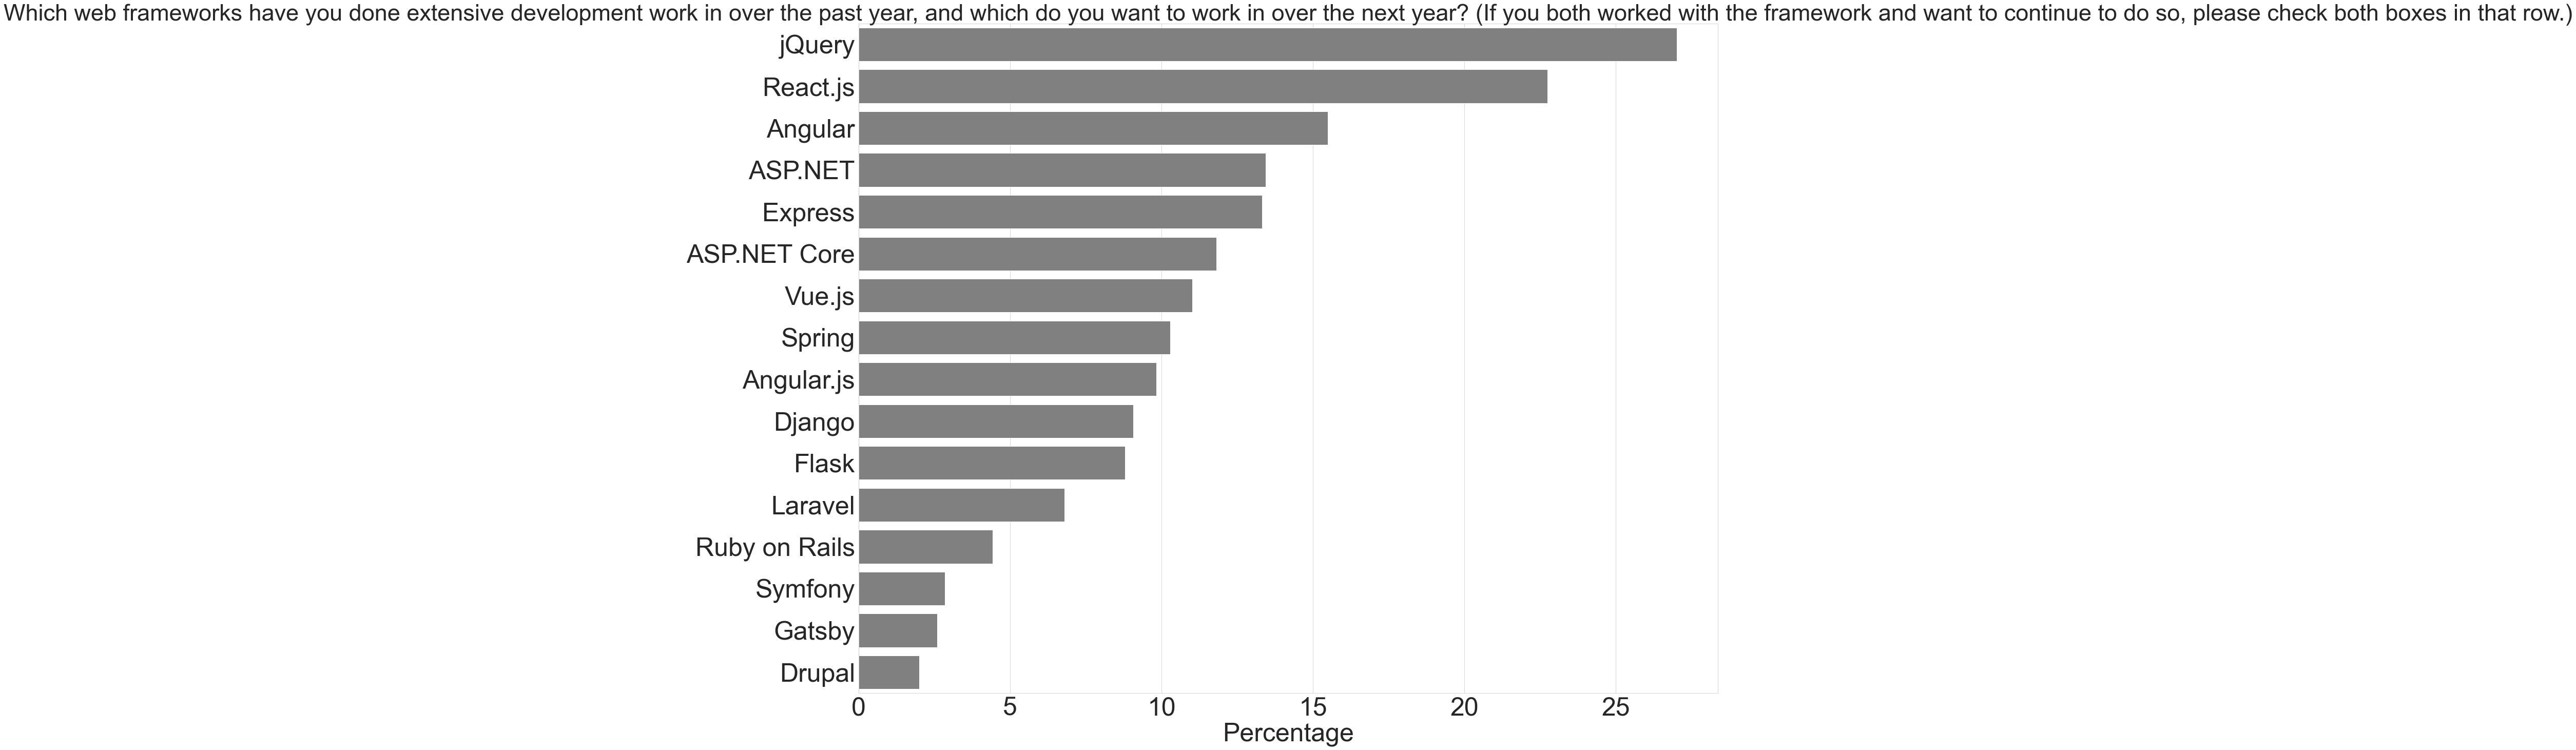

In [64]:
webframe = split_multicolumn(update_survey_data.WebframeWorkedWith)
#create dataframe
webframe_percent = webframe.mean().sort_values(ascending=False) * 100
webframe_percent= webframe_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x='percentage', y='index', data=webframe_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['WebframeWorkedWith'], fontsize=45)
ax.set_xlabel ("Percentage", fontsize=50)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Webframe Desire

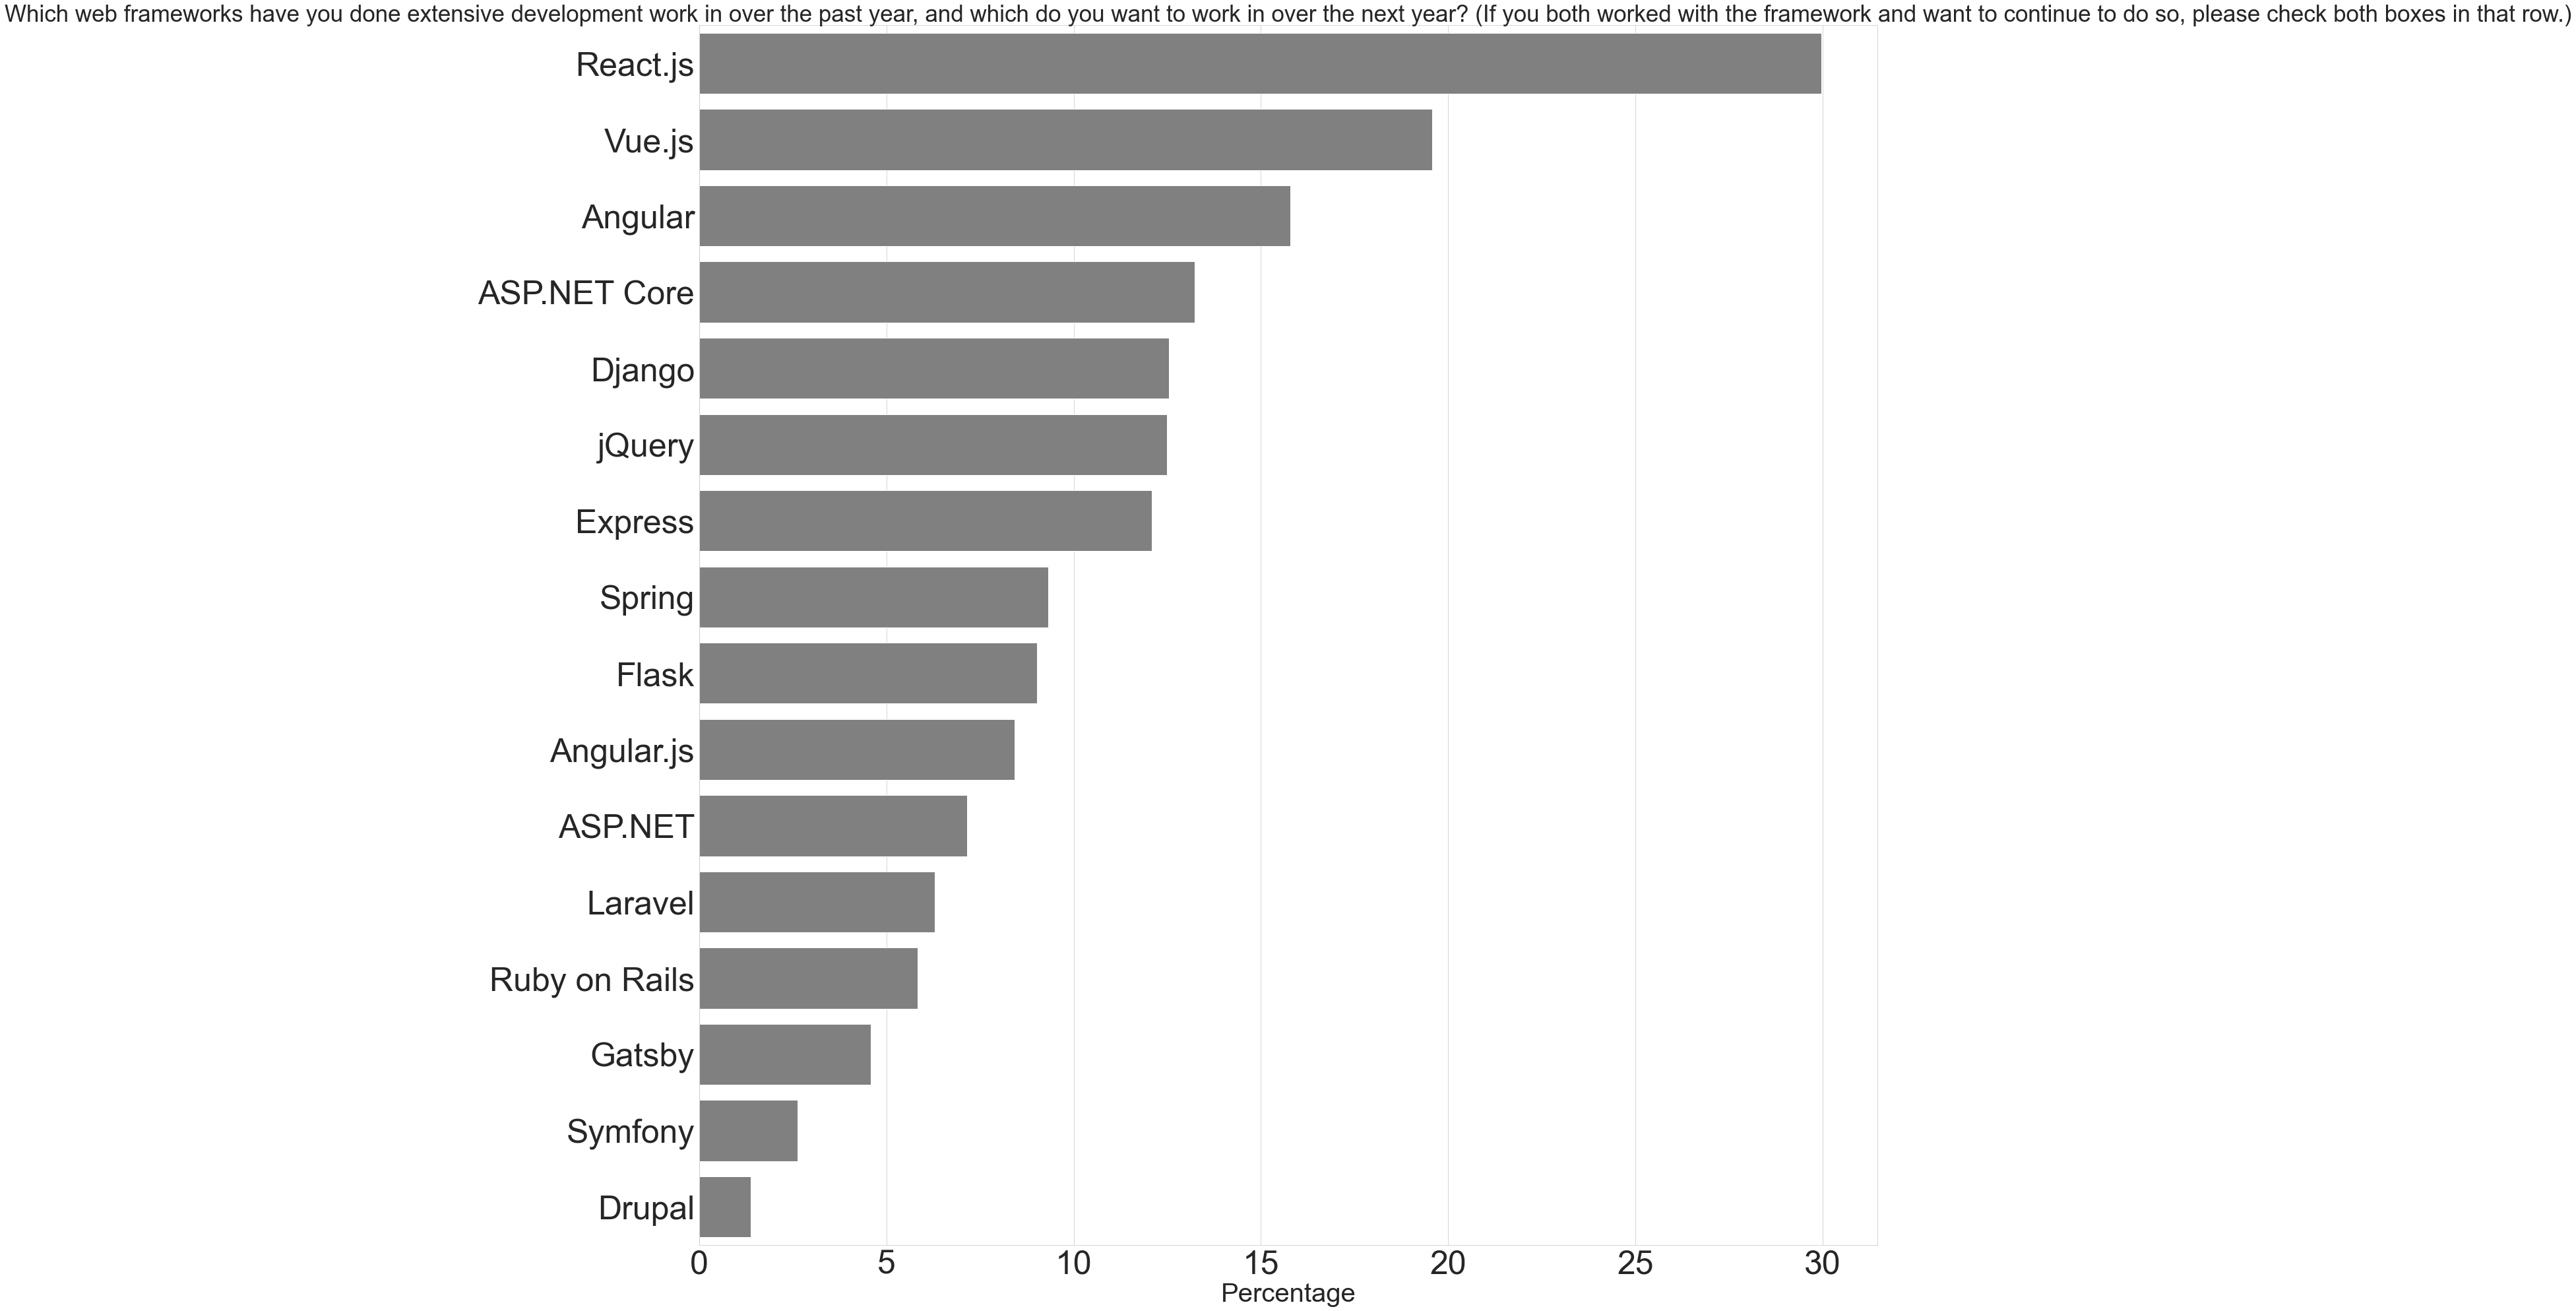

In [65]:
#define function to split multi columns
webframe_desire = split_multicolumn(update_survey_data.WebframeDesireNextYear)
#create dataframe
webframe_desire_percent = webframe_desire.mean().sort_values(ascending=False) * 100
webframe_desire_percent= webframe_desire_percent.to_frame(name='percentage').reset_index()
#barchart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=webframe_desire_percent, ci=None, color='grey',orient='h')
ax.set_title(schema['WebframeDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

## Further Analysis
* Correlation matrix by Loye
* Correlation plots by Vanessa

### Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

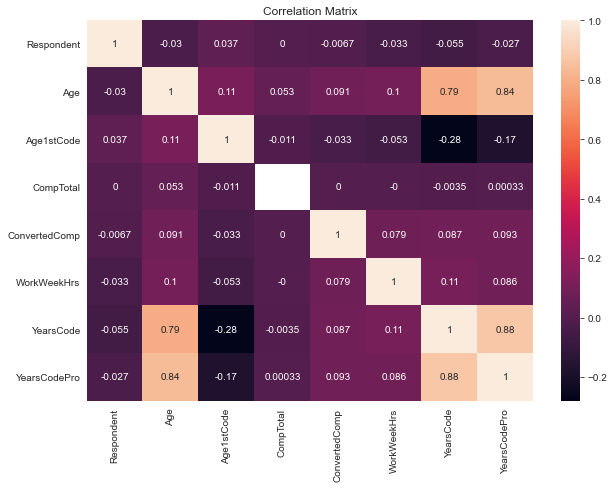

In [66]:
#correlation matrix
plt.figure(figsize = (10, 7))
sns.heatmap(update_survey_data.corr(), annot = True)
plt.title('Correlation Matrix')

### Correlation plots

### Age, Age1st Code, Years Code, Years Professional Code

<AxesSubplot:xlabel='YearsCode', ylabel='Age'>

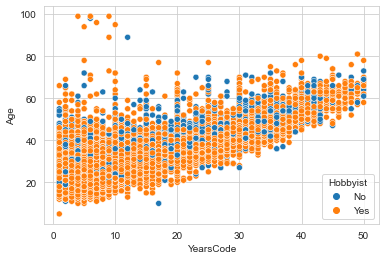

In [67]:
#age and years code
sns.scatterplot(data=update_survey_data, x="YearsCode", y="Age", hue='Hobbyist')

<AxesSubplot:xlabel='YearsCodePro', ylabel='Age'>

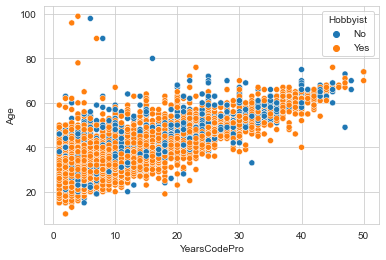

In [68]:
#age and years code pro
sns.scatterplot(data=update_survey_data, x="YearsCodePro", y="Age", hue='Hobbyist')

<AxesSubplot:xlabel='Age1stCode', ylabel='Age'>

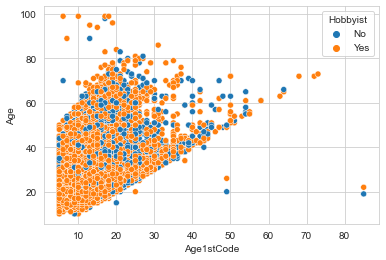

In [69]:
#age and age first code
sns.scatterplot(data=update_survey_data, x="Age1stCode", y="Age", hue='Hobbyist')

<AxesSubplot:xlabel='Age1stCode', ylabel='YearsCode'>

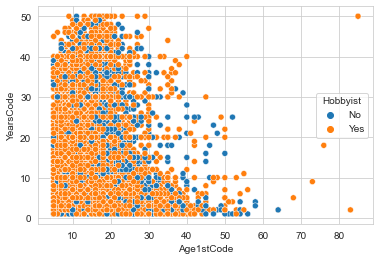

In [70]:
#age1stcode and years code
sns.scatterplot(data=update_survey_data, x="Age1stCode", y="YearsCode", hue='Hobbyist')

<AxesSubplot:xlabel='Age1stCode', ylabel='YearsCodePro'>

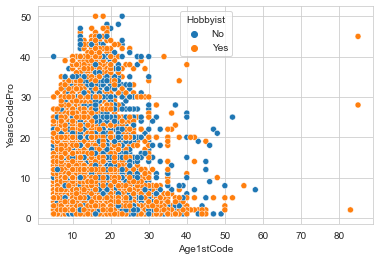

In [71]:
#age1stcode and years code pro
sns.scatterplot(data=update_survey_data, x="Age1stCode", y="YearsCodePro", hue='Hobbyist')

<AxesSubplot:xlabel='YearsCode', ylabel='YearsCodePro'>

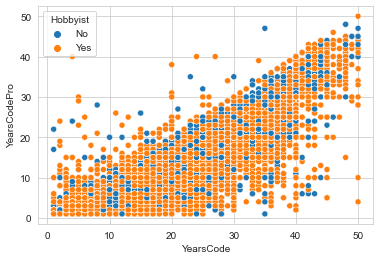

In [72]:
#years code and years code pro
sns.scatterplot(data=update_survey_data, x="YearsCode", y="YearsCodePro", hue='Hobbyist')

# Conclusion

With the analysis combined, we can now look at it critically. Do the insights show that:
   * The survey data is fair in terms of non-English countries not represented, does it favor a particular country or do they make up the StackOverflow community? Does it favor a particular gender or is that gender more dominant? Does it favor a particular ethnic group?
   * Does coding give developers a greater chance of being employed?
   * Do you need a certain education level or major to become a developer?
   * Is Age a factor in becoming a developer?
   
   etc...